<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/data_science_and_decision_making/project_agrotech/assignment_two/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
	# kfold = model_selection.KFold(n_splits=10)
	# cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# 1.วัตถุประสงค์
# เวลาและจำนวนผลผลิต

# 2.1
# - Edit column names: make sure that the column names can be comfortably used for handling data and operations such as merging data frames. <<==done
# - Add flight dates from 2020 planting data.<==done
# - Add missing planting dates from 2020 planting data and other data that may be useful, e.g., variety, comments. <==done
# - Figure out how to use date-time features. Most regressors need numerical variables, so you’ll need to convert these to some other format.  <==done
# For example, you can create a variable called days_to_check that converts flight_date into number of days from plant_date.
# - Be very careful with data leakage: your task is to predict the size (see point 2 below) of <== in progress
# the lettuce in the future, assuming today is Flight time: you cannot use information from the weather from the future!
# - Convert weather data into features. Hint: since you can’t use data from the future, can you <== done
# use an estimate using data from previous years?
# - Merge features you’ve created from the weather data with the plant dataframe so you can use them. <==done

# 2.2. ใช้วิธีการที่เหมาะสม ฝึกฝนและวัดประสิทธิภาพของการถดถอยเชิงเส้นแบบหลายป้ายกำกับ (คุณสามารถเล่นกับลำดับของพหุนามได้) 
# เพื่อทำนายhead weight, polar diameter, and radial diameter at the 'Check Date'  โดยใช้ข้อมูลเกี่ยวกับโรงงาน ในเวลาเที่ยวบินและเกี่ยวกับสภาพอากาศ
# 2.3. (Optional) Check performance also using other methods.
# 2.4. Make sure that you reflect on the interpretability of your methods and results (e.g., through feature
# importances).
# 3.
# -Batch number = batch idที่โรงงานเป็นเจ้าของ
# -Plant date: วันที่ที่มีการปลูกแบบกลุ่ม(batch)ที่พืชเป็นส่วนหนึ่ง – คุณสามารถละเว้นแถวที่ไม่มีวันที่ของโรงงานได้
# -Flight date: วันที่ทำการตรวจวัดจากโดรน – คุณสามารถกรอก
# ค่าที่ขาดหายไปสำหรับคอลัมน์นี้โดยใช้ข้อมูลจากแท็บ "2020 Flight dates" tab.
# -Check date: วันที่ทำการวัดด้วยตนเอง (น้ำหนักและขนาด)
# Leaf Area (cm2 ): leaf area วัดจากด้านบนโดยโดรนในวันที่บิน (โดยทั่วไปจะอยู่ที่ 30-40% ของทางเข้าสู่วัฏจักรการเจริญเติบโต)
# – Leaves: the number of leaves in the plant.
# – Fresh Weight (g): ชีวมวลเปียกของพืช. – Always available
# – Head Weight (g): ชีวมวลเปียกของพืช ในรูปแบบที่ขายได้ (เช่น อย่างที่คุณพบว่ามันบรรจุในกล่องสำหรับซุปเปอร์มาร์เก็ต) – อย่าใช้คอลัมน์นี้เป็นfeatureในการทำนายของคุณ <not use in features>
# – Polar Diameter (mm): เส้นผ่านศูนย์กลางของหัวผักกาดหอมจากฐานถึงยอด
# – Radial Diameter (mm): เส้นผ่านศูนย์กลางของหัวผักกาดจากด้านหนึ่งไปอีกด้านหนึ่ง
# – Diameter ratio: is คำนวณจากPolar Diameter และ Radial Diameter อย่าใช้คอลัมน์นี้สำหรับการคาดคะเนของคุณ <not use in prediction>
# – Density (kg/L): คำนวณจากการวัดจากข้างบน อย่าใช้คอลัมน์นี้สำหรับการคาดคะเนของคุณ <not use in prediction>
# – หมายเหตุ: หัวผักกาดหอมก่อตัวเพียง 50% ตลอดวงจรการเจริญเติบโต
# ดังนั้น สำหรับการวัดในระยะแรกๆ จึงไม่มีข้อมูลเกี่ยวกับPolar Diameter and Radial Diameter
# แต่มีข้อมูลเกี่ยวกับfresh weight and the number of leaves สำหรับการวัดในภายหลัง เรามีfresh weight, head weight and polar and radial diameters.
# -Class: หมวดหมู่ที่พืชมีตั้งแต่ช่วงตั้งแต่ 1-5 โดยที่ 1 คือต้นไม้ที่เล็กกว่าและ 5 คือต้นไม้ที่ใหญ่ที่สุด
# -Remove: drop the rows that are NOT blank in this column.
# -นอกจากนี้ยังมีแท็บสองแท็บที่มีรายละเอียดว่าเมื่อใดที่พืชผลแต่ละชุดบิน ("flight dates") เช่นเดียวกับ
# บันทึกการปลูกซึ่งมีรายละเอียดทั้งหมดเกี่ยวกับพืชผลแต่ละกลุ่ม ("planting"—คุณสามารถใช้หรือละเว้นเอกสารนี้สำหรับแบบจำลองของคุณ)
# -แท็บ "weather" มีข้อมูลสภาพอากาศรายวันจากสถานีตรวจอากาศในท้องถิ่น

# Notes on measurements and dates
# สำหรับแต่ละชุดจะมีการวัดหนึ่งรายการจากโดรน ("Leaf area" วัดจาก "Flight date") และการวัดด้วยตนเองสูงสุด 3 ครั้ง (ขึ้นอยู่กับว่าสร้างหัวผักกาดหรือไม่ [fresh weight, head weight, polar diameter, radial diameter]) หรือ [fresh weight, number of leaves]))

# การวัดด้วยตนเองทั้งสามโดยทั่วไปจะสอดคล้องกับประมาณ 70%, 85% และ 98% ของวงจรการเติบโต
 
# ตัวอย่างเช่น batch 517 ถูกปลูกในวันที่ 5 มิถุนายน วัดโดยโดรนในวันที่ 8 กรกฎาคม และวัดด้วยตนเองในวันที่ 8, 15 และ 20 กรกฎาคม
# โปรดทราบว่าการวัดแบบแมนนวลจำเป็นต้องตัดต้นไม้ ดังนั้นจึงทำในplantsที่แตกต่างกันในแต่ละครั้ง



# Import Library

In [ ]:
# manage data
import pandas as pd
import numpy as np

# vitualize data
import matplotlib.pyplot as plt
import seaborn as sns;

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# processing data
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

# date time
import datetime as dt

# delete warning
import warnings
warnings.filterwarnings( action= 'ignore')

# feature_selection
# !pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

# model
from sklearn.linear_model import Ridge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# june parameter
from sklearn.model_selection import GridSearchCV

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
url_file_all_data = "/content/gdrive/MyDrive/essex_university/data_science_and_making_data_decition/project_agrotech/assignment_two/Data.xlsx"
with pd.ExcelFile(url_file_all_data) as reader:
  df_plant = pd.read_excel(reader, sheet_name=reader.sheet_names[0])
  df_flight_date = pd.read_excel(reader, sheet_name=reader.sheet_names[1])
  df_planting = pd.read_excel(reader, sheet_name=reader.sheet_names[2])
  df_weather = pd.read_excel(reader, sheet_name=reader.sheet_names[3])

In [ ]:
df_plant.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,NaT,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,NaT,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,NaT,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,NaT,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,NaT,NaN


In [ ]:
df_flight_date.head()

,Batch Number,Flight Date
0,402.0,2020-04-30
1,408.0,2020-04-30
2,409.0,2020-04-30
3,466.0,2020-07-01
4,467.0,2020-07-01


In [ ]:
df_planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3.0,NaN,NaN,2020-02-06,NaN,0.0,NaN,392.0,198912.0,6.0
1,3.0,NaN,NaN,2020-02-07,NaN,0.0,NaN,503.0,63840.0,6.0
2,3.0,NaN,NaN,2020-02-07,NaN,0.0,NaN,614.0,179928.0,6.0
3,3.0,NaN,NaN,2020-02-08,NaN,0.0,NaN,725.0,200256.0,6.0
4,3.0,NaN,NaN,2020-02-10,NaN,0.0,NaN,770.0,13944.0,7.0


In [ ]:
df_weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159.0,0.0,1.4,3.3,6834.0,70.0,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280.0,0.0,0.6,2.3,6894.0,500.0,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186.0,3.4,0.8,2.7,6874.0,375.0,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221.0,0.0,1.0,3.3,6874.0,565.0,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255.0,0.0,2.1,5.5,6854.0,625.0,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [ ]:
print("df_plant")
df_plant.info()
df_plant.describe()

df_plant
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   float64       
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   float64       
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   float64       
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Da

,Batch Number,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID
count,4859.000000,4859.000000,4858.000000,4754.000000,4754.000000,4754.000000,4752.000000,100.000000,4672.000000,4857.000000,4859.000000
mean,621.778349,2.973040,469.627755,183.349811,99.316996,96.546277,1.037744,17.070000,21.730421,495.275067,403.202099
std,92.932427,1.422882,295.819075,187.242036,42.708981,34.909629,1.881858,28.063512,449.793088,212.659323,416.029674
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.050000,7.000000,0.014551,25.000000,4.000000
25%,542.000000,2.000000,229.250000,28.000000,65.000000,70.000000,0.900000,8.000000,0.160685,337.000000,94.000000
50%,647.000000,3.000000,426.000000,115.000000,109.000000,100.000000,1.023859,9.500000,0.216925,471.000000,247.000000
75%,698.000000,4.000000,677.000000,304.000000,135.000000,125.000000,1.142857,12.500000,0.293362,620.000000,529.000000
max,739.000000,5.000000,1978.000000,998.000000,185.000000,200.000000,128.000000,160.000000,19671.550966,1305.000000,2019.000000


In [ ]:
print("df_flight_date")
df_flight_date.info()
df_flight_date.describe()

df_flight_date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Batch Number  50 non-null     float64       
 1   Flight Date   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 928.0 bytes


,Batch Number
count,50.000000
mean,560.320000
std,80.049077
min,402.000000
25%,477.250000
50%,586.500000
75%,621.750000
max,693.000000


In [ ]:
print("df_planting")
df_planting.info()
df_planting.describe()

df_planting
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Crop            1821 non-null   float64       
 1   Column2         0 non-null      float64       
 2   Column3         0 non-null      float64       
 3   Plant_Date      1821 non-null   datetime64[ns]
 4   Column1         0 non-null      float64       
 5   Region          1821 non-null   float64       
 6   Column4         0 non-null      float64       
 7   Planting_Batch  1821 non-null   float64       
 8   Volume_Planted  1821 non-null   float64       
 9   Planting_Wk     1821 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 142.4 KB


,Crop,Column2,Column3,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
count,1821.000000,0.0,0.0,0.0,1821.000000,0.0,1821.000000,1821.000000,1821.000000
mean,3.933004,NaN,NaN,NaN,0.795167,NaN,834.383306,136303.006041,21.225151
std,2.462223,NaN,NaN,NaN,0.962654,NaN,505.303796,99564.948595,7.707984
min,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,160.000000,6.000000
25%,3.000000,NaN,NaN,NaN,0.000000,NaN,381.000000,52290.000000,15.000000
50%,4.000000,NaN,NaN,NaN,0.000000,NaN,836.000000,116928.000000,22.000000
75%,6.000000,NaN,NaN,NaN,2.000000,NaN,1290.000000,198370.000000,28.000000
max,8.000000,NaN,NaN,NaN,2.000000,NaN,1678.000000,590794.000000,35.000000


In [ ]:
print("df_weather")
df_weather.info()
df_weather.describe()

df_weather
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   float64       
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Wind Speed [max]         2556 non-null   float64       
 5   Battery Voltage [last]   2556 non-null   float64       
 6   Leaf Wetness [time]      2556 non-null   float64       
 7   Air Temperature [avg]    2556 non-null   float64       
 8   Air Temperature [max]    2556 non-null   float64       
 9   Air Temperature [min]    2556 non-null   float64       
 10  Relative Humidity [avg]  2556 non-null   float64       
 11  Dew Point [avg]          2553 non-null   float64       
 12  Dew Point [min]        

,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2553.000000,2510.000000,2490.000000
mean,108.509781,1.510720,2.699022,5.709703,6792.417058,187.359155,10.654112,15.463826,5.816236,85.922707,7.957188,4.882789,1.815542
std,84.820065,4.291076,1.582493,2.347790,61.085675,335.230723,5.501036,6.832950,5.050598,11.010210,4.582318,4.551633,1.319795
min,0.000000,0.000000,0.000000,0.000000,6572.000000,0.000000,-4.640000,-2.760000,-7.550000,0.000000,-6.400000,-14.500000,0.100000
25%,34.000000,0.000000,1.500000,4.100000,6756.000000,0.000000,6.497500,10.275000,2.097500,78.370000,4.400000,1.000000,0.700000
50%,85.000000,0.200000,2.400000,5.300000,6776.000000,0.000000,10.410000,14.615000,5.700000,86.865000,7.900000,4.700000,1.500000
75%,169.000000,1.200000,3.600000,7.000000,6816.000000,251.250000,15.030000,20.545000,9.662500,95.160000,11.500000,8.300000,2.800000
max,382.000000,117.400000,10.300000,18.100000,7176.000000,1440.000000,27.230000,39.690000,23.370000,100.000000,20.200000,18.400000,7.600000


# Data Preprocessing Weather

In [ ]:
# clean weather
# drop nan
df_weather = df_weather.dropna()
# reset index column
df_weather = df_weather.reset_index(drop=False)
# drop some column not use
df_weather = df_weather.drop(['index'], axis=1)
df_weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-15,280.0,0.0,0.6,2.3,6894.0,500.0,13.51,22.06,3.04,72.91,7.6,3.0,3.6
1,2014-05-16,186.0,3.4,0.8,2.7,6874.0,375.0,15.65,24.24,7.23,74.69,10.5,6.5,2.9
2,2014-05-17,221.0,0.0,1.0,3.3,6874.0,565.0,17.46,25.70,9.93,71.42,11.5,8.1,3.6
3,2014-05-18,255.0,0.0,2.1,5.5,6854.0,625.0,16.85,24.62,8.45,74.45,11.4,8.3,4.2
4,2014-05-19,261.0,0.0,3.0,6.4,6854.0,490.0,18.26,26.50,9.42,66.41,10.8,8.5,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2021-05-11,211.0,0.2,2.0,5.4,6874.0,0.0,11.18,17.18,3.52,86.24,8.4,3.4,2.9
2444,2021-05-12,190.0,0.0,1.8,4.4,6864.0,0.0,11.28,16.29,5.76,85.16,8.3,4.9,2.6
2445,2021-05-15,101.0,3.2,1.5,4.1,6874.0,0.0,9.70,11.98,6.83,99.87,9.5,6.7,1.2
2446,2021-05-18,311.0,0.0,1.4,5.0,6854.0,0.0,10.29,17.14,3.15,92.94,8.8,3.0,3.4


# Data Preprocessing Planting

In [ ]:
# clean planting
features_df_planting = ['Crop','Plant_Date','Region','Planting_Batch','Volume_Planted','Planting_Wk']
# Only certain columns are useful.
df_planting = df_planting[features_df_planting]
df_planting
# drop after 1823 follow document
# df_planting[:]

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3.0,2020-02-06,0.0,392.0,198912.0,6.0
1,3.0,2020-02-07,0.0,503.0,63840.0,6.0
2,3.0,2020-02-07,0.0,614.0,179928.0,6.0
3,3.0,2020-02-08,0.0,725.0,200256.0,6.0
4,3.0,2020-02-10,0.0,770.0,13944.0,7.0
...,...,...,...,...,...,...
1816,1.0,2020-08-12,1.0,158.0,142500.0,33.0
1817,1.0,2020-08-21,1.0,388.0,98208.0,34.0
1818,1.0,2020-08-25,1.0,390.0,256358.0,35.0
1819,1.0,2020-08-27,1.0,389.0,85500.0,35.0


# Data Preprocessing Plants

In [ ]:
# clean plant
# delete some row in remove
df_plant = df_plant[df_plant['Remove'] != 'r']
# reset index
df_plant = df_plant.reset_index(drop=False)
#Drop useless columns
df_plant = df_plant.drop(['Remove','index'], axis=1)
df_plant

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,NaT
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,NaT
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,NaT
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,NaT
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,738.0,2020-08-27,4.0,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172.0,2020-10-20,NaT
4785,738.0,2020-08-27,5.0,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172.0,2020-10-20,NaT
4786,738.0,2020-08-27,3.0,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172.0,2020-10-20,NaT
4787,738.0,2020-08-27,4.0,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172.0,2020-10-20,NaT


# Data Cleansing

merge data for flight date with batch number

In [ ]:
df_group_clean = pd.merge(df_plant, df_flight_date, on=['Batch Number'])
df_group_clean.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date_x,Flight Date_y
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,NaT,2020-04-30
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,NaT,2020-04-30
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,NaT,2020-04-30
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,NaT,2020-04-30
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,NaT,2020-04-30


fill value in Flight Date nan value

In [ ]:
df_group_clean['Flight Date'] = df_group_clean['Flight Date_x'].fillna(df_group_clean['Flight Date_y'])
df_group_clean.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date_x,Flight Date_y,Flight Date
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,NaT,2020-04-30,2020-04-30
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,NaT,2020-04-30,2020-04-30
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,NaT,2020-04-30,2020-04-30
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,NaT,2020-04-30,2020-04-30
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,NaT,2020-04-30,2020-04-30


drop column Flight Date_x and Flight Date_y

In [ ]:
df_group_clean = df_group_clean.drop(['Flight Date_x','Flight Date_y'], axis=1)
df_group_clean.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,2020-04-30
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,2020-04-30
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,2020-04-30
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,2020-04-30
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,2020-04-30


fill nan in columns plant date

In [ ]:
df_group_clean = pd.merge(df_group_clean, df_planting[["Plant_Date", "Planting_Batch"]],left_on=["Batch Number"], right_on=["Planting_Batch"],how='left')
df_group_clean['Plant Date'] = df_group_clean['Plant Date'].fillna(df_group_clean['Plant_Date'])
df_group_clean = df_group_clean.drop(['Plant_Date','Planting_Batch'],axis=1)
df_group_clean.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,2020-04-30
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,2020-04-30
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,2020-04-30
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,2020-04-30
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,2020-04-30


fill nan data with mean depend on mean in class

In [ ]:
df_group_clean = df_group_clean.fillna(df_group_clean.groupby('Class').transform('mean'))
df_group_clean.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date
0,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.0,0.266426,185.0,208,2020-04-30,2020-04-30
1,402,2020-04-11,4,15.0,229.826016,110.120325,102.55935,1.057895,11.0,0.253778,156.0,208,2020-04-30,2020-04-30
2,402,2020-04-11,1,16.0,241.268398,112.070707,103.484848,1.064834,12.0,0.262851,137.0,208,2020-04-30,2020-04-30
3,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.0,0.266426,225.0,208,2020-04-30,2020-04-30
4,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,11.0,0.266426,157.0,208,2020-04-30,2020-04-30


the best method for cleansing data is using all coloums to no important data is lost. feature selection is use after cleansing data for reducing complex and specify important feature.

rename plant data

In [ ]:
df_clean_plant = pd.merge(df_group_clean,df_planting,left_on="Batch Number",right_on="Planting_Batch",how="left")
df_clean_plant = df_clean_plant.drop(["Planting_Batch", "Plant_Date"], axis=1)
# change name columns 
name_feature_clean_plant = {
    'Batch Number': 'batch_number',
    'Plant Date': 'plant_date',
    'Class': 'class',
    'Fresh Weight (g)': 'fresh_weight',
    'Head Weight (g)': 'head_weight',
    'Radial Diameter (mm)': 'radial_diameter',
    'Polar Diameter (mm)': 'polar_diameter',
    'Diameter Ratio': 'diameter_ratio',
    'Leaves': 'leaves',
    'Density (kg/L)': 'density',
    'Leaf Area (cm^2)': 'leaf_area',
    'Square ID': 'square_id',
    'Check Date': 'check_date',
    'Flight Date': 'flight_date',
    'Crop': 'crop',
    'Region': 'region',
    'Volume_Planted': 'volume_planted',
    'Planting_Wk': 'planting_wk'
}
df_clean_plant = df_clean_plant.rename(columns=name_feature_clean_plant)
# change type columns 
change_type_columns_clean_plant = {
    "fresh_weight": float, 
    "head_weight": float,
    "radial_diameter": float,
    "polar_diameter": float,
    "diameter_ratio": float,
    "leaves": float,
    "density": float,
    "leaf_area": float
}
df_clean_plant = df_clean_plant.astype(change_type_columns_clean_plant)
# df_clean_plant dont have null
df_clean_plant.info()
df_clean_plant.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   batch_number     3334 non-null   int64         
 1   plant_date       3334 non-null   datetime64[ns]
 2   class            3334 non-null   int64         
 3   fresh_weight     3334 non-null   float64       
 4   head_weight      3334 non-null   float64       
 5   radial_diameter  3334 non-null   float64       
 6   polar_diameter   3334 non-null   float64       
 7   diameter_ratio   3334 non-null   float64       
 8   leaves           3334 non-null   float64       
 9   density          3334 non-null   float64       
 10  leaf_area        3334 non-null   float64       
 11  square_id        3334 non-null   int64         
 12  check_date       3334 non-null   datetime64[ns]
 13  flight_date      3334 non-null   datetime64[ns]
 14  crop             3334 non-null   float64

,batch_number,plant_date,class,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,square_id,check_date,flight_date,crop,region,volume_planted,planting_wk
0,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.0,0.266426,185.0,208,2020-04-30,2020-04-30,3.0,0.0,155232.0,15.0
1,402,2020-04-11,4,15.0,229.826016,110.120325,102.559350,1.057895,11.0,0.253778,156.0,208,2020-04-30,2020-04-30,3.0,0.0,155232.0,15.0
2,402,2020-04-11,1,16.0,241.268398,112.070707,103.484848,1.064834,12.0,0.262851,137.0,208,2020-04-30,2020-04-30,3.0,0.0,155232.0,15.0
3,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.0,0.266426,225.0,208,2020-04-30,2020-04-30,3.0,0.0,155232.0,15.0
4,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,11.0,0.266426,157.0,208,2020-04-30,2020-04-30,3.0,0.0,155232.0,15.0


rename weather data

In [ ]:
# change columns name for virtualization
name_feature_clean_weather = {
    'Unnamed: 0': 'date',
    'Solar Radiation [avg]': 'solar_radiation_avg',
    'Precipitation [sum]': 'precipitation_sum',
    'Wind Speed [avg]': 'wind_speed_avg',
    'Wind Speed [max]': 'wind_speed_max',
    'Battery Voltage [last]': 'battery_voltage',
    'Leaf Wetness [time]': 'leaf_wetness',
    'Air Temperature [avg]': 'air_temperature_avg',
    'Air Temperature [max]': 'air_temperature_max',
    'Air Temperature [min]': 'air_temperature_min',
    'Relative Humidity [avg]': 'relative_humidity',
    'Dew Point [avg]': 'dew_point_avg',
    'Dew Point [min]': 'dew_point_min',
    'ET0 [result]': 'et0',

}
df_weather = df_weather.rename(columns=name_feature_clean_weather)
# df_weather don't have null
df_weather.info()
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 2448 non-null   datetime64[ns]
 1   solar_radiation_avg  2448 non-null   float64       
 2   precipitation_sum    2448 non-null   float64       
 3   wind_speed_avg       2448 non-null   float64       
 4   wind_speed_max       2448 non-null   float64       
 5   battery_voltage      2448 non-null   float64       
 6   leaf_wetness         2448 non-null   float64       
 7   air_temperature_avg  2448 non-null   float64       
 8   air_temperature_max  2448 non-null   float64       
 9   air_temperature_min  2448 non-null   float64       
 10  relative_humidity    2448 non-null   float64       
 11  dew_point_avg        2448 non-null   float64       
 12  dew_point_min        2448 non-null   float64       
 13  et0                  2448 non-nul

,date,solar_radiation_avg,precipitation_sum,wind_speed_avg,wind_speed_max,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0
0,2014-05-15,280.0,0.0,0.6,2.3,6894.0,500.0,13.51,22.06,3.04,72.91,7.6,3.0,3.6
1,2014-05-16,186.0,3.4,0.8,2.7,6874.0,375.0,15.65,24.24,7.23,74.69,10.5,6.5,2.9
2,2014-05-17,221.0,0.0,1.0,3.3,6874.0,565.0,17.46,25.70,9.93,71.42,11.5,8.1,3.6
3,2014-05-18,255.0,0.0,2.1,5.5,6854.0,625.0,16.85,24.62,8.45,74.45,11.4,8.3,4.2
4,2014-05-19,261.0,0.0,3.0,6.4,6854.0,490.0,18.26,26.50,9.42,66.41,10.8,8.5,4.9


merge plant and weather

In [ ]:
df = pd.merge(df_clean_plant,df_weather,left_on="plant_date",right_on="date",how="left")
df = df.drop(['date'], axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   batch_number         3334 non-null   int64         
 1   plant_date           3334 non-null   datetime64[ns]
 2   class                3334 non-null   int64         
 3   fresh_weight         3334 non-null   float64       
 4   head_weight          3334 non-null   float64       
 5   radial_diameter      3334 non-null   float64       
 6   polar_diameter       3334 non-null   float64       
 7   diameter_ratio       3334 non-null   float64       
 8   leaves               3334 non-null   float64       
 9   density              3334 non-null   float64       
 10  leaf_area            3334 non-null   float64       
 11  square_id            3334 non-null   int64         
 12  check_date           3334 non-null   datetime64[ns]
 13  flight_date          3334 non-nul

,batch_number,plant_date,class,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,...,wind_speed_max,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0
0,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
1,402,2020-04-11,4,15.0,229.826016,110.120325,102.559350,1.057895,11.000000,0.253778,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
2,402,2020-04-11,1,16.0,241.268398,112.070707,103.484848,1.064834,12.000000,0.262851,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
3,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
4,402,2020-04-11,3,15.0,244.803859,111.231511,103.090032,1.062031,11.000000,0.266426,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,693,2020-08-08,4,621.0,188.000000,120.000000,85.000000,1.411765,10.647059,0.293344,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3330,693,2020-08-08,1,680.0,273.000000,120.000000,90.000000,1.333333,11.500000,0.402308,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3331,693,2020-08-08,2,583.0,203.000000,115.000000,92.000000,1.250000,10.608696,0.318650,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3332,693,2020-08-08,3,609.0,213.000000,120.000000,90.000000,1.333333,11.000000,0.313889,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3


Remove anything unrelated to the model.

In [ ]:
df = df.drop(['batch_number','class','square_id'], axis=1)
df

,plant_date,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,check_date,...,wind_speed_max,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0
0,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,185.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
1,2020-04-11,15.0,229.826016,110.120325,102.559350,1.057895,11.000000,0.253778,156.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
2,2020-04-11,16.0,241.268398,112.070707,103.484848,1.064834,12.000000,0.262851,137.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
3,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,225.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
4,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,11.000000,0.266426,157.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,2020-08-08,621.0,188.000000,120.000000,85.000000,1.411765,10.647059,0.293344,780.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3330,2020-08-08,680.0,273.000000,120.000000,90.000000,1.333333,11.500000,0.402308,834.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3331,2020-08-08,583.0,203.000000,115.000000,92.000000,1.250000,10.608696,0.318650,726.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3332,2020-08-08,609.0,213.000000,120.000000,90.000000,1.333333,11.000000,0.313889,769.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3


check unique data

In [ ]:
for i in range(len(df.columns)):
  print(df.columns[i],len(df[df.columns[i]].unique()))

plant_date 32
fresh_weight 1089
head_weight 699
radial_diameter 144
polar_diameter 139
diameter_ratio 812
leaves 18
density 2761
leaf_area 809
check_date 47
flight_date 25
crop 1
region 1
volume_planted 40
planting_wk 12
solar_radiation_avg 31
precipitation_sum 10
wind_speed_avg 22
wind_speed_max 23
battery_voltage 6
leaf_wetness 7
air_temperature_avg 31
air_temperature_max 32
air_temperature_min 32
relative_humidity 32
dew_point_avg 29
dew_point_min 32
et0 27


# Exploratory Data Analysis

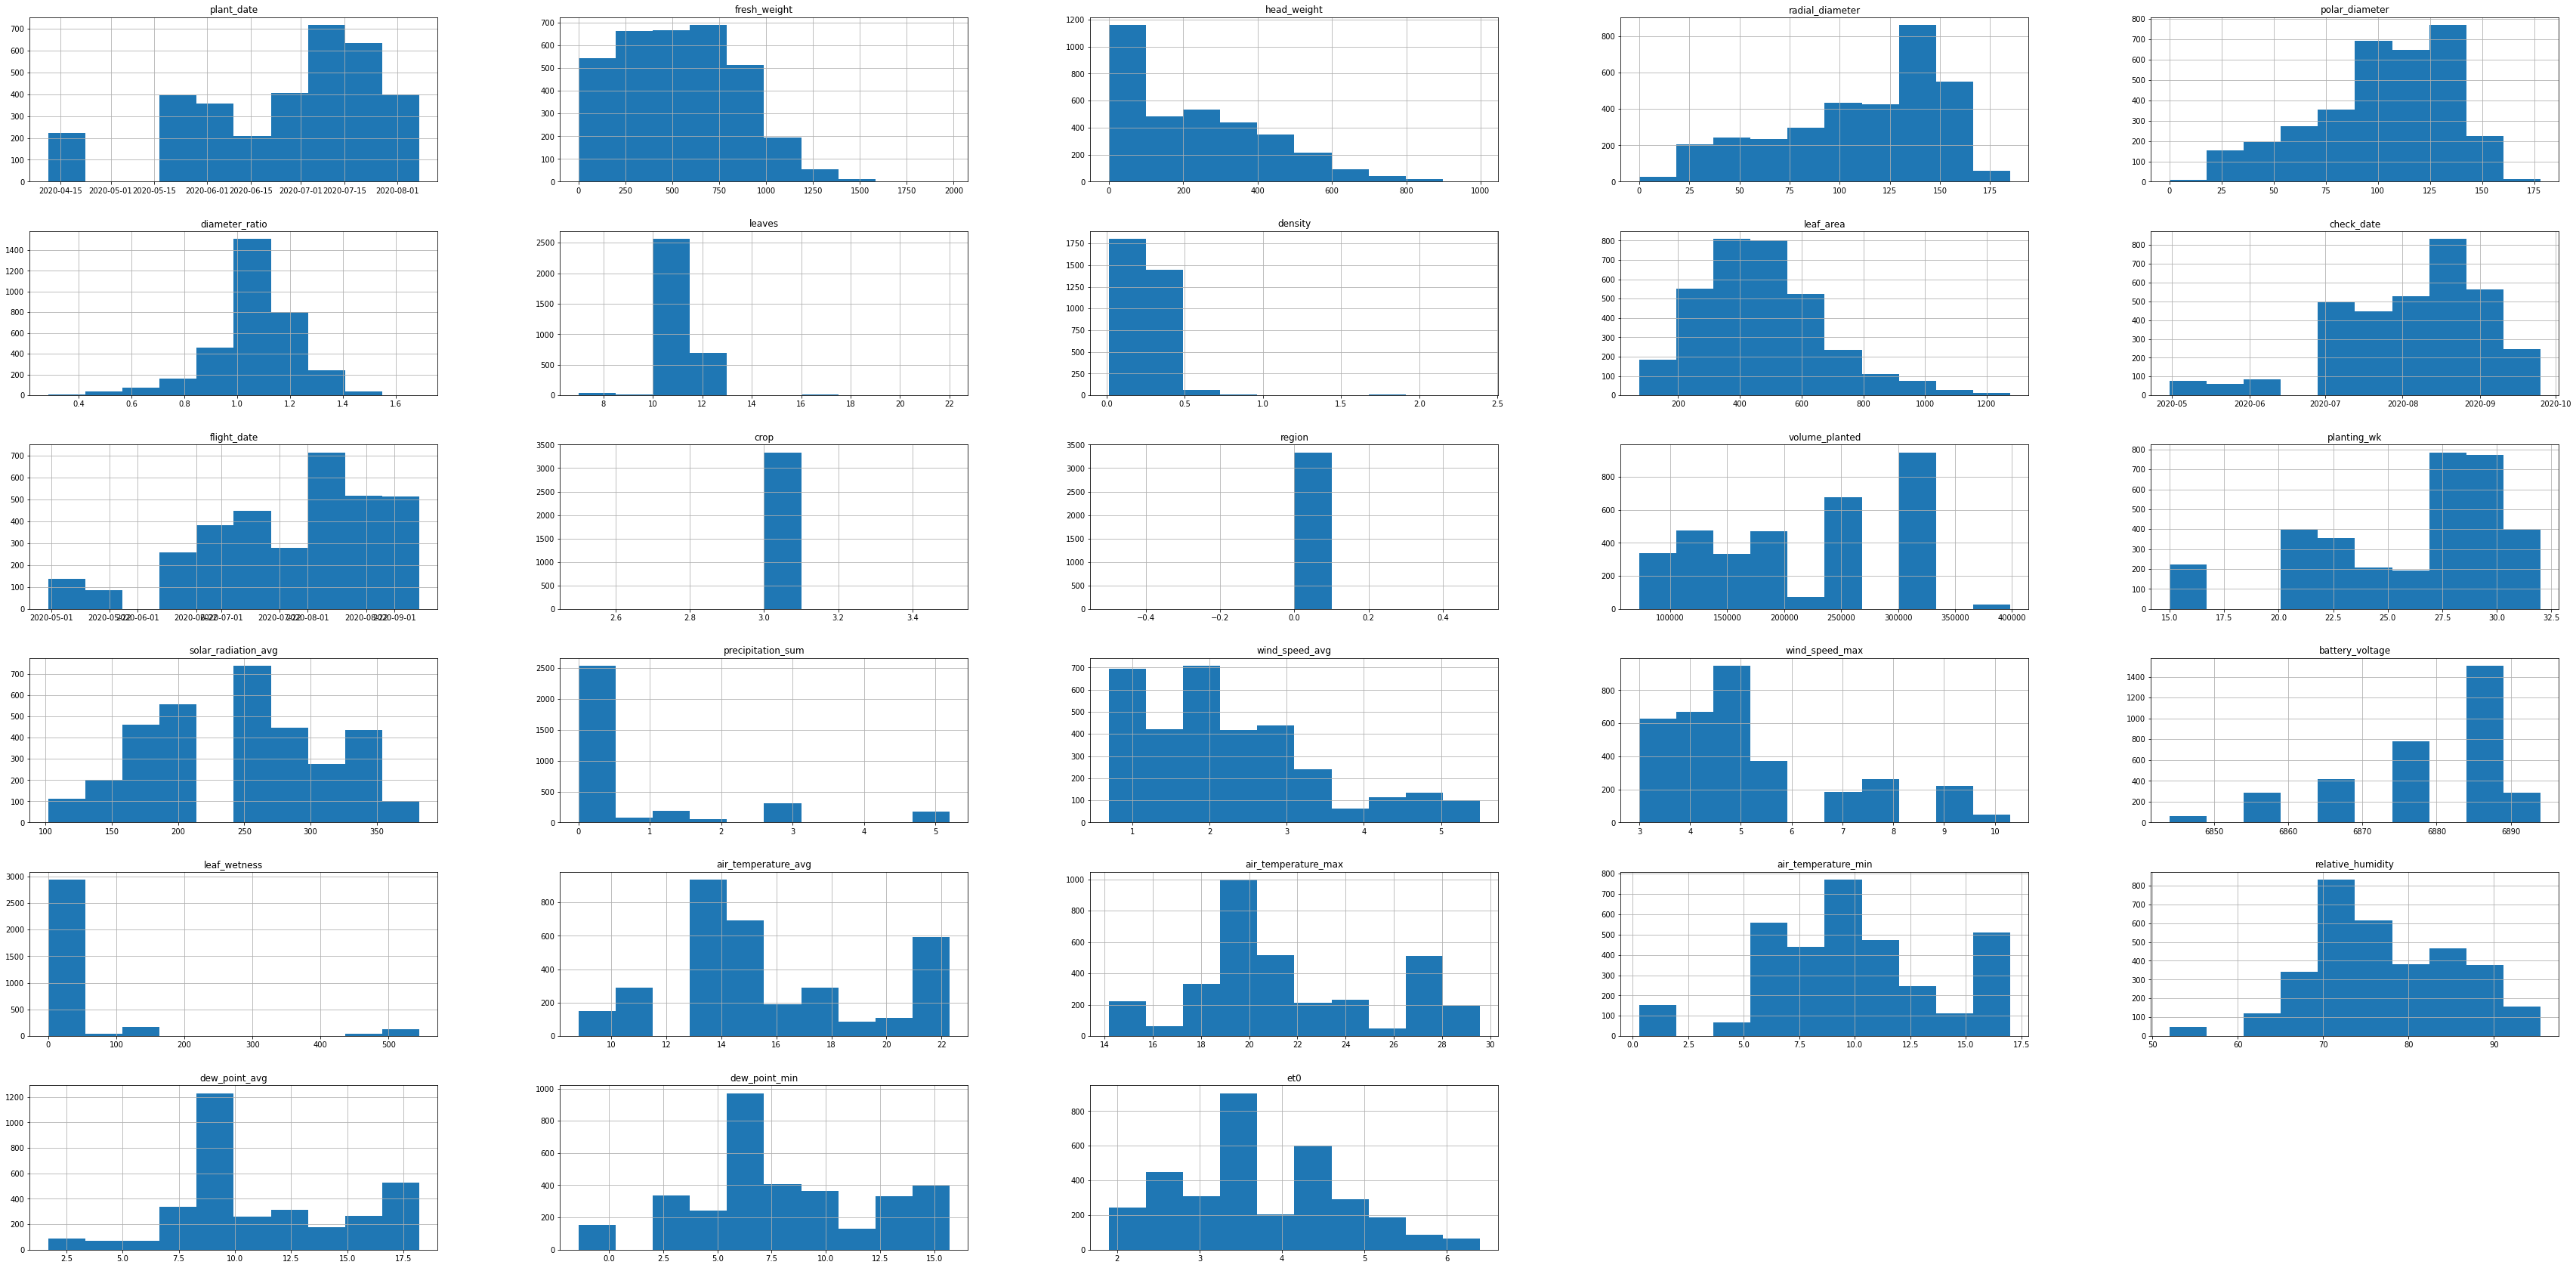

In [ ]:
df.hist(figsize = (60,30))
plt.show()    

-From the picture you can see that the crop and region have only one value so the column can be removed.

-There are some outliers that cause the accuracy of the model to be lower: column leaves and density.

In [ ]:
df = df.drop(['crop','region'], axis=1)
df

,plant_date,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,check_date,...,wind_speed_max,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0
0,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,185.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
1,2020-04-11,15.0,229.826016,110.120325,102.559350,1.057895,11.000000,0.253778,156.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
2,2020-04-11,16.0,241.268398,112.070707,103.484848,1.064834,12.000000,0.262851,137.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
3,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,225.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
4,2020-04-11,15.0,244.803859,111.231511,103.090032,1.062031,11.000000,0.266426,157.0,2020-04-30,...,4.5,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,2020-08-08,621.0,188.000000,120.000000,85.000000,1.411765,10.647059,0.293344,780.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3330,2020-08-08,680.0,273.000000,120.000000,90.000000,1.333333,11.500000,0.402308,834.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3331,2020-08-08,583.0,203.000000,115.000000,92.000000,1.250000,10.608696,0.318650,726.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3
3332,2020-08-08,609.0,213.000000,120.000000,90.000000,1.333333,11.000000,0.313889,769.0,2020-09-25,...,4.9,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b273b390>,
      dtype=object)

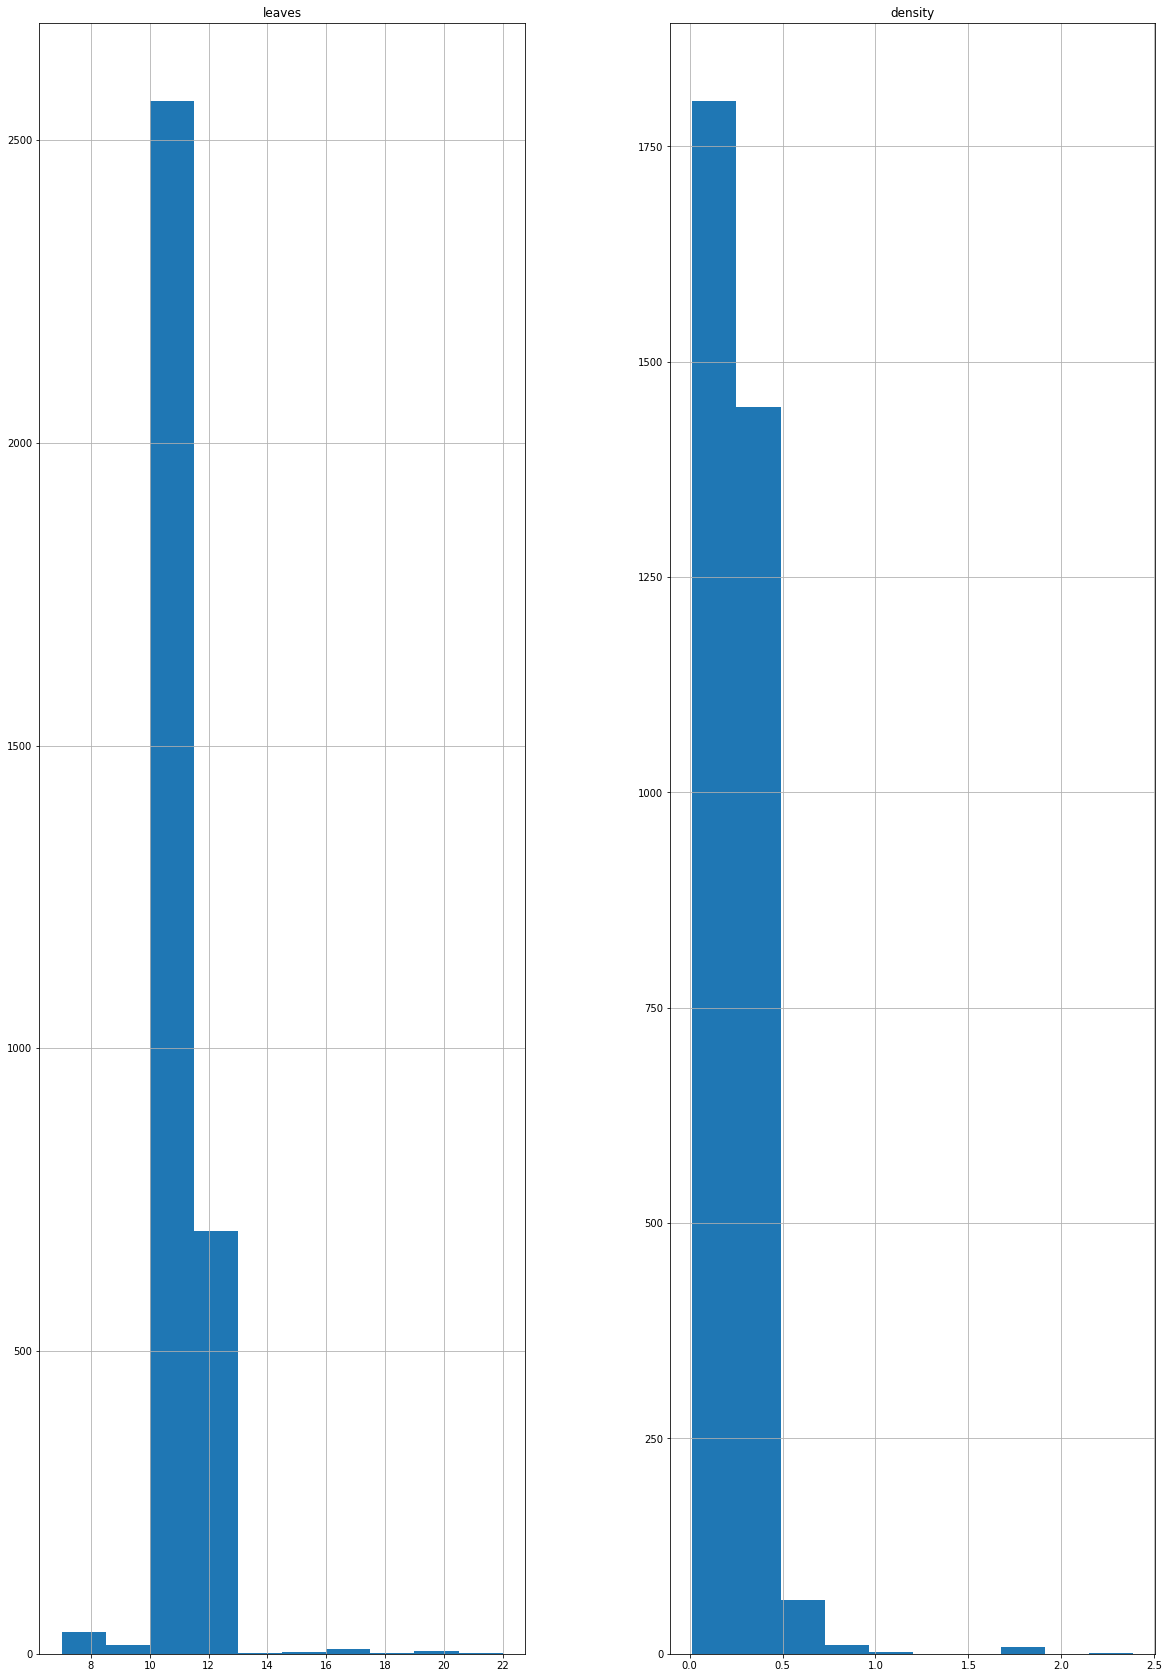

In [ ]:
# ข้อมูลของleavesควรอยู่ที่10-13 นอกนั้นคือoutlier
# ข้อมูลของdensityควรอยู่ที่0-1 นอกนั้นคือoutlier
df[['leaves','density']].hist(figsize = (20,30))
# โดยเราจะใช้LocalOutlierFactorในภายหลัง

- Leaves data should be 10-13 The rest is outlier.

- Density data should be 0-1 The rest is outlier.
-We will use LocalOutlierFactor after virtualization.

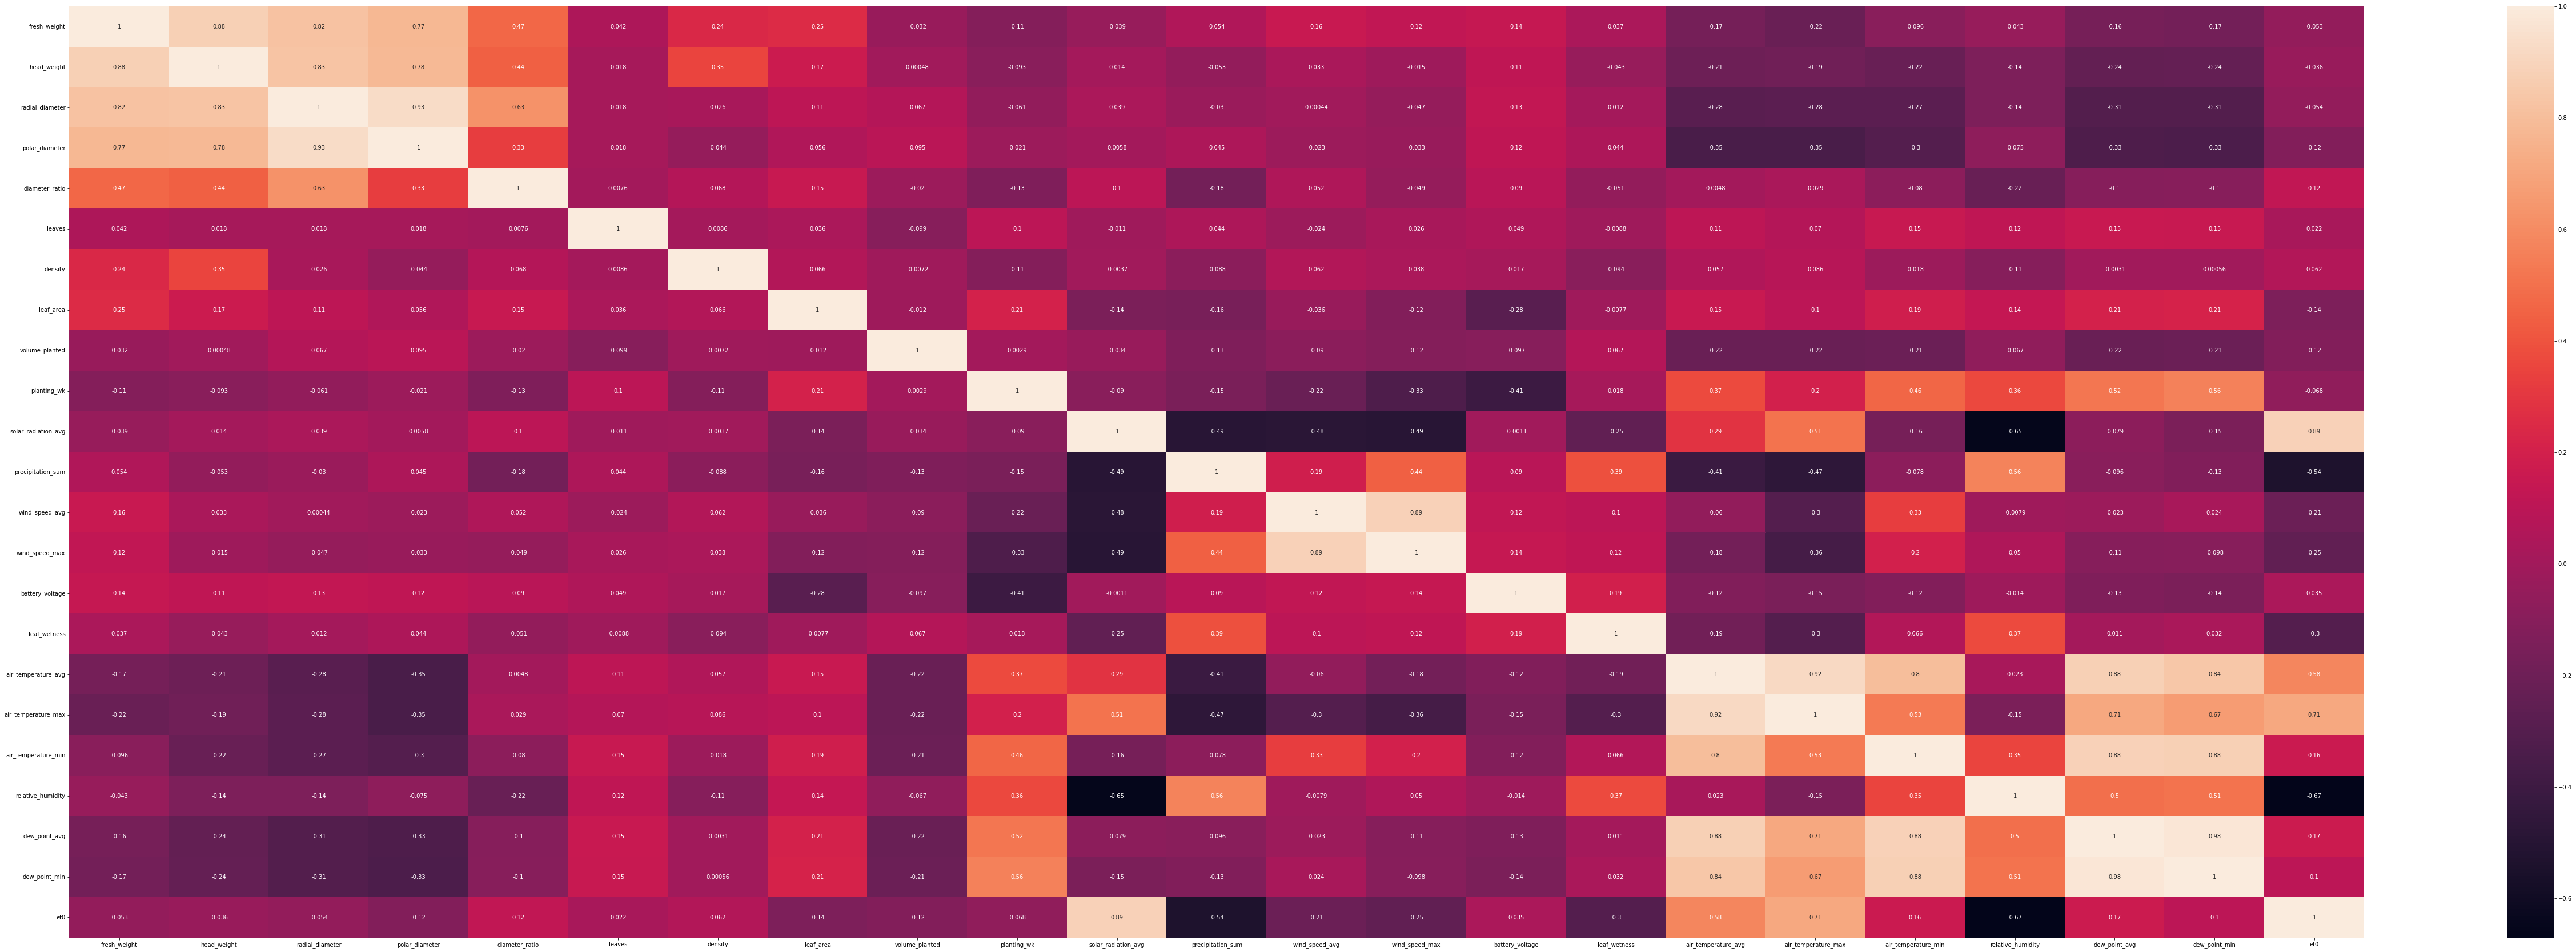

In [ ]:
plt.figure(figsize = (90,30))
plant_corr = df.corr()
sns.heatmap(plant_corr,xticklabels=plant_corr.columns,yticklabels=plant_corr.columns,annot=True)
# print(plant_corr)

In [ ]:
plant_columns = plant_corr.columns.tolist()
for i in range(len(plant_columns)):
  correlation_columns = plant_corr[f'{plant_corr.columns[i]}']
  
  for j in range(len(plant_columns)):
    correleation_row = correlation_columns[j]
    # if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    if (correleation_row < 0.1 and correleation_row > -0.1):
      print(plant_columns[i],plant_columns[j],correleation_row)

fresh_weight leaves 0.04160933951549903
fresh_weight volume_planted -0.03174270469452266
fresh_weight solar_radiation_avg -0.03894004375104743
fresh_weight precipitation_sum 0.05448973169181679
fresh_weight leaf_wetness 0.03691230428490481
fresh_weight air_temperature_min -0.09595689395561982
fresh_weight relative_humidity -0.043277829496104
fresh_weight et0 -0.05283236857359605
head_weight leaves 0.01835506595511514
head_weight volume_planted 0.0004760263015511829
head_weight planting_wk -0.09265036328463362
head_weight solar_radiation_avg 0.014287487180302517
head_weight precipitation_sum -0.052687572457513404
head_weight wind_speed_avg 0.03284044019217785
head_weight wind_speed_max -0.015312057351009043
head_weight leaf_wetness -0.04348391780382503
head_weight et0 -0.03557969770713436
radial_diameter leaves 0.018387282087781415
radial_diameter density 0.026211893258843898
radial_diameter volume_planted 0.06730350414929714
radial_diameter planting_wk -0.06106812997155513
radial_diame

positive correlation is
dew_point_avg and dew_point_min have positive correlation = 0.9795260554227899

radial_diameter and polar_diameter have positive correlation = 0.9329931747075205

air_temperature_avg and air_temperature_max have positive correlation = 0.9192596209913313

wind_speed_avg wind and_speed_max have positive correlation = 0.8889143029798844

solar_radiation_avg and et0 have positive correlation = 0.8854798169085845

air_temperature_min and dew_point_avg have positive correlation = 0.8838087395552737

air_temperature_min and dew_point_min have positive correlation = 0.8783053567473186

fresh_weight and head_weight have positive correlation = 0.8775566117055494

air_temperature_avg and dew_point_avg have positive correlation = 0.8773803554598292

air_temperature_avg and dew_point_min have positive correlation = 0.8417210893642353

head_weight and radial_diameter have positive correlation = 0.830207666539997

fresh_weight and radial_diameter have positive correlation = 0.8198350202505361

air_temperature_avg and air_temperature_min have positive correlation = 0.803247181843634




and

nagative correlation is

precipitation_sum and et0 have negative correlation = -0.5396328009711105

solar_radiation_avg and relative_humidity have negative correlation = -0.6509795398170711

relative_humidity and et0 have negative correlation = -0.670453876504271

In [ ]:
df.describe()

,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,volume_planted,planting_wk,...,wind_speed_max,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,...,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,542.742865,233.394715,110.152787,102.160707,1.060395,10.826243,0.259960,472.398322,214124.767846,26.268746,...,5.088542,6876.696461,36.837133,15.809673,21.490630,10.144988,77.239100,11.113137,7.982244,3.702939
std,308.038325,197.350733,40.243104,32.940274,0.164314,0.764462,0.135076,198.623927,79544.271492,4.418451,...,1.800495,11.646081,118.693347,3.538285,3.975118,4.005882,8.333576,3.987426,4.323843,1.014804
min,0.632000,0.000000,0.000000,0.000000,0.285714,7.000000,0.014551,74.000000,72912.000000,15.000000,...,3.000000,6844.000000,0.000000,8.820000,14.180000,0.290000,52.010000,1.700000,-1.400000,1.900000
25%,287.250000,53.250000,80.000000,80.000000,1.000000,10.608696,0.182971,328.000000,142296.000000,23.000000,...,3.800000,6874.000000,0.000000,14.010000,18.960000,7.810000,71.500000,8.900000,5.800000,2.900000
50%,529.000000,207.000000,120.000000,105.000000,1.064834,10.647059,0.240956,453.000000,220752.000000,27.000000,...,4.600000,6884.000000,0.000000,14.790000,20.390000,9.870000,75.380000,9.600000,7.000000,3.500000
75%,774.500000,374.000000,140.000000,130.000000,1.160000,11.000000,0.310119,581.750000,300720.000000,30.000000,...,5.700000,6884.000000,0.000000,18.120000,24.450000,12.810000,83.720000,14.000000,10.900000,4.300000
max,1978.000000,998.000000,185.000000,178.000000,1.687500,22.000000,2.387324,1276.000000,398328.000000,32.000000,...,10.300000,6894.000000,545.000000,22.290000,29.570000,16.990000,95.440000,18.200000,15.700000,6.400000


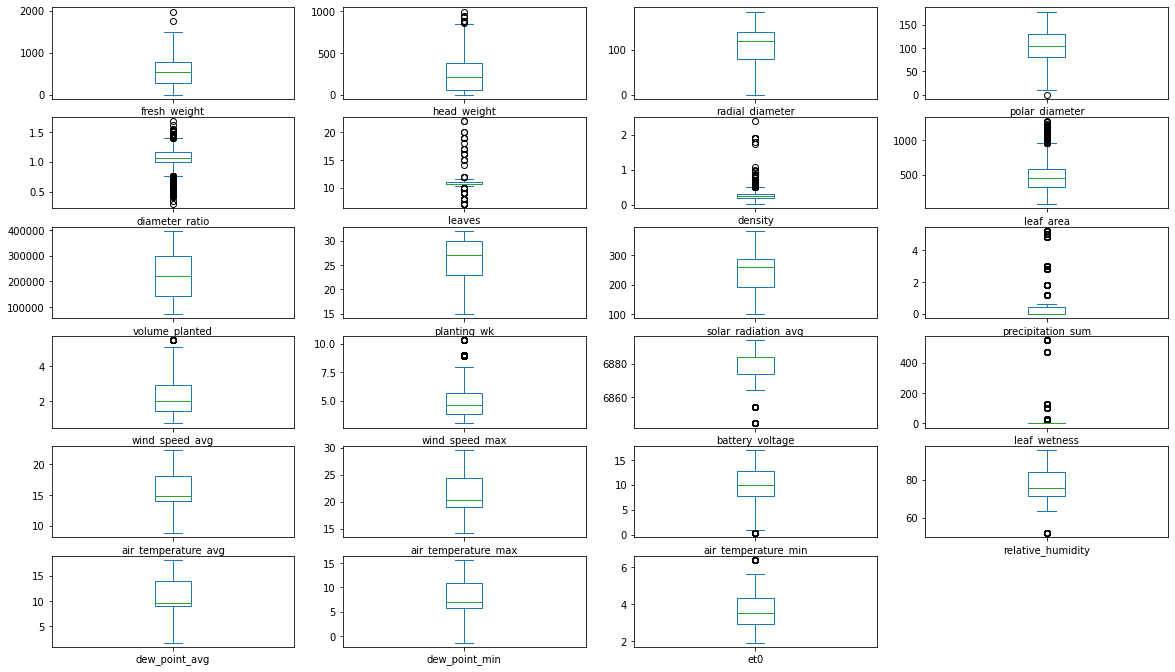

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

change date to number

In [ ]:
df['days_to_check'] = df['flight_date'].dt.dayofyear - df['plant_date'].dt.dayofyear
df['plant_date'] = pd.to_datetime(df['plant_date']).map(dt.datetime.toordinal)
df['check_date'] = pd.to_datetime(df['check_date']).map(dt.datetime.toordinal)
df['flight_date'] = pd.to_datetime(df['flight_date']).map(dt.datetime.toordinal)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plant_date           3334 non-null   int64  
 1   fresh_weight         3334 non-null   float64
 2   head_weight          3334 non-null   float64
 3   radial_diameter      3334 non-null   float64
 4   polar_diameter       3334 non-null   float64
 5   diameter_ratio       3334 non-null   float64
 6   leaves               3334 non-null   float64
 7   density              3334 non-null   float64
 8   leaf_area            3334 non-null   float64
 9   check_date           3334 non-null   int64  
 10  flight_date          3334 non-null   int64  
 11  volume_planted       3334 non-null   float64
 12  planting_wk          3334 non-null   float64
 13  solar_radiation_avg  3334 non-null   float64
 14  precipitation_sum    3334 non-null   float64
 15  wind_speed_avg       3334 non-null   f

,plant_date,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,check_date,...,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0,days_to_check
0,737526,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,185.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
1,737526,15.0,229.826016,110.120325,102.559350,1.057895,11.000000,0.253778,156.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
2,737526,16.0,241.268398,112.070707,103.484848,1.064834,12.000000,0.262851,137.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
3,737526,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,225.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
4,737526,15.0,244.803859,111.231511,103.090032,1.062031,11.000000,0.266426,157.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,737645,621.0,188.000000,120.000000,85.000000,1.411765,10.647059,0.293344,780.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3330,737645,680.0,273.000000,120.000000,90.000000,1.333333,11.500000,0.402308,834.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3331,737645,583.0,203.000000,115.000000,92.000000,1.250000,10.608696,0.318650,726.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3332,737645,609.0,213.000000,120.000000,90.000000,1.333333,11.000000,0.313889,769.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33


Outlier detection

In [ ]:
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
df['check_outlier'] = predict_outlier.tolist()
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df

,plant_date,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,check_date,...,battery_voltage,leaf_wetness,air_temperature_avg,air_temperature_max,air_temperature_min,relative_humidity,dew_point_avg,dew_point_min,et0,days_to_check
0,737526,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,185.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
1,737526,15.0,229.826016,110.120325,102.559350,1.057895,11.000000,0.253778,156.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
2,737526,16.0,241.268398,112.070707,103.484848,1.064834,12.000000,0.262851,137.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
3,737526,15.0,244.803859,111.231511,103.090032,1.062031,10.000000,0.266426,225.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
4,737526,15.0,244.803859,111.231511,103.090032,1.062031,11.000000,0.266426,157.0,737545,...,6884.0,0.0,14.75,24.45,4.42,64.24,6.5,4.3,3.7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,737645,621.0,188.000000,120.000000,85.000000,1.411765,10.647059,0.293344,780.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3275,737645,680.0,273.000000,120.000000,90.000000,1.333333,11.500000,0.402308,834.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3276,737645,583.0,203.000000,115.000000,92.000000,1.250000,10.608696,0.318650,726.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33
3277,737645,609.0,213.000000,120.000000,90.000000,1.333333,11.000000,0.313889,769.0,737693,...,6874.0,0.0,21.36,26.78,16.99,80.92,17.6,15.7,4.3,33


#train_test_split

In [ ]:
# in requirement use [fresh weight, head weight, polar diameter, radial diameter] or [fresh weight, number of leaves].
# FEATURE
# – Diameter ratio: is คำนวณจากPolar Diameter และ Radial Diameter อย่าใช้คอลัมน์นี้สำหรับการคาดคะเนของคุณ <not use in prediction> ==> not use in x
# – Density (kg/L): คำนวณจากการวัดจากข้างบน อย่าใช้คอลัมน์นี้สำหรับการคาดคะเนของคุณ <not use in prediction> ==> not use in x
# – Head Weight (g): ชีวมวลเปียกของพืช ในรูปแบบที่ขายได้ (เช่น อย่างที่คุณพบว่ามันบรรจุในกล่องสำหรับซุปเปอร์มาร์เก็ต) – อย่าใช้คอลัมน์นี้เป็นfeatureในการทำนายของคุณ <not use in features> ==> not use in y
X = df.drop(["head_weight", "polar_diameter", "radial_diameter"], axis=1,inplace=False).to_numpy()
# LABEL
y = df[["head_weight", "polar_diameter", "radial_diameter"]].to_numpy()



print(X,y)
print(X.shape, y.shape)

[[7.37526000e+05 1.50000000e+01 1.06203103e+00 ... 4.30000000e+00
  3.70000000e+00 1.90000000e+01]
 [7.37526000e+05 1.50000000e+01 1.05789532e+00 ... 4.30000000e+00
  3.70000000e+00 1.90000000e+01]
 [7.37526000e+05 1.60000000e+01 1.06483427e+00 ... 4.30000000e+00
  3.70000000e+00 1.90000000e+01]
 ...
 [7.37645000e+05 5.83000000e+02 1.25000000e+00 ... 1.57000000e+01
  4.30000000e+00 3.30000000e+01]
 [7.37645000e+05 6.09000000e+02 1.33333333e+00 ... 1.57000000e+01
  4.30000000e+00 3.30000000e+01]
 [7.37645000e+05 7.09000000e+02 1.39784946e+00 ... 1.57000000e+01
  4.30000000e+00 3.30000000e+01]] [[244.80385852 103.09003215 111.23151125]
 [229.82601626 102.55934959 110.1203252 ]
 [241.26839827 103.48484848 112.07070707]
 ...
 [203.          92.         115.        ]
 [213.          90.         120.        ]
 [283.          93.         130.        ]]
(3279, 24) (3279, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=300)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2623, 24), (656, 24), (2623, 3), (656, 3))

scalar

In [ ]:

# scalar
# https://ichi.pro/th/kar-prab-khnad-khunlaks-na-phl-khxng-scikit-learn-scaler-thi-taek-tang-kan-deep-dive-156046754400582
# Min max is used when we want to scale all the columns between same value like -1,1
# Standard scaler takes mean as 0 and then scale all the data according to  the unit variance.
# Robust will first remove outliers
robust_scaler = preprocessing.RobustScaler()
robust_fit_transform = robust_scaler.fit_transform(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
minmax_fit_transform = min_max_scaler.fit_transform(X_train)

standard_scaler = preprocessing.StandardScaler()
standard_fit_transform = standard_scaler.fit_transform(X_train)


# robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

Text(0.5, 1.0, 'robust_scaler')

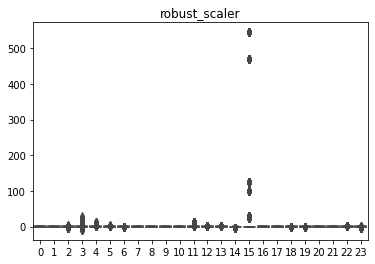

In [ ]:
sns.boxplot(data=robust_fit_transform)
plt.title('robust_scaler')

Text(0.5, 1.0, 'min_max_scaler')

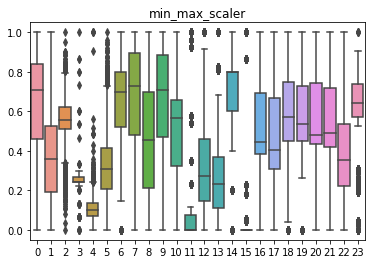

In [ ]:
sns.boxplot(data=minmax_fit_transform)
plt.title('min_max_scaler')

Text(0.5, 1.0, 'standard_fit_transform')

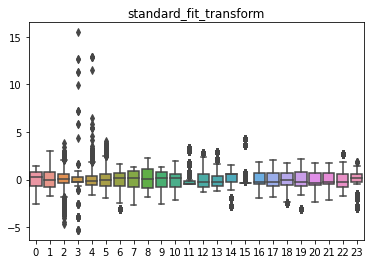

In [ ]:
sns.boxplot(data=standard_fit_transform)
plt.title('standard_fit_transform')

the best scalar is MinMaxScaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scalar = min_max_scaler.fit_transform(X_train)
# y_train_scalar = min_max_scaler.fit_transform(y_train)
X_test_scalar = min_max_scaler.fit_transform(X_test)
# y_test_scalar = min_max_scaler.fit_transform(y_test)
print(X_train_scalar.shape,X_test_scalar.shape)

(2623, 24) (656, 24)


# Train Model

##linear regression

In [ ]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scalar, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", model_linear_regression.intercept_)
print("Coefficients:",model_linear_regression.coef_)

Intercept:  [-8.24369640e+09 -3.70363179e+11 -4.29354174e+11]
Coefficients: [[ 7.54615281e+10  9.30905930e+02  5.27763580e+00  2.10502748e+01
   4.00710662e+02 -1.36416713e+02 -6.62579257e+02 -8.43393544e+10
   2.14450141e+00  1.96332084e+02  7.36963487e+01 -3.01805906e+01
   2.87873274e+01 -3.32091103e+01  6.46354475e+01  8.95353997e+00
   1.22955587e+01  6.48907607e+02  2.43384616e+02  9.33240032e+01
  -7.10422245e+02 -9.04162960e+01 -4.72980565e+02  2.66334804e+10]
 [ 3.39024756e+12  1.59804688e+02 -2.23206794e+01  1.25733382e+01
  -1.12428080e+02 -3.45423399e+01 -9.64474147e+01 -3.78910022e+12
   7.79670443e+00  3.73829231e+01  1.80853094e+01 -1.18091716e+01
   3.03429493e+00  1.94643292e+00  5.98778894e+00  3.66348035e+00
   5.93935806e+01  6.16099243e+01  9.16333008e+00  4.01639099e+01
  -8.68062744e+01 -6.14293213e+01 -7.17975082e+01  1.19655796e+12]
 [ 3.93024205e+12  1.66357666e+02  9.64917889e+01  1.33371189e+01
  -9.06602753e+01 -3.57470071e+01 -1.25498583e+02 -4.39262347e+1

vitualize coefficients in linear regression

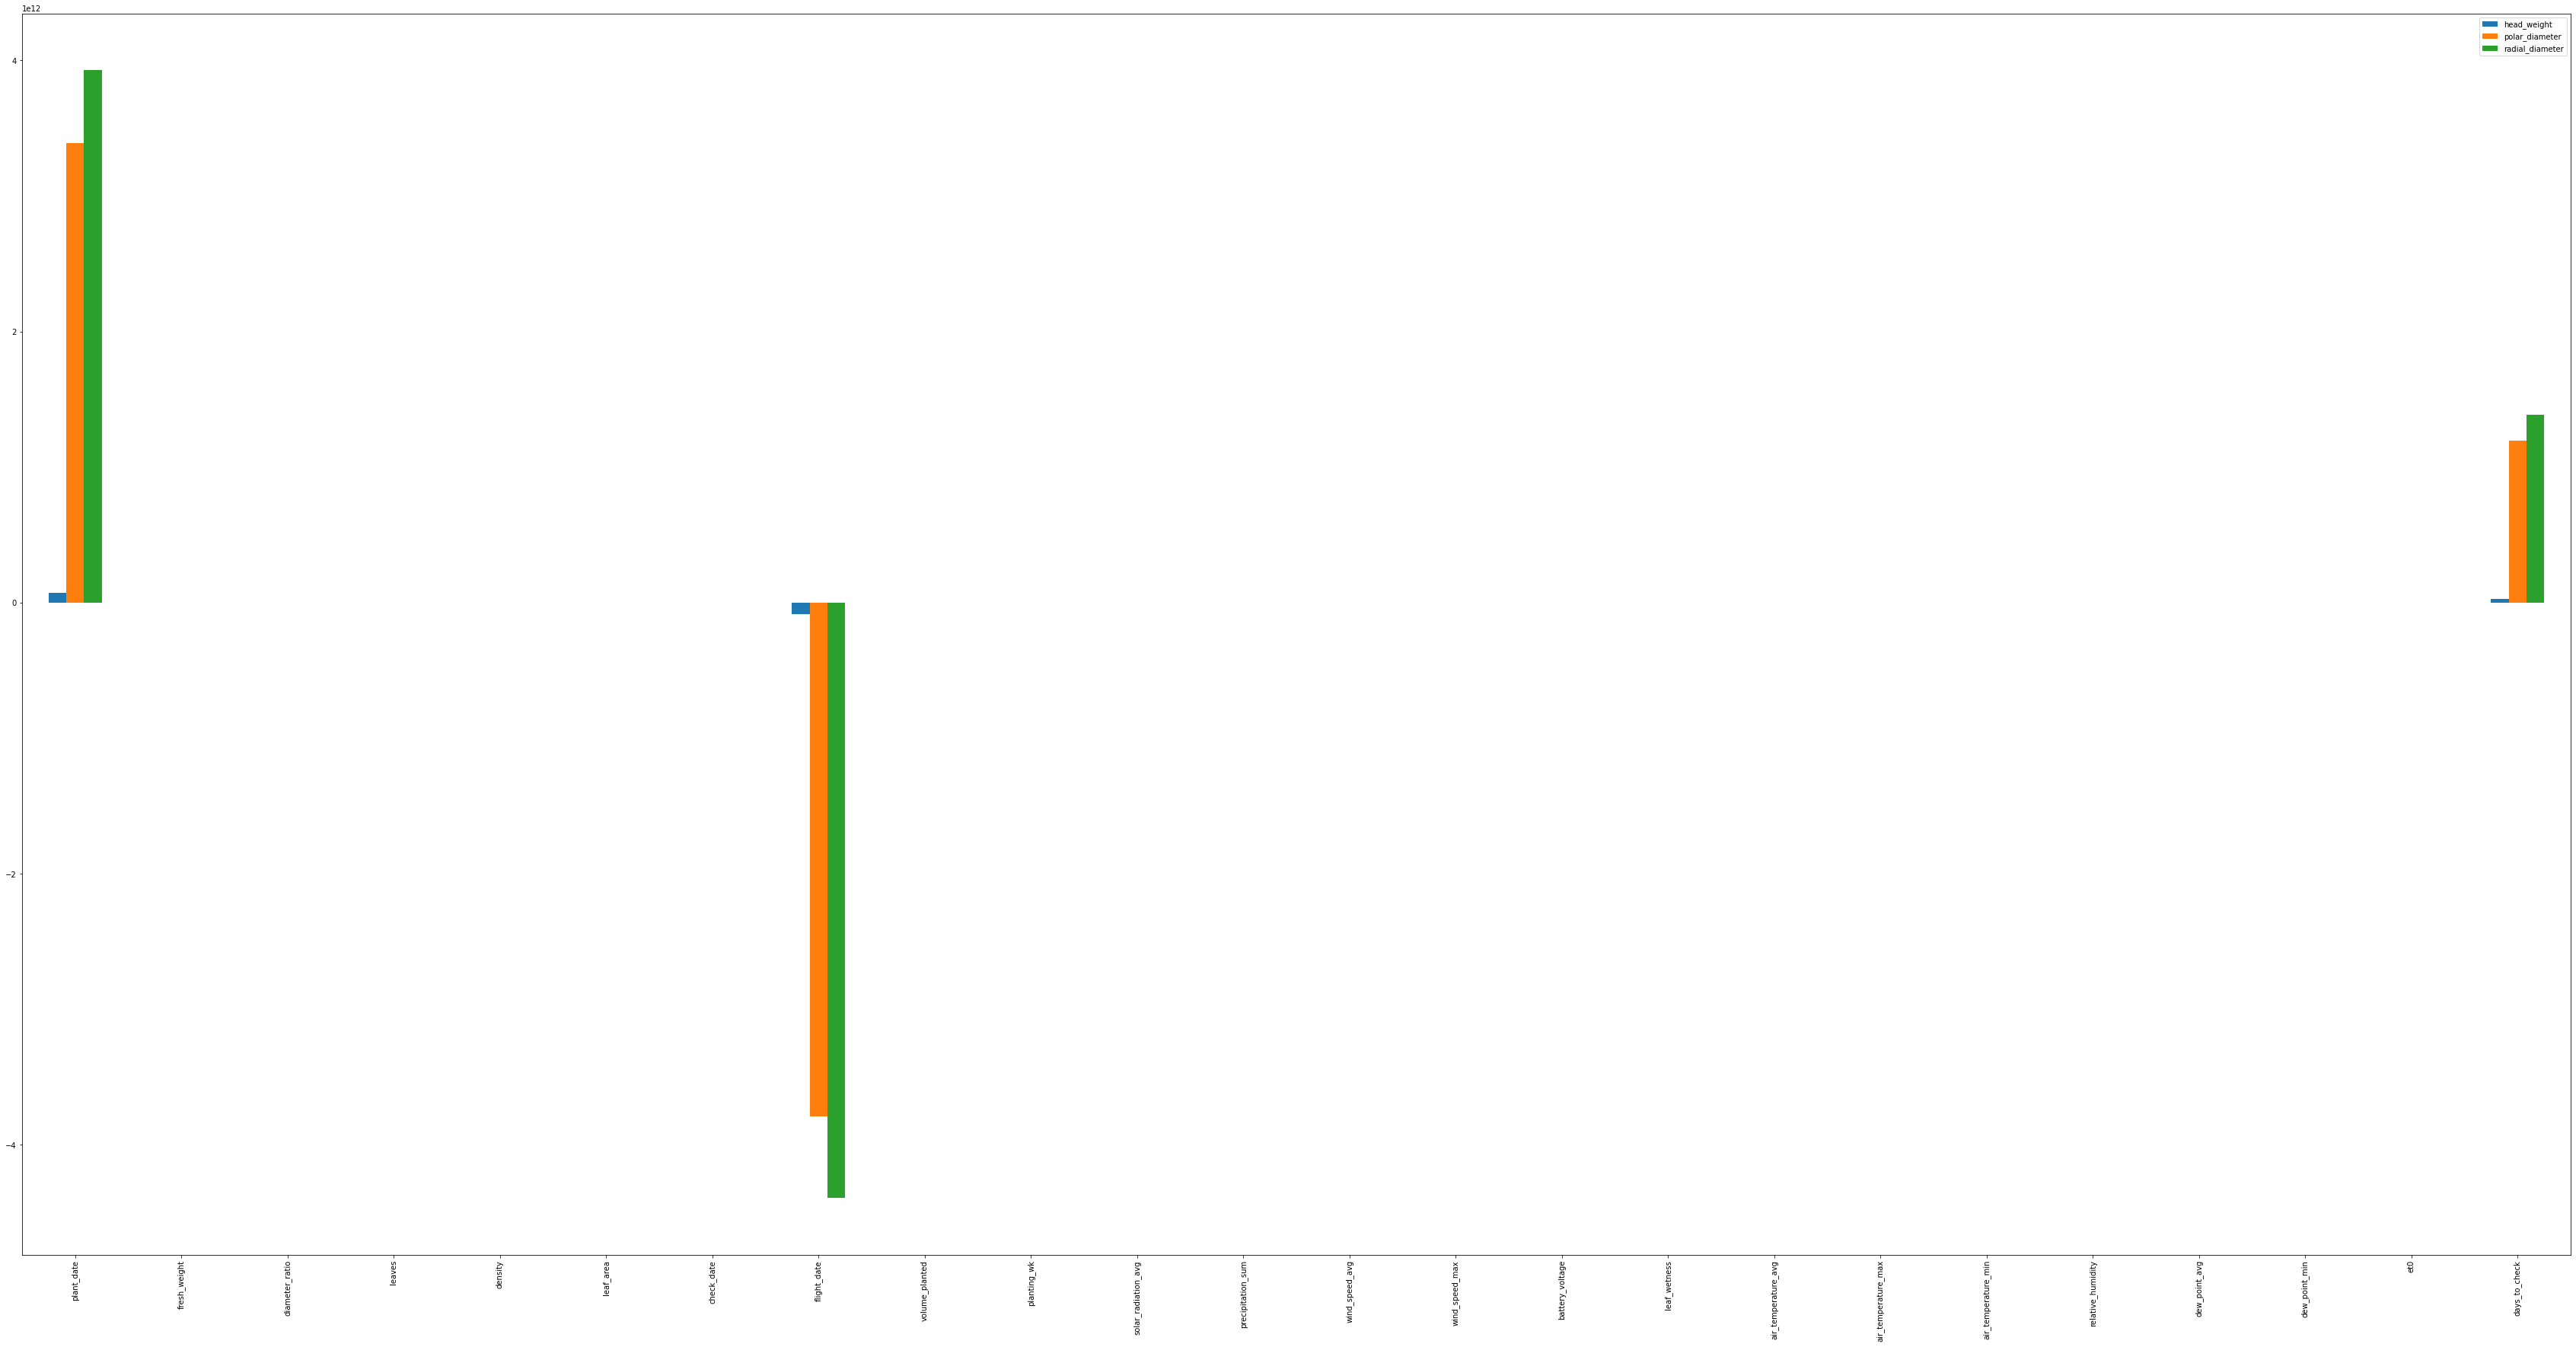

In [ ]:
list_intercept = ["head_weight", "polar_diameter", "radial_diameter"]
list_coefficients = df.drop(["head_weight", "polar_diameter", "radial_diameter"], axis=1,inplace=False).columns
list_temp_coef = []
for i in range(len(model_linear_regression.coef_)):
  # print(list_intercept[i])
  for j in range(len(model_linear_regression.coef_[i])):
    list_temp_coef.append(model_linear_regression.coef_[i][j])
# len(list_temp_coef)
# len(list_temp_coef[0:27]),len(list_temp_coef[27:54]),len(list_temp_coef[54:81])
# list_temp_coef[0:27],list_temp_coef[27:53]

length_each_column = int(len(list_temp_coef)/3)
df_coefficients = pd.DataFrame({"head_weight":list_temp_coef[0:length_each_column],
                        "polar_diameter":list_temp_coef[length_each_column:(length_each_column)*2],
                        "radial_diameter":list_temp_coef[(length_each_column)*2:(length_each_column)*3]
                        })
df_coefficients.index = list_coefficients
df_coefficients
df_coefficients.plot(kind='bar',figsize = (60,30))
plt.show()
# df.hist(figsize = (60,30))

feature selection with Forward selection in linear regression

In [ ]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(model_linear_regression,
           k_features=24,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619993],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441058718],0.719125,"(1, 18)"
3,"(1, 4, 18)",[0.754328321203865],0.754328,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7785655197084522],0.778566,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.7974379457068231],0.797438,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.8069479661884499],0.806948,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 11, 18)",[0.8093986101166727],0.809399,"(1, 2, 4, 5, 7, 11, 18)"
8,"(1, 2, 4, 5, 7, 11, 18, 22)",[0.8116853736565464],0.811685,"(1, 2, 4, 5, 7, 11, 18, 22)"
9,"(1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8143421840407209],0.814342,"(1, 2, 4, 5, 6, 7, 11, 18, 22)"
10,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8176068398827967],0.817607,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)"


Predict Data linear regression

In [ ]:
#Prediction of test set
y_pred_mlr= model_linear_regression.predict(X_test_scalar)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[205.37466049 106.78167725 135.85375977]
 [-49.0928278   56.59265137  75.96014404]
 [312.40998936 116.98345947 126.51763916]
 ...
 [ 85.73101997  89.64019775  48.71673584]
 [ 28.77523136  90.96124268  69.52148438]
 [416.28171539 131.5993042  151.93737793]]


compare actual and predict in linear regression dataframe and histogram

,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,205.374660,106.781677,135.853760
1,54.0,82.0,90.0,-49.092828,56.592651,75.960144
2,348.0,132.0,130.0,312.409989,116.983459,126.517639
3,101.0,120.0,105.0,172.114002,106.344666,104.206299
4,183.0,105.0,125.0,266.550201,106.544739,140.050110
...,...,...,...,...,...,...
651,192.0,135.0,135.0,123.437531,96.944519,107.726318
652,38.0,60.0,60.0,16.453770,62.800476,73.527405
653,6.0,58.0,32.0,85.731020,89.640198,48.716736
654,41.0,100.0,75.0,28.775231,90.961243,69.521484


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b22ba5d0>,
      dtype=object)

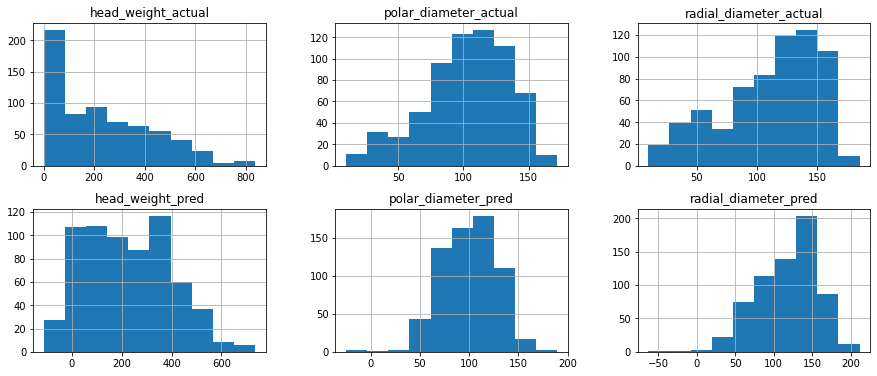

In [ ]:
head_weight_actual = []
polar_diameter_actual = []
radial_diameter_actual = []
head_weight_pred = []
polar_diameter_pred = []
radial_diameter_pred = []

for i in range(len(y_test)):
  head_weight_actual.append(y_test[i][0])
  polar_diameter_actual.append(y_test[i][1])
  radial_diameter_actual.append(y_test[i][2])
  head_weight_pred.append(y_pred_mlr[i][0])
  polar_diameter_pred.append(y_pred_mlr[i][1])
  radial_diameter_pred.append(y_pred_mlr[i][2])


mlr_diff_df = pd.DataFrame({'head_weight_actual':head_weight_actual,
                            'polar_diameter_actual':polar_diameter_actual,
                            'radial_diameter_actual':radial_diameter_actual,
                            'head_weight_pred':head_weight_pred,
                            'polar_diameter_pred':polar_diameter_pred,
                            'radial_diameter_pred':radial_diameter_pred})
display(mlr_diff_df)
mlr_diff_df.hist(figsize=(15,30),layout=(9,3))

compare actual and predict in one value

In [ ]:
print(y_test[50])
print(y_pred_mlr[50])

[158. 110. 128.]
[163.23952293 101.32720947 129.96740723]


example use feature to predict data

In [ ]:
model_linear_regression.predict([[244,111,103,1,5,6,7,8,9,10,2,23,4,6,9,5,4,2,4,7,8,3,4,5]])

array([[1.78628218e+13, 8.02520030e+14, 9.30344441e+14]])

score of model

In [ ]:
scores = cross_val_score(model_linear_regression, X_train_scalar, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

scores: .0.825481 +/- .0.020433


metric of regression

In [ ]:
# regresstion use this!!!!!!

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))
print('R-squared:',r2_score(y_test, y_pred_mlr))

Mean Absolute Error: 28.310442771299957
Mean Squared Error: 2199.58890536102
Root Mean Squared Error: 46.899775109919446
R-squared: 0.8130521732290399


compare actual and predict in one value

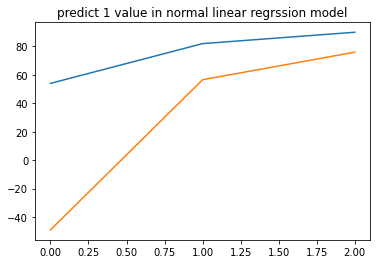

In [ ]:
sns.lineplot(data=y_test[1]).set(title='predict 1 value in normal linear regrssion model')
sns.lineplot(data=y_pred_mlr[1])

compare actual and predict in 10 value

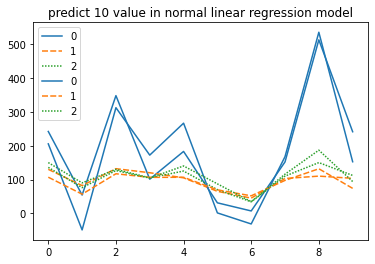

In [ ]:
sns.lineplot(data=y_test[0:10]).set(title='predict 10 value in normal linear regression model')
sns.lineplot(data=y_pred_mlr[0:10])

compare data actual and predict with boxplot

[Text(0.5, 1.0, 'normal linear regression model')]

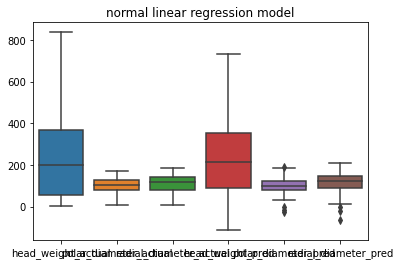

In [ ]:
sns.boxplot(data=mlr_diff_df).set(title='normal linear regression model')

compare data actual and predict with lineplot

[Text(0.5, 1.0, 'normal linear regression model')]

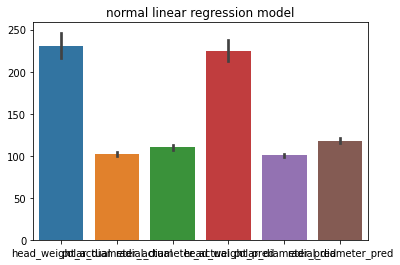

In [ ]:
sns.barplot(data=mlr_diff_df).set(title='normal linear regression model')

### EVALUATION: linear regrssion

use GridSearchCV to find the best parameter

In [ ]:
# MODEL

linear_reg = LinearRegression()

fit_intercept = [True,False]
normalize = [True,False]
copy_X = [True,False]
n_jobs = [-1,None,1,3]
positive = [True,False]

param_grid = { 
    'fit_intercept': fit_intercept,
    'normalize': normalize,
    'copy_X' : copy_X,
    'n_jobs' : n_jobs,
    'positive' : positive
}

CV_lr = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv= 5)
CV_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, None, 1, 3], 'normalize': [True, False],
                         'positive': [True, False]})

best parameter

In [ ]:
CV_lr.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': False,
 'positive': False}

vitualize coefficient

Intercept:  [-8.24369640e+09 -3.70363179e+11 -4.29354174e+11]
Coefficients: [[ 7.54615281e+10  9.30905930e+02  5.27763580e+00  2.10502748e+01
   4.00710662e+02 -1.36416713e+02 -6.62579257e+02 -8.43393544e+10
   2.14450141e+00  1.96332084e+02  7.36963487e+01 -3.01805906e+01
   2.87873274e+01 -3.32091103e+01  6.46354475e+01  8.95353997e+00
   1.22955587e+01  6.48907607e+02  2.43384616e+02  9.33240032e+01
  -7.10422245e+02 -9.04162960e+01 -4.72980565e+02  2.66334804e+10]
 [ 3.39024756e+12  1.59804688e+02 -2.23206794e+01  1.25733382e+01
  -1.12428080e+02 -3.45423399e+01 -9.64474147e+01 -3.78910022e+12
   7.79670443e+00  3.73829231e+01  1.80853094e+01 -1.18091716e+01
   3.03429493e+00  1.94643292e+00  5.98778894e+00  3.66348035e+00
   5.93935806e+01  6.16099243e+01  9.16333008e+00  4.01639099e+01
  -8.68062744e+01 -6.14293213e+01 -7.17975082e+01  1.19655796e+12]
 [ 3.93024205e+12  1.66357666e+02  9.64917889e+01  1.33371189e+01
  -9.06602753e+01 -3.57470071e+01 -1.25498583e+02 -4.39262347e+1

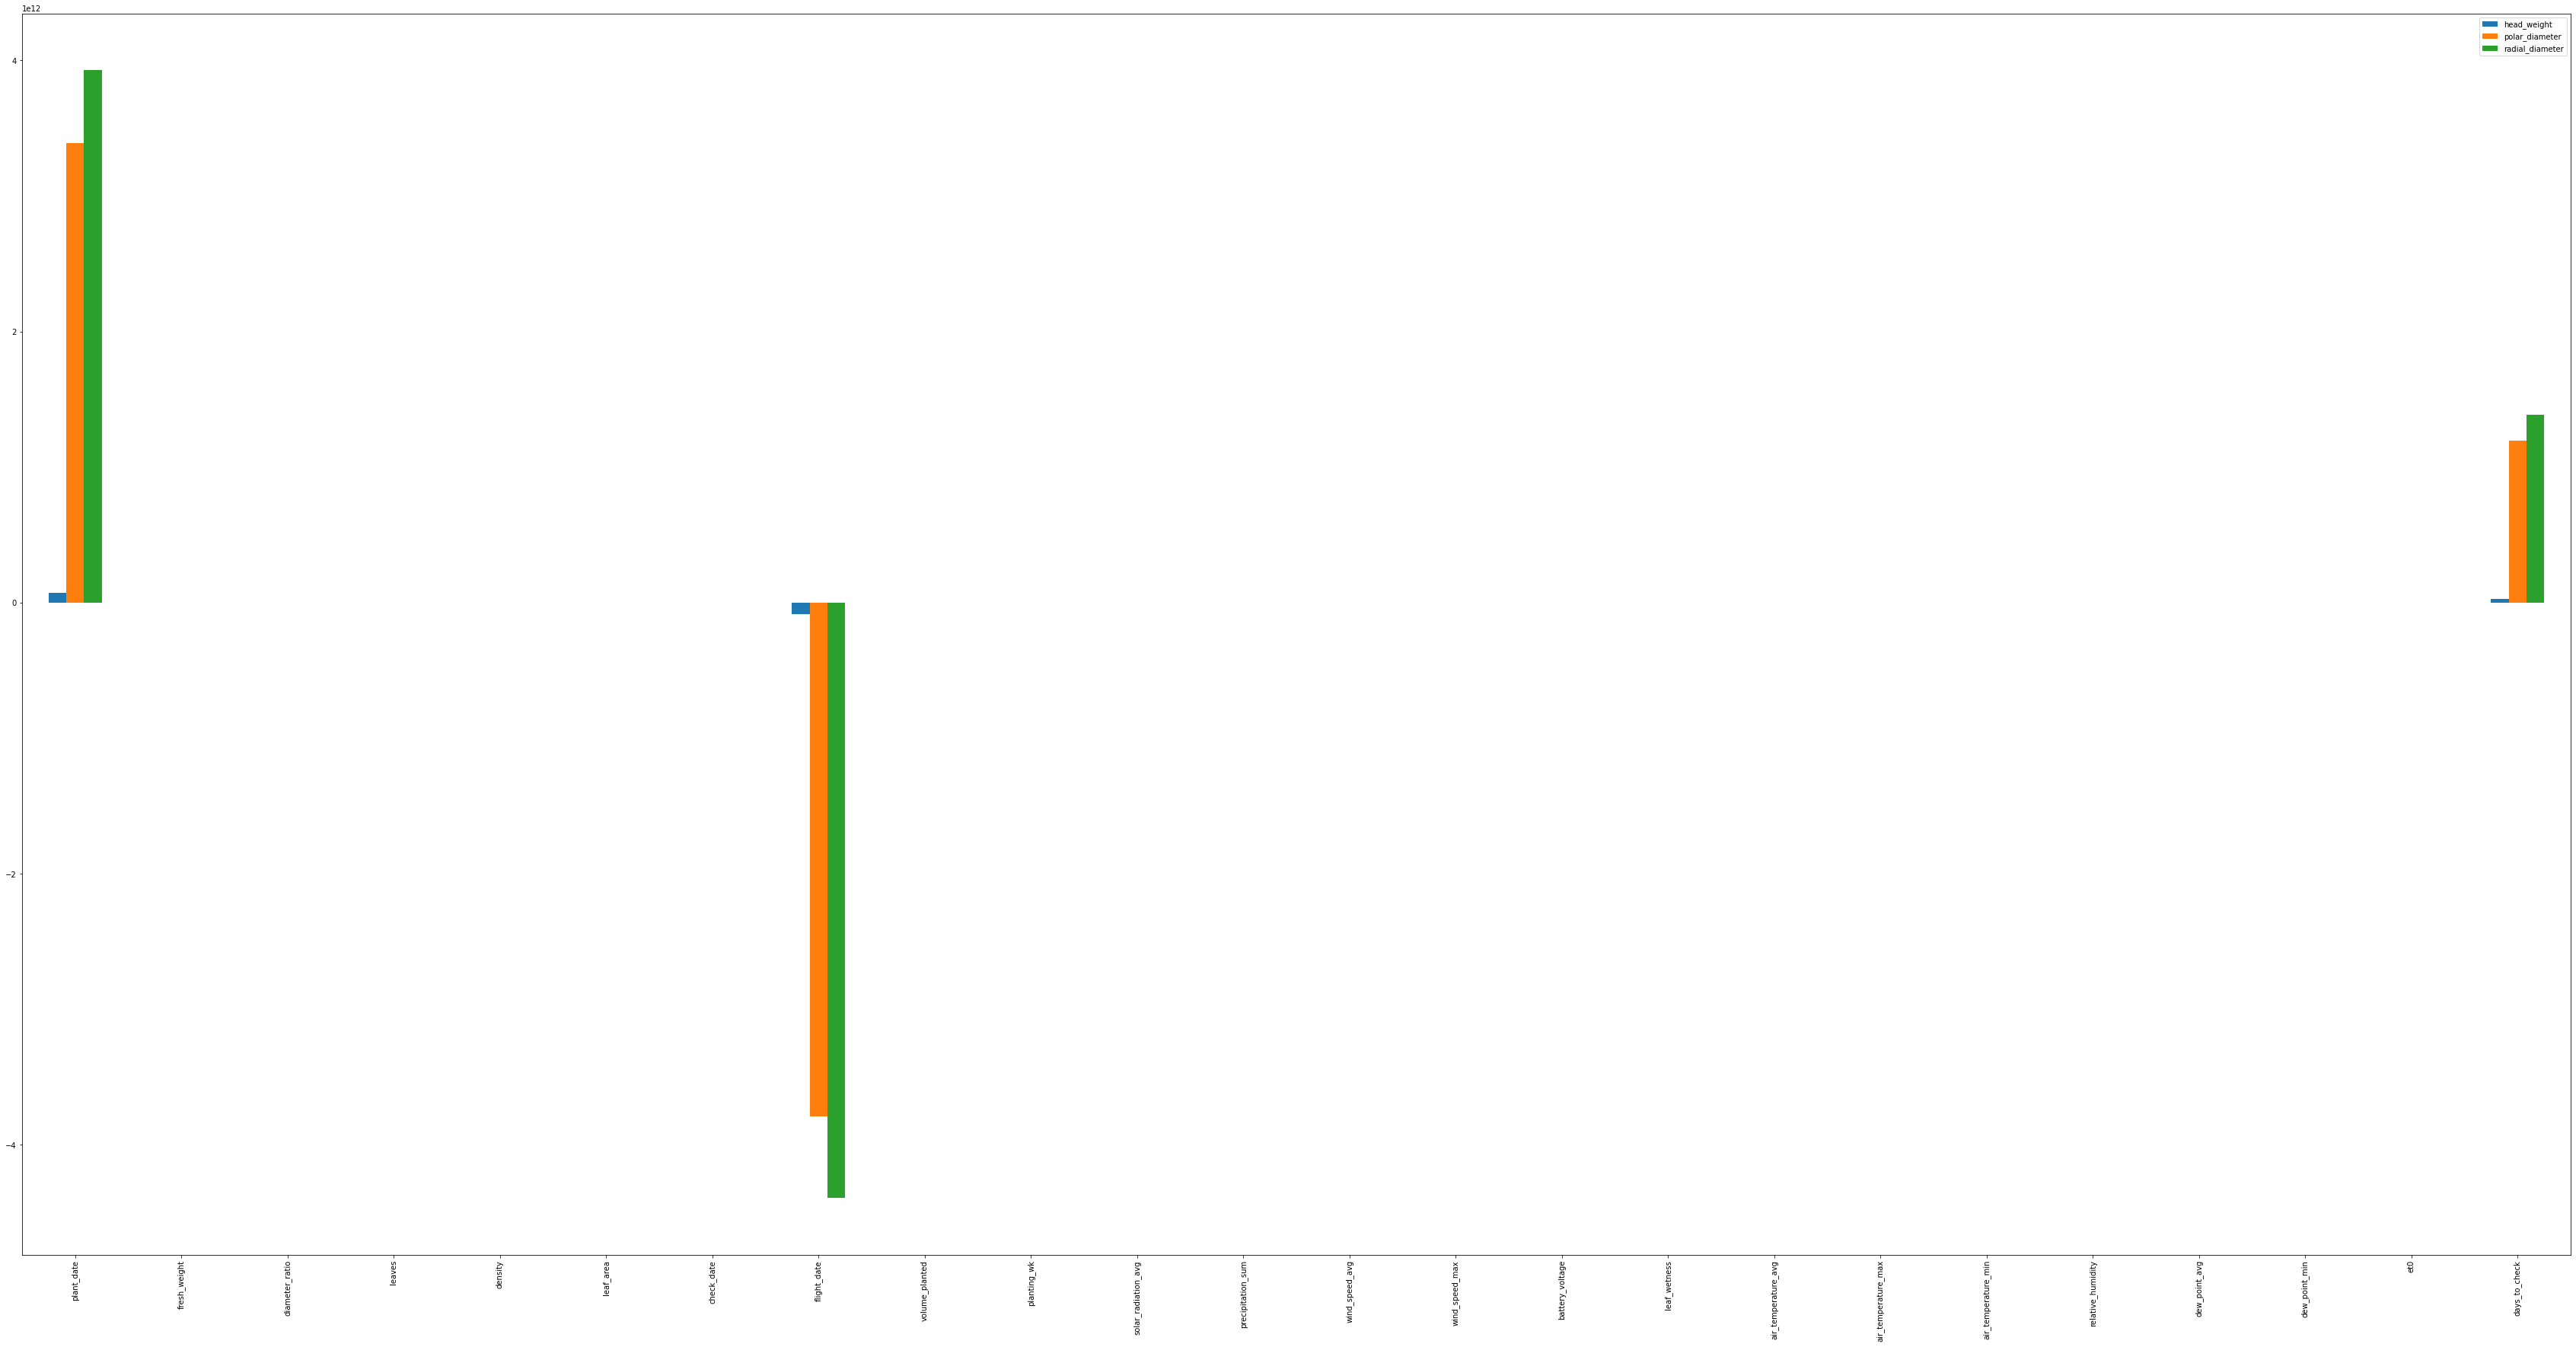

In [ ]:
best_linear_regression = LinearRegression(copy_X = True,
 fit_intercept = True,
 n_jobs = -1,
 normalize = False,
 positive = False
)


best_linear_regression.fit(X_train_scalar, y_train)

print("Intercept: ", best_linear_regression.intercept_)
print("Coefficients:",best_linear_regression.coef_)

list_intercept = ["head_weight", "polar_diameter", "radial_diameter"]
list_coefficients = df.drop(["head_weight", "polar_diameter", "radial_diameter"], axis=1,inplace=False).columns
list_temp_coef = []
for i in range(len(best_linear_regression.coef_)):
  # print(list_intercept[i])
  for j in range(len(best_linear_regression.coef_[i])):
    list_temp_coef.append(best_linear_regression.coef_[i][j])
# len(list_temp_coef)
# len(list_temp_coef[0:27]),len(list_temp_coef[27:54]),len(list_temp_coef[54:81])
# list_temp_coef[0:27],list_temp_coef[27:53]

length_each_column = int(len(list_temp_coef)/3)
df_coefficients = pd.DataFrame({"head_weight":list_temp_coef[0:length_each_column],
                        "polar_diameter":list_temp_coef[length_each_column:(length_each_column)*2],
                        "radial_diameter":list_temp_coef[(length_each_column)*2:(length_each_column)*3]
                        })
df_coefficients.index = list_coefficients
df_coefficients
df_coefficients.plot(kind='bar',figsize = (60,30))
plt.show()
# df.hist(figsize = (60,30))

feature selection with Forward selection

In [ ]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(best_linear_regression,
           k_features=24,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619993],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441058718],0.719125,"(1, 18)"
3,"(1, 4, 18)",[0.754328321203865],0.754328,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7785655197084522],0.778566,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.7974379457068231],0.797438,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.8069479661884499],0.806948,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 11, 18)",[0.8093986101166727],0.809399,"(1, 2, 4, 5, 7, 11, 18)"
8,"(1, 2, 4, 5, 7, 11, 18, 22)",[0.8116853736565464],0.811685,"(1, 2, 4, 5, 7, 11, 18, 22)"
9,"(1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8143421840407209],0.814342,"(1, 2, 4, 5, 6, 7, 11, 18, 22)"
10,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8176068398827967],0.817607,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)"


compare actual and predict with dataframe and histogram

Prediction for test set: [[205.37466049 106.78167725 135.85375977]
 [-49.0928278   56.59265137  75.96014404]
 [312.40998936 116.98345947 126.51763916]
 ...
 [ 85.73101997  89.64019775  48.71673584]
 [ 28.77523136  90.96124268  69.52148438]
 [416.28171539 131.5993042  151.93737793]]


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,205.374660,106.781677,135.853760
1,54.0,82.0,90.0,-49.092828,56.592651,75.960144
2,348.0,132.0,130.0,312.409989,116.983459,126.517639
3,101.0,120.0,105.0,172.114002,106.344666,104.206299
4,183.0,105.0,125.0,266.550201,106.544739,140.050110
...,...,...,...,...,...,...
651,192.0,135.0,135.0,123.437531,96.944519,107.726318
652,38.0,60.0,60.0,16.453770,62.800476,73.527405
653,6.0,58.0,32.0,85.731020,89.640198,48.716736
654,41.0,100.0,75.0,28.775231,90.961243,69.521484


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b2703e10>,
      dtype=object)

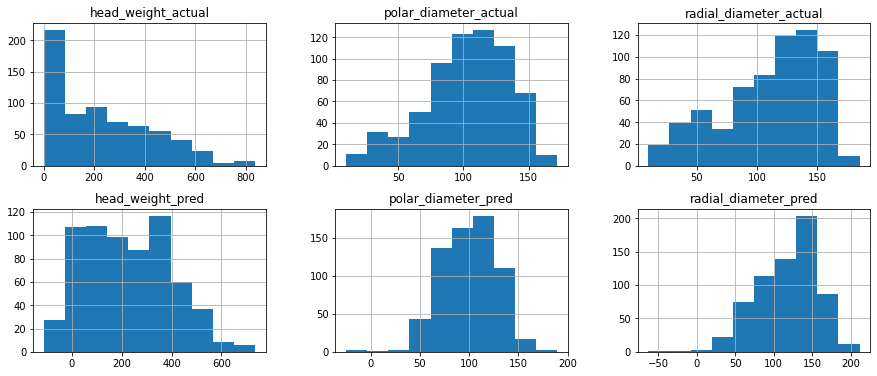

In [ ]:
#Prediction of test set
y_pred_mlr= best_linear_regression.predict(X_test_scalar)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

head_weight_actual = []
polar_diameter_actual = []
radial_diameter_actual = []
head_weight_pred = []
polar_diameter_pred = []
radial_diameter_pred = []

for i in range(len(y_test)):
  head_weight_actual.append(y_test[i][0])
  polar_diameter_actual.append(y_test[i][1])
  radial_diameter_actual.append(y_test[i][2])
  head_weight_pred.append(y_pred_mlr[i][0])
  polar_diameter_pred.append(y_pred_mlr[i][1])
  radial_diameter_pred.append(y_pred_mlr[i][2])


mlr_diff_df_eva = pd.DataFrame({'head_weight_actual':head_weight_actual,
                            'polar_diameter_actual':polar_diameter_actual,
                            'radial_diameter_actual':radial_diameter_actual,
                            'head_weight_pred':head_weight_pred,
                            'polar_diameter_pred':polar_diameter_pred,
                            'radial_diameter_pred':radial_diameter_pred})
display(mlr_diff_df_eva)
mlr_diff_df_eva.hist(figsize=(15,30),layout=(9,3))

metric

In [ ]:
print(y_test[50])
print(y_pred_mlr[50])
print(best_linear_regression.predict([[44,111,103,1,5,6,7,8,9,10,2,23,4,6,9,5,4,2,4,7,8,6,2,4]]))
scores = cross_val_score(best_linear_regression, X_train_scalar, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

# regresstion use this!!!!!!
# MSE, MAE, R-squared, Adjusted R-squared, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))
print('R-squared:',r2_score(y_test, y_pred_mlr))

[158. 110. 128.]
[163.23952293 101.32720947 129.96740723]
[[2.74388273e+12 1.23273960e+14 1.42908885e+14]]
scores: .0.825481 +/- .0.020433
Mean Absolute Error: 28.310442771299957
Mean Squared Error: 2199.58890536102
Root Mean Squared Error: 46.899775109919446
R-squared: 0.8130521732290399


see 1 value compare actual and predict

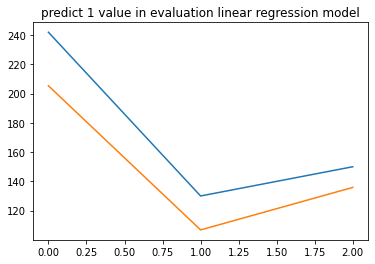

In [ ]:
sns.lineplot(data=y_test[0]).set(title='predict 1 value in evaluation linear regression model')
sns.lineplot(data=y_pred_mlr[0])

see 10 value compare actual and predict

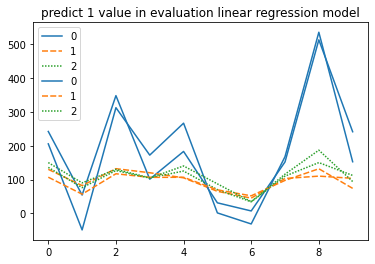

In [ ]:
sns.lineplot(data=y_test[0:10]).set(title='predict 1 value in evaluation linear regression model')
sns.lineplot(data=y_pred_mlr[0:10])

virtualization data with boxplot

[Text(0.5, 1.0, 'evaluation linear regression model')]

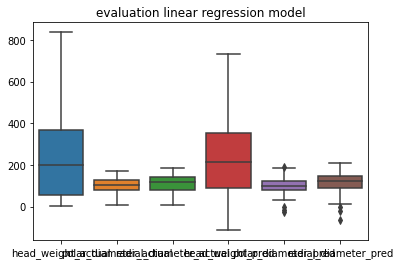

In [ ]:
sns.boxplot(data=mlr_diff_df_eva).set(title='evaluation linear regression model')

## POLYNOMIAL REGRESSION

In [ ]:


# Create linear regression object
poly = PolynomialFeatures()


X_train_poly = poly.fit_transform(X_train_scalar)
X_test_poly = poly.fit_transform(X_test_scalar)

linear_poly_model = linear_model.LinearRegression()
linear_poly_model.fit(X_train_poly, y_train)

print(linear_poly_model.score(X_train_poly, y_train))

0.9567172526745905


In [ ]:
print("Intercept: ", linear_poly_model.intercept_)
print("Coefficients:",linear_poly_model.coef_)

Intercept:  [-7.30715126e+13 -1.65980574e+13 -1.76995632e+13]
Coefficients: [[ 2.26606789e+08 -8.97496014e+13 -5.91161641e+12 -1.16057274e+13
  -9.06324433e+12 -2.07225728e+12 -1.06032663e+12  7.37023866e+13
  -5.67220276e+13 -4.96782194e+12  1.83586691e+14  1.26362988e+14
  -2.99603348e+13 -6.07574106e+13  7.06976815e+13 -1.99372891e+13
   2.61741132e+13  5.40449058e+13 -1.14863156e+12  8.81957446e+13
  -1.34322403e+12 -3.04093017e+13  1.83428286e+14 -5.20391623e+13
   4.08797461e+13 -1.51033151e+14  5.41140271e+13  1.06237043e+14
   8.29635443e+13  1.89691244e+13  9.70606687e+12 -6.74660308e+14
   2.01050119e+14  4.83579848e+13  2.04617533e+14  4.18499291e+13
   5.99044883e+12  2.01801270e+13 -1.11194402e+13 -3.69679218e+12
   2.07947660e+12 -3.37344395e+14  2.21282349e+13  1.81110448e+13
   1.28716007e+14  1.44171892e+14  3.99782453e+14  5.19938155e+13
   6.40060243e+12  2.44304688e+02  1.25015625e+02 -4.40000000e+02
   1.07188062e+03 -3.21093750e+01  1.27000781e+03 -6.04803833e+13


feature selection with Forward selection

In [ ]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(linear_poly_model,
           k_features=24,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619993],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441058718],0.719125,"(1, 18)"
3,"(1, 4, 18)",[0.754328321203865],0.754328,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7785655197084522],0.778566,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.7974379457068231],0.797438,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.8069479661884499],0.806948,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 11, 18)",[0.8093986101166727],0.809399,"(1, 2, 4, 5, 7, 11, 18)"
8,"(1, 2, 4, 5, 7, 11, 18, 22)",[0.8116853736565464],0.811685,"(1, 2, 4, 5, 7, 11, 18, 22)"
9,"(1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8143421840407209],0.814342,"(1, 2, 4, 5, 6, 7, 11, 18, 22)"
10,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8176068398827967],0.817607,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)"


In [ ]:
#Prediction of test set
y_pred_poly_lr= linear_poly_model.predict(X_test_poly)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[205.37466049 106.78167725 135.85375977]
 [-49.0928278   56.59265137  75.96014404]
 [312.40998936 116.98345947 126.51763916]
 ...
 [ 85.73101997  89.64019775  48.71673584]
 [ 28.77523136  90.96124268  69.52148438]
 [416.28171539 131.5993042  151.93737793]]


compare actual and predict with data frame and histogram

,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,220.00000,111.609375,144.234375
1,54.0,82.0,90.0,40.06250,65.796875,81.687500
2,348.0,132.0,130.0,300.37500,126.484375,135.328125
3,101.0,120.0,105.0,114.87500,113.234375,106.953125
4,183.0,105.0,125.0,207.81250,106.140625,140.187500
...,...,...,...,...,...,...
651,192.0,135.0,135.0,288.62500,128.171875,144.781250
652,38.0,60.0,60.0,84.93750,60.546875,66.703125
653,6.0,58.0,32.0,20.75000,88.046875,50.109375
654,41.0,100.0,75.0,28.28125,96.492188,72.218750


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3abd6af10>,
      dtype=object)

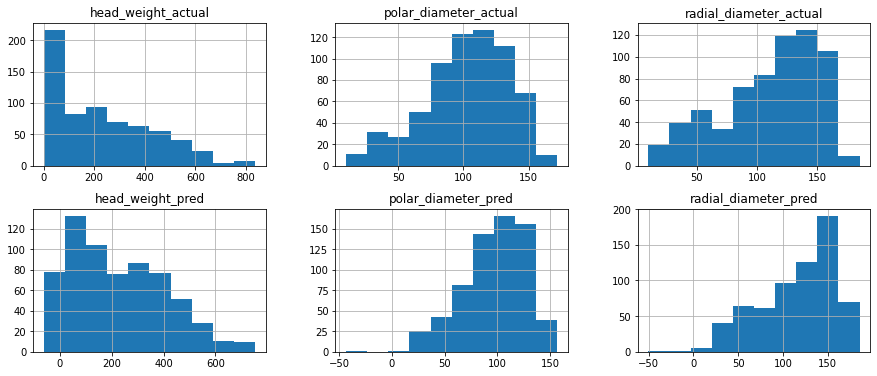

In [ ]:
head_weight_actual = []
polar_diameter_actual = []
radial_diameter_actual = []
head_weight_pred = []
polar_diameter_pred = []
radial_diameter_pred = []

for i in range(len(y_test)):
  head_weight_actual.append(y_test[i][0])
  polar_diameter_actual.append(y_test[i][1])
  radial_diameter_actual.append(y_test[i][2])
  head_weight_pred.append(y_pred_poly_lr[i][0])
  polar_diameter_pred.append(y_pred_poly_lr[i][1])
  radial_diameter_pred.append(y_pred_poly_lr[i][2])


mlr_diff_df_poly = pd.DataFrame({'head_weight_actual':head_weight_actual,
                            'polar_diameter_actual':polar_diameter_actual,
                            'radial_diameter_actual':radial_diameter_actual,
                            'head_weight_pred':head_weight_pred,
                            'polar_diameter_pred':polar_diameter_pred,
                            'radial_diameter_pred':radial_diameter_pred})
display(mlr_diff_df_poly)
mlr_diff_df_poly.hist(figsize=(15,30),layout=(9,3))

use feature to predict

In [ ]:
print(y_test[50])
print(y_pred_mlr[50])
list_predict_poly = [244,111,103,1,5,6,7,8,9,10,2,23,4,6,9,5,4,2,4,7,8,6,2,4]
poly_data_predict = pd.Series(list_predict_poly).to_numpy().reshape(-1, 1).T
linear_poly_model.predict(poly.fit_transform(poly_data_predict))

[158. 110. 128.]
[163.23952293 101.32720947 129.96740723]


array([[-4.24299438e+18, -2.64170140e+18, -2.27223443e+18]])

score of polynomial

In [ ]:
scores = cross_val_score(linear_poly_model, X_train_poly, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
scores

scores: .0.947151 +/- .0.003604


array([0.94898849, 0.94302577, 0.94817271, 0.95594004, 0.94401585,
       0.94868362, 0.94637867, 0.94682536, 0.94291104, 0.94656369])

metric

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly_lr)))
print('R-squared:',r2_score(y_test, y_pred_poly_lr))

Mean Absolute Error: 16.88288662247845
Mean Squared Error: 756.6857843390168
Root Mean Squared Error: 27.507922210501775
R-squared: 0.9158701156433836


compare 1 value

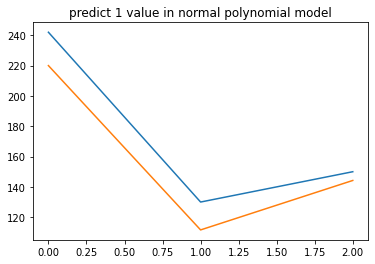

In [ ]:
sns.lineplot(data=y_test[0]).set(title='predict 1 value in normal polynomial model')
sns.lineplot(data=y_pred_poly_lr[0])

compare 10 value

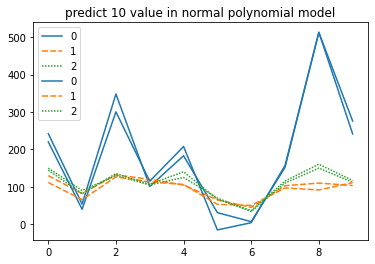

In [ ]:
sns.lineplot(data=y_test[:10]).set(title='predict 10 value in normal polynomial model')
sns.lineplot(data=y_pred_poly_lr[:10])

visualize actual and predict with boxplot

[Text(0.5, 1.0, 'normal polynomial model')]

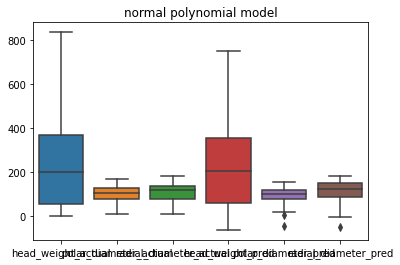

In [ ]:
sns.boxplot(data=mlr_diff_df_poly).set(title='normal polynomial model')

visualize actual and predict with barplot

[Text(0.5, 1.0, 'evaluation polynomial model')]

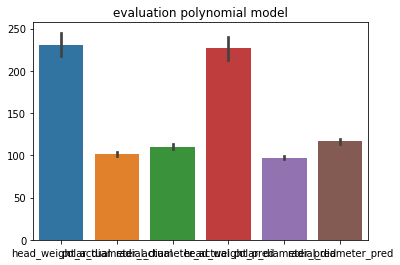

In [ ]:
sns.barplot(data=mlr_diff_df_poly).set(title='evaluation polynomial model')

### EVALUATION: polynomial regression

evaluation polynomial regression

In [ ]:
poly_eva = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)

X_train_poly = poly_eva.fit_transform(X_train_scalar)
X_test_poly = poly_eva.fit_transform(X_test_scalar)

linear_poly_model_eva = linear_model.LinearRegression()
linear_poly_model_eva.fit(X_train_poly, y_train)




fit_intercept = [True,False]
normalize = [True,False]
copy_X = [True,False]
n_jobs = [-10,-1,None,0,1,3]
positive = [True,False]




param_grid = { 
    'fit_intercept': fit_intercept,
    'normalize': normalize,
    'copy_X' : copy_X,
    'n_jobs' : n_jobs,
    'positive' : positive
}


CV_polynomial = GridSearchCV(estimator=linear_poly_model_eva, param_grid=param_grid, cv= 5)
CV_polynomial.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-10, -1, None, 0, 1, 3],
                         'normalize': [True, False],
                         'positive': [True, False]})

best parameter

In [ ]:
CV_polynomial.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -10,
 'normalize': False,
 'positive': False}

use the best model

In [ ]:
best_polynomial_regression = LinearRegression(copy_X = True,
 fit_intercept = True,
 n_jobs = -10,
 normalize = False,
 positive = False
)


best_polynomial_regression.fit(X_train_poly, y_train)

LinearRegression(n_jobs=-10, normalize=False)

In [ ]:
#Prediction of test set
y_pred_best_poly= best_polynomial_regression.predict(X_test_poly)
#Predicted values
print("Prediction for test set: {}".format(y_pred_best_poly))

Prediction for test set: [[222.734375   112.10546875 144.91601562]
 [ 48.390625    67.44921875  83.49023438]
 [296.296875   126.28515625 135.15820312]
 ...
 [ 19.078125    86.61328125  49.01367188]
 [ 24.4453125   96.20507812  71.97265625]
 [414.796875   125.30859375 151.10351562]]


vitualize actual and predict with data frame and histogram

,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,222.734375,112.105469,144.916016
1,54.0,82.0,90.0,48.390625,67.449219,83.490234
2,348.0,132.0,130.0,296.296875,126.285156,135.158203
3,101.0,120.0,105.0,114.546875,113.871094,107.603516
4,183.0,105.0,125.0,203.859375,104.472656,138.439453
...,...,...,...,...,...,...
651,192.0,135.0,135.0,295.906250,127.371094,144.837891
652,38.0,60.0,60.0,83.968750,59.882812,66.298828
653,6.0,58.0,32.0,19.078125,86.613281,49.013672
654,41.0,100.0,75.0,24.445312,96.205078,71.972656


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3a96c6ed0>,
      dtype=object)

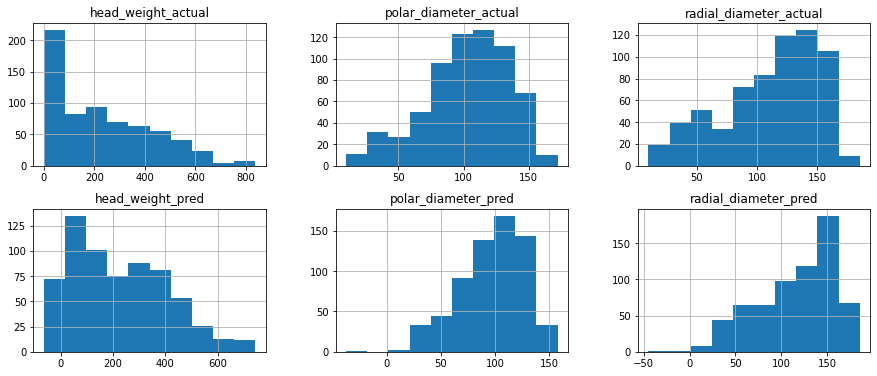

In [ ]:
head_weight_actual = []
polar_diameter_actual = []
radial_diameter_actual = []
head_weight_pred = []
polar_diameter_pred = []
radial_diameter_pred = []

for i in range(len(y_test)):
  head_weight_actual.append(y_test[i][0])
  polar_diameter_actual.append(y_test[i][1])
  radial_diameter_actual.append(y_test[i][2])
  head_weight_pred.append(y_pred_best_poly[i][0])
  polar_diameter_pred.append(y_pred_best_poly[i][1])
  radial_diameter_pred.append(y_pred_best_poly[i][2])


poly_best_diff_df = pd.DataFrame({'head_weight_actual':head_weight_actual,
                            'polar_diameter_actual':polar_diameter_actual,
                            'radial_diameter_actual':radial_diameter_actual,
                            'head_weight_pred':head_weight_pred,
                            'polar_diameter_pred':polar_diameter_pred,
                            'radial_diameter_pred':radial_diameter_pred})
display(poly_best_diff_df)
poly_best_diff_df.hist(figsize=(15,30),layout=(9,3))

predict score

In [ ]:
scores = cross_val_score(linear_poly_model, X_train_poly, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
scores

scores: .0.946575 +/- .0.003912


array([0.94838228, 0.942477  , 0.94837437, 0.95629812, 0.9438437 ,
       0.9478131 , 0.94621251, 0.94489973, 0.94185194, 0.9455948 ])

In [ ]:
# regresstion use this!!!!!!
# MSE, MAE, R-squared, Adjusted R-squared, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_best_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_best_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_poly)))
print('R-squared:',r2_score(y_test, y_pred_best_poly))

Mean Absolute Error: 17.12077548714775
Mean Squared Error: 778.58722312705
Root Mean Squared Error: 27.903175860949055
R-squared: 0.9149856854893467


compare 1 value actual and predict

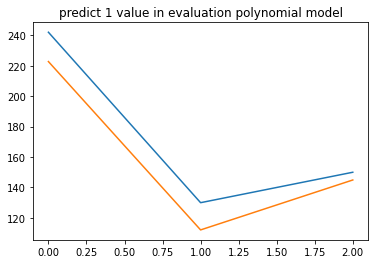

In [ ]:
sns.lineplot(data=y_test[0]).set(title='predict 1 value in evaluation polynomial model')
sns.lineplot(data=y_pred_best_poly[0])

compare 10 value actual and predict

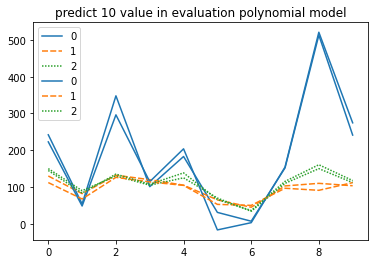

In [ ]:
sns.lineplot(data=y_test[0:10]).set(title='predict 10 value in evaluation polynomial model')
sns.lineplot(data=y_pred_best_poly[0:10])

compare actual and predict with boxplot

[Text(0.5, 1.0, 'evaluation polynomial model')]

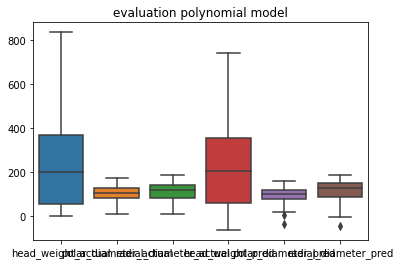

In [ ]:
sns.boxplot(data=poly_best_diff_df).set(title='evaluation polynomial model')

compare actual and predict with barplot

[Text(0.5, 1.0, 'evaluation polynomial model')]

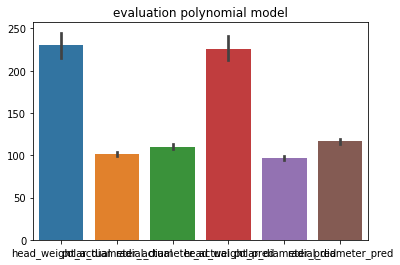

In [ ]:
sns.barplot(data=poly_best_diff_df).set(title='evaluation polynomial model')

## compare multiple model

see accuracy without the best parameter

Mean Absolute Error LinearRegression: 28.310442771299957
Mean Squared Error LinearRegression: 2199.58890536102
Root Mean Squared Error LinearRegression: 46.899775109919446
R-squared LinearRegression: 0.8130521732290399
Mean Absolute Error Ridge: 28.446690273347716
Mean Squared Error Ridge: 2276.7385772293524
Root Mean Squared Error Ridge: 47.71518183167022
R-squared Ridge: 0.8090479113725185
Mean Absolute Error Lasso: 32.307167455305695
Mean Squared Error Lasso: 2747.6936181671867
Root Mean Squared Error Lasso: 52.41844730786278
R-squared Lasso: 0.7203857531111787
Mean Absolute Error ElasticNet: 67.7907342471635
Mean Squared Error ElasticNet: 11293.508650000336
Root Mean Squared Error ElasticNet: 106.27092099911592
R-squared ElasticNet: 0.16037659226693457
Mean Absolute Error PLSRegression: 41.794551104208814
Mean Squared Error PLSRegression: 4748.8525268005815
Root Mean Squared Error PLSRegression: 68.91191861209919
R-squared PLSRegression: 0.6425150434292713
Mean Absolute Error Decis

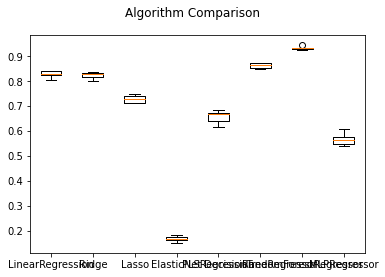

,name_model,mean_model,std_model
0,LinearRegression,0.826485,0.013707
1,Ridge,0.821893,0.013333
2,Lasso,0.726722,0.014856
3,ElasticNet,0.167695,0.010534
4,PLSRegression,0.655551,0.024405
5,DecisionTreeRegressor,0.862159,0.010381
6,RandomForestRegressor,0.931733,0.006886
7,MLPRegressor,0.565917,0.024301


In [ ]:



# prepare models
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('PLSRegression', PLSRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('MLPRegressor', MLPRegressor()))
all_name_model = []
all_mean_model = []
all_std_model = []
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	
	cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train)
	model.fit(X_train_scalar, y_train)
#  
	y_pred_model =model.predict(X_test_scalar)
	results.append(cv_results)
#  
	names.append(name)
	# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	all_name_model.append(name)
	all_mean_model.append(cv_results.mean())
	all_std_model.append(cv_results.std())
	print(f'Mean Absolute Error {name}:', metrics.mean_absolute_error(y_test, y_pred_model))
	print(f'Mean Squared Error {name}:', metrics.mean_squared_error(y_test, y_pred_model))
	print(f'Root Mean Squared Error {name}:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
	print(f'R-squared {name}:',r2_score(y_test, y_pred_model))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_model' : all_mean_model,
    'std_model' : all_std_model
})
display(df_origin_predict)

dictionary to find best parameter

In [ ]:


# models.append(('LinearRegression', LinearRegression()))
# models.append(('Ridge', Ridge()))
# models.append(('Lasso', Lasso()))
# models.append(('ElasticNet', ElasticNet()))
# models.append(('PLSRegression', PLSRegression()))
# models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
# models.append(('RandomForestRegressor', RandomForestRegressor()))

model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params' : {
            'copy_X': [True,False],
            'n_jobs': [-1,None,1,3],
            'fit_intercept': [True,False],
            'positive': [True,False]
        }  
    },
    'Ridge': {
        'model': Ridge(),
        'params' : {
            'alpha': [0.5,1,2,4],
            'fit_intercept': [True,False],
            'copy_X': [True,False],
            'max_iter': [True,False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
            'positive': [True,False]
        }
    },
    'Lasso' : {
        'model': Lasso(),
        'params': {
            'alpha': [0.5,1,2,4],
            'fit_intercept': [True,False],
            'precompute': [True,False],
            'copy_X': [True,False],
            'max_iter': [500,1000,2000,4000],
            'warm_start': [True,False],
            'positive': [True,False],
            'selection': ['cyclic','random']
        }
    },
        'ElasticNet' : {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.5,1,2,4],
            'l1_ratio': [0,0.5,1],
            'fit_intercept': [True,False],
            'precompute': [True,False],
            'max_iter': [500,1000,2000,4000],
            'copy_X': [True,False],
            'warm_start': [True,False],
            'positive': [True,False],
            'selection': ['cyclic','random']
        }
    },
        'PLSRegression' : {
        'model': PLSRegression(),
        'params': {
            'n_components': [1,2,4],
            'scale': [True,False],
            'max_iter': [500,1000,2000,4000],
            'copy': [True,False]
        }
    },
        'DecisionTreeRegressor' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'splitter': ['best','random'],
            'max_depth': [3,5,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,4],
            'max_features': ["auto", "sqrt", "log2"],
            # 'min_impurity_decrease': [0,1],
            # 'ccp_alpha': [0,1]
        }
    },
        'RandomForestRegressor' : {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100,400,700,1000],
            # 'criterion': ["squared_error", "absolute_error", "poisson"],
            # 'max_depth': [3,5,None],
            # 'min_samples_split': [2,5,10],
            # 'min_samples_leaf': [1,2,4],
            # 'min_weight_fraction_leaf': [0,1],
            # 'max_features': ["auto", "sqrt", "log2"],
            # 'min_impurity_decrease': [0,1],
            # 'bootstrap': [True,False],
            # 'oob_score': [True,False],
            # 'n_jobs': [-1,1],
            # 'verbose': [0,1],
            # 'warm_start': [True,False],
            # 'ccp_alpha': [0,1],
            # 'max_samples': [0,1]
        }
    },
        'MLPRegressor' : {
        'model': MLPRegressor(),
        'params': {
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'power_t': [0.1,0.5,0.8],
            'max_iter': [200,800,1600],
            'shuffle': [True,False],
            'verbose': [True,False],
            'warm_start': [True,False],
            'nesterovs_momentum': [True,False],
            'early_stopping': [True,False],
            'validation_fraction': [0.1,0.5,0.8]
        }
    },
}


use dictionary to find best parameter and best score

In [ ]:
scores = []

for model_name, mp in model_params.items():
    print(mp['model'], mp['params'])
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train_scalar, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    # print(clf)
df_grid_search_cv = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid_search_cv

LinearRegression() {'copy_X': [True, False], 'n_jobs': [-1, None, 1, 3], 'fit_intercept': [True, False], 'positive': [True, False]}
Ridge() {'alpha': [0.5, 1, 2, 4], 'fit_intercept': [True, False], 'copy_X': [True, False], 'max_iter': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 'positive': [True, False]}
Lasso() {'alpha': [0.5, 1, 2, 4], 'fit_intercept': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'max_iter': [500, 1000, 2000, 4000], 'warm_start': [True, False], 'positive': [True, False], 'selection': ['cyclic', 'random']}
ElasticNet() {'alpha': [0.5, 1, 2, 4], 'l1_ratio': [0, 0.5, 1], 'fit_intercept': [True, False], 'precompute': [True, False], 'max_iter': [500, 1000, 2000, 4000], 'copy_X': [True, False], 'warm_start': [True, False], 'positive': [True, False], 'selection': ['cyclic', 'random']}
PLSRegression() {'n_components': [1, 2, 4], 'scale': [True, False], 'max_iter': [500, 1000, 2000, 4000], 'copy': 

,model,best_score,best_params
0,LinearRegression,0.826485,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,Ridge,0.824303,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'..."
2,Lasso,0.764180,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'..."
3,ElasticNet,0.764176,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'..."
4,PLSRegression,0.743568,"{'copy': True, 'max_iter': 500, 'n_components'..."
5,DecisionTreeRegressor,0.888088,"{'criterion': 'squared_error', 'max_depth': No..."
6,RandomForestRegressor,0.932038,{'n_estimators': 1000}
7,MLPRegressor,0.896049,"{'activation': 'tanh', 'max_iter': 1600}"


-show accuracy for each model

-compare actual and predict in barplot, histogram, boxplot, dataframe for each model

-display coefficients model in all feature for each model; 

-forward selection in each model

-metric Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared for each model

-show all algorithm comparison with bar plot and dataframe

#### EVALUATION: multiple model

accuracy LinearRegression_evaluate: 0.826485 +/- (0.013707)


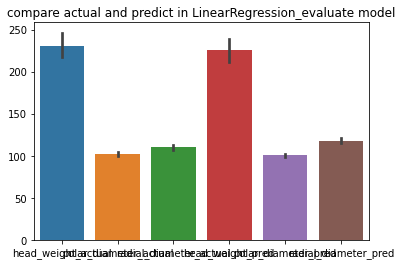

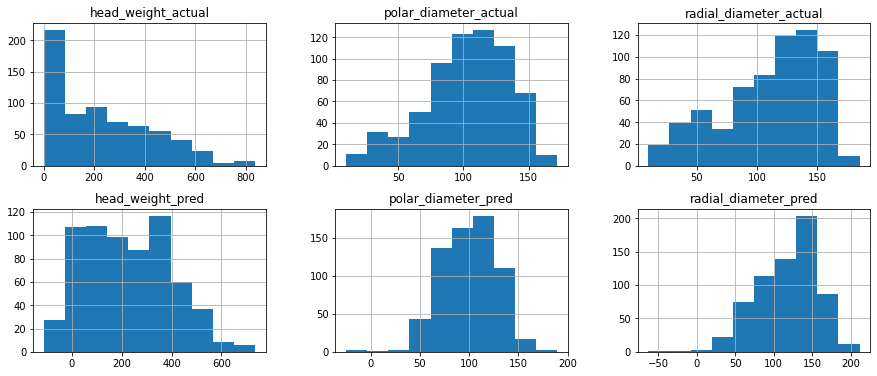

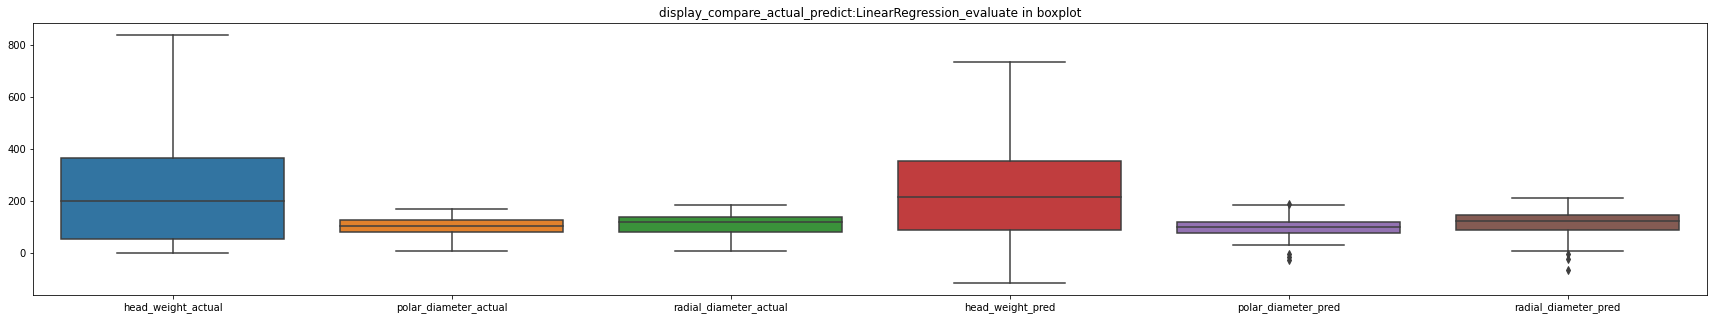

display_compare_actual_predict:LinearRegression_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,205.374660,106.781677,135.853760
1,54.0,82.0,90.0,-49.092828,56.592651,75.960144
2,348.0,132.0,130.0,312.409989,116.983459,126.517639
3,101.0,120.0,105.0,172.114002,106.344666,104.206299
4,183.0,105.0,125.0,266.550201,106.544739,140.050110
...,...,...,...,...,...,...
651,192.0,135.0,135.0,123.437531,96.944519,107.726318
652,38.0,60.0,60.0,16.453770,62.800476,73.527405
653,6.0,58.0,32.0,85.731020,89.640198,48.716736
654,41.0,100.0,75.0,28.775231,90.961243,69.521484


Intercept_LinearRegression_evaluate: [-8.24369640e+09 -3.70363179e+11 -4.29354174e+11]
Coefficients_LinearRegression_evaluate: [[ 7.54615281e+10  9.30905930e+02  5.27763580e+00  2.10502748e+01
   4.00710662e+02 -1.36416713e+02 -6.62579257e+02 -8.43393544e+10
   2.14450141e+00  1.96332084e+02  7.36963487e+01 -3.01805906e+01
   2.87873274e+01 -3.32091103e+01  6.46354475e+01  8.95353997e+00
   1.22955587e+01  6.48907607e+02  2.43384616e+02  9.33240032e+01
  -7.10422245e+02 -9.04162960e+01 -4.72980565e+02  2.66334804e+10]
 [ 3.39024756e+12  1.59804688e+02 -2.23206794e+01  1.25733382e+01
  -1.12428080e+02 -3.45423399e+01 -9.64474147e+01 -3.78910022e+12
   7.79670443e+00  3.73829231e+01  1.80853094e+01 -1.18091716e+01
   3.03429493e+00  1.94643292e+00  5.98778894e+00  3.66348035e+00
   5.93935806e+01  6.16099243e+01  9.16333008e+00  4.01639099e+01
  -8.68062744e+01 -6.14293213e+01 -7.17975082e+01  1.19655796e+12]
 [ 3.93024205e+12  1.66357666e+02  9.64917889e+01  1.33371189e+01
  -9.06602753

,head_weight,polar_diameter,radial_diameter
plant_date,7.546153e+10,3.390248e+12,3.930242e+12
fresh_weight,9.309059e+02,1.598047e+02,1.663577e+02
diameter_ratio,5.277636e+00,-2.232068e+01,9.649179e+01
leaves,2.105027e+01,1.257334e+01,1.333712e+01
density,4.007107e+02,-1.124281e+02,-9.066028e+01
leaf_area,-1.364167e+02,-3.454234e+01,-3.574701e+01
check_date,-6.625793e+02,-9.644741e+01,-1.254986e+02
flight_date,-8.433935e+10,-3.789100e+12,-4.392623e+12
volume_planted,2.144501e+00,7.796704e+00,7.995537e+00
planting_wk,1.963321e+02,3.738292e+01,3.706238e+01


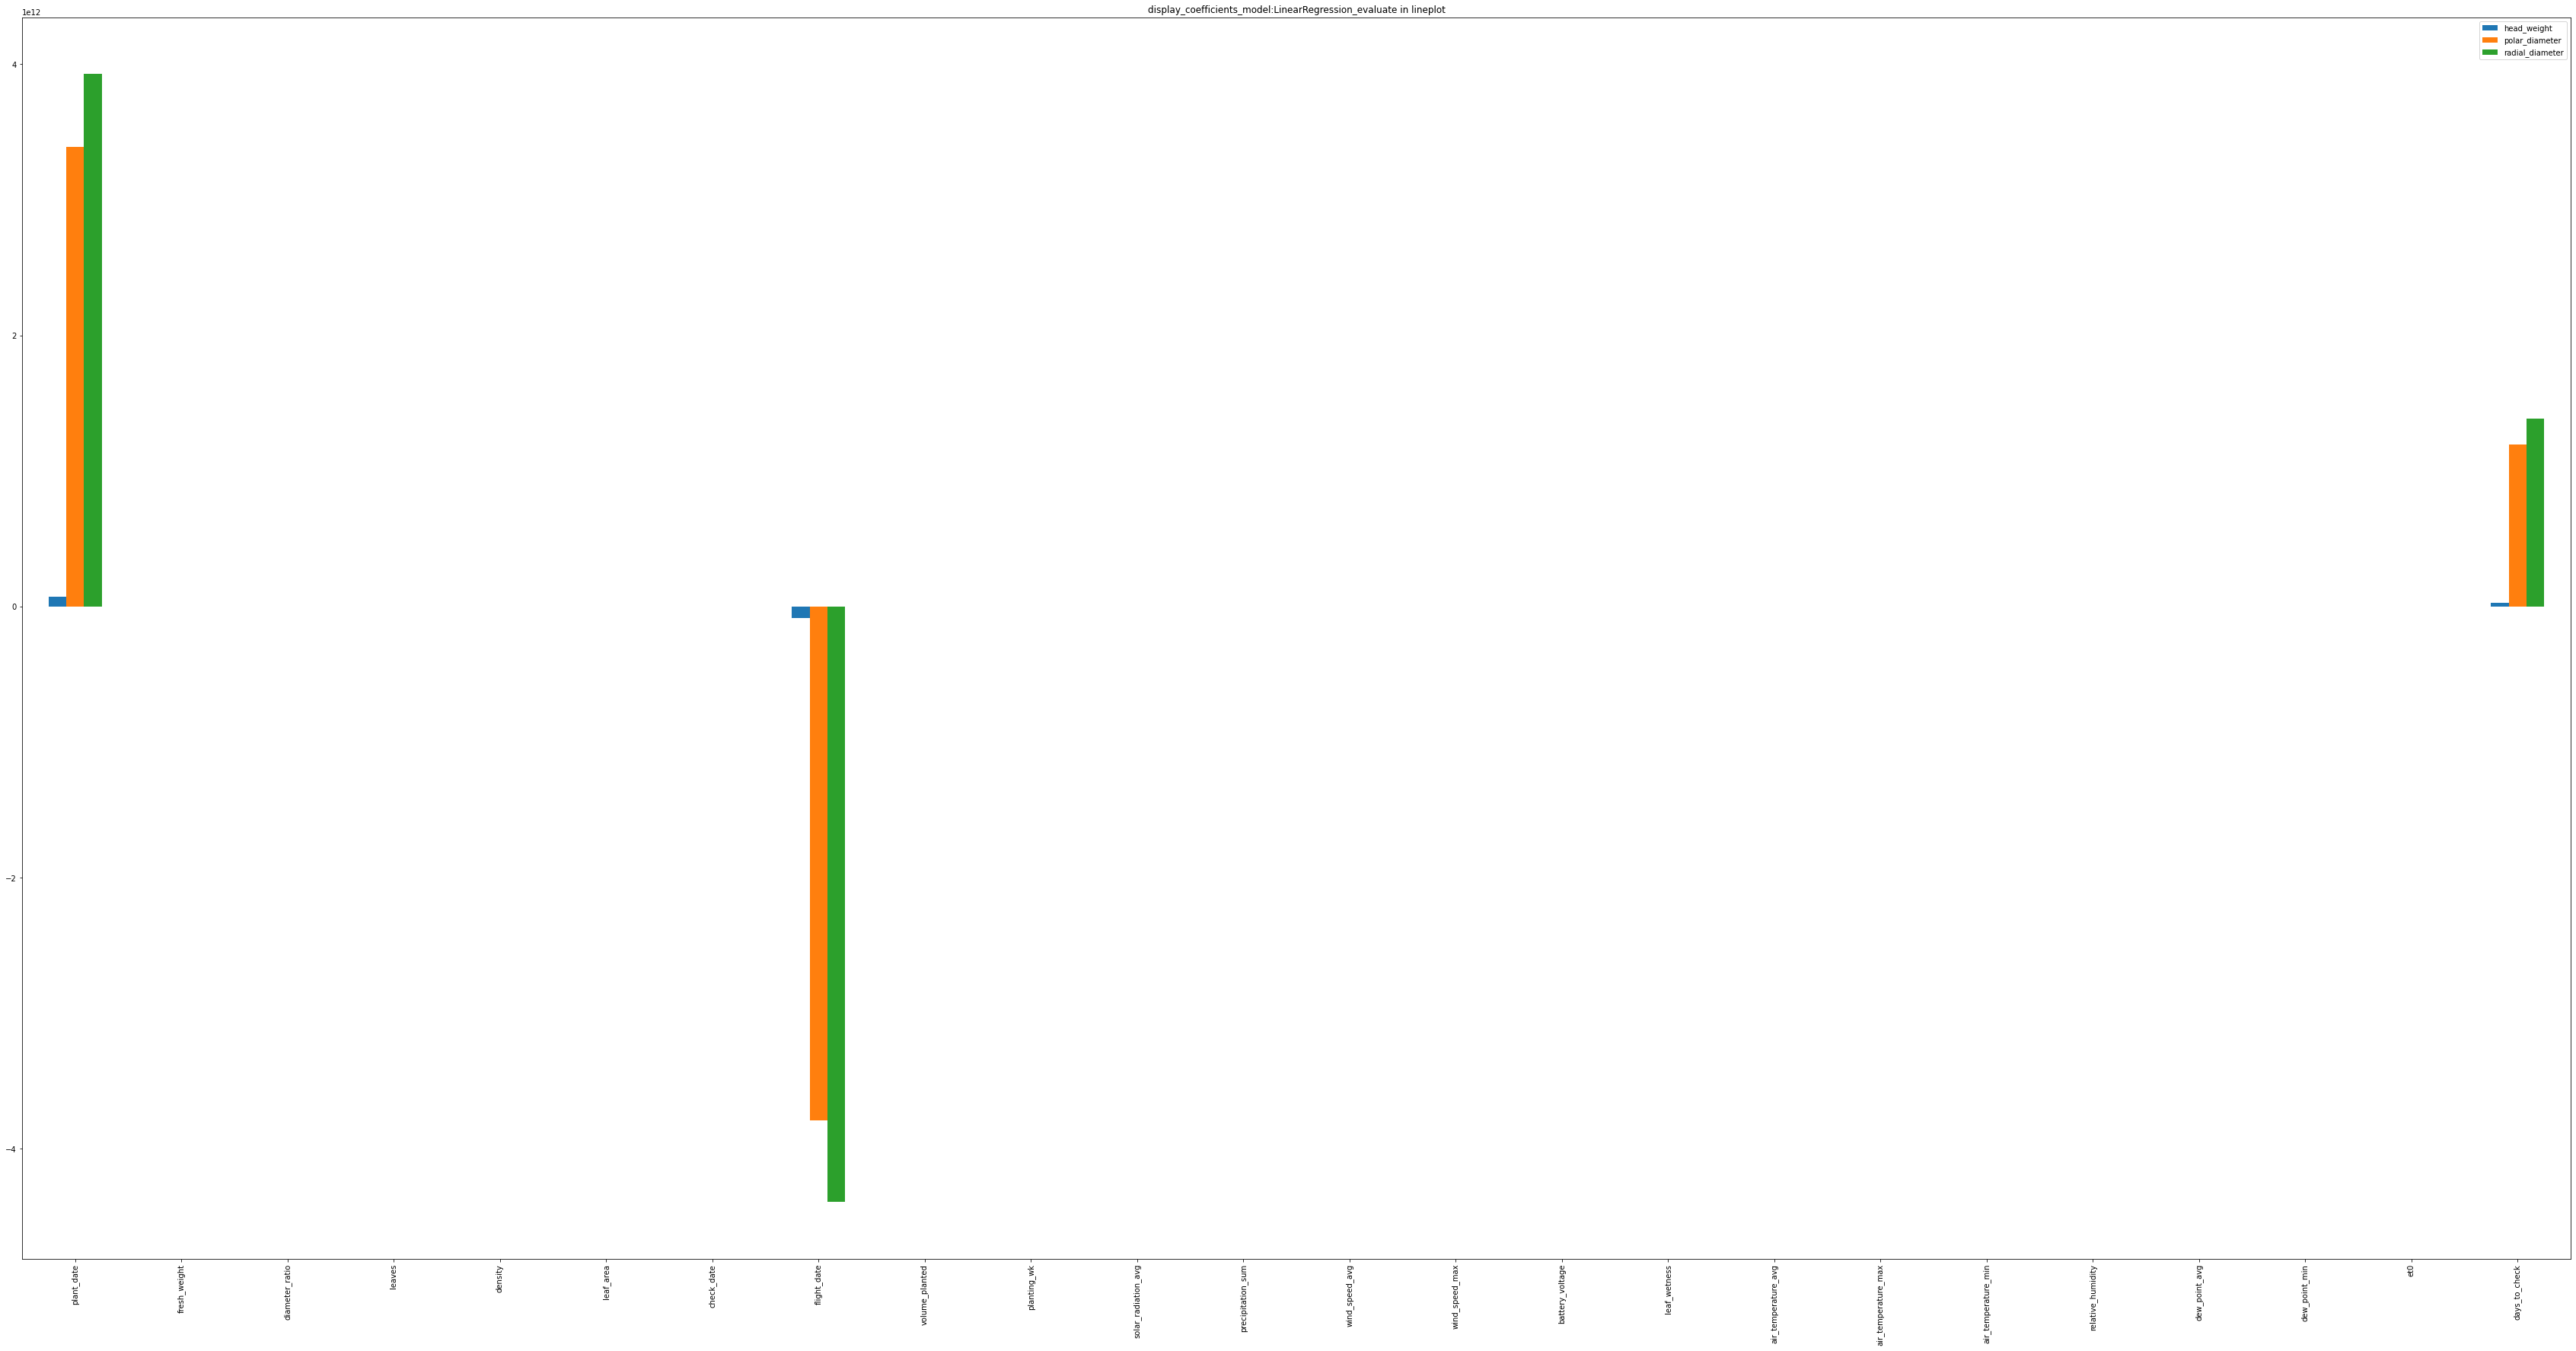

Forward selection in LinearRegression_evaluate


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619993],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441058718],0.719125,"(1, 18)"
3,"(1, 4, 18)",[0.754328321203865],0.754328,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7785655197084522],0.778566,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.7974379457068231],0.797438,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.8069479661884499],0.806948,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 11, 18)",[0.8093986101166727],0.809399,"(1, 2, 4, 5, 7, 11, 18)"
8,"(1, 2, 4, 5, 7, 11, 18, 22)",[0.8116853736565464],0.811685,"(1, 2, 4, 5, 7, 11, 18, 22)"
9,"(1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8143421840407209],0.814342,"(1, 2, 4, 5, 6, 7, 11, 18, 22)"
10,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8176068398827967],0.817607,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)"


Mean Absolute Error LinearRegression_evaluate: 28.310442771299957
Mean Squared Error LinearRegression_evaluate: 2199.58890536102
Root Mean Squared Error LinearRegression_evaluate: 46.899775109919446
R-squared LinearRegression_evaluate: 0.8130521732290399
model_score LinearRegression_evaluate: 1.0
accuracy Ridge_evaluate: 0.824303 +/- (0.013263)


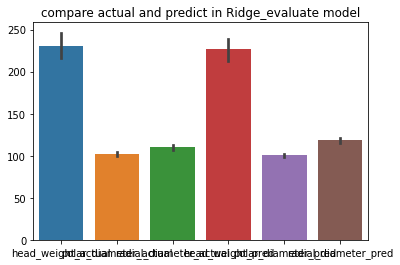

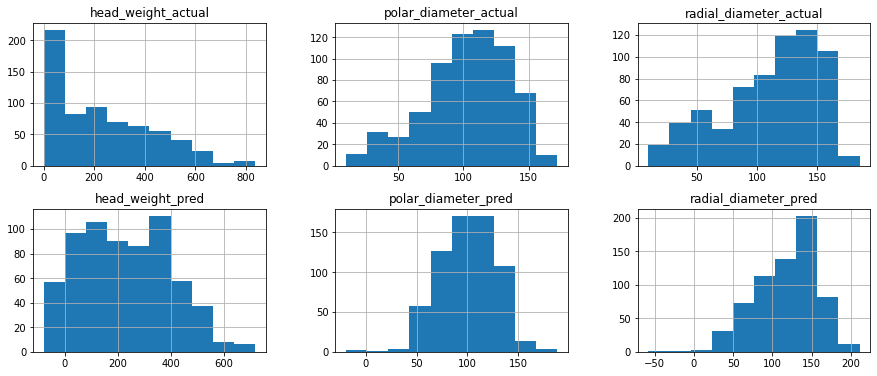

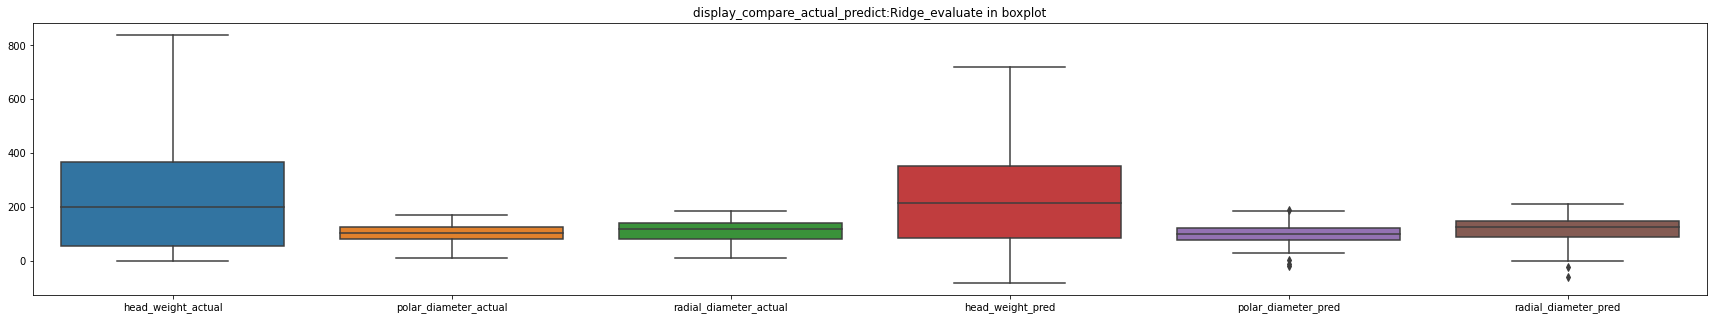

display_compare_actual_predict:Ridge_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,203.643867,106.333954,134.747188
1,54.0,82.0,90.0,-31.902310,60.623683,80.605381
2,348.0,132.0,130.0,318.750354,117.852198,127.335319
3,101.0,120.0,105.0,162.220559,104.461998,101.989653
4,183.0,105.0,125.0,263.425174,106.793550,139.744224
...,...,...,...,...,...,...
651,192.0,135.0,135.0,144.039020,101.190250,112.339472
652,38.0,60.0,60.0,29.847362,64.964904,75.352264
653,6.0,58.0,32.0,75.716671,87.975090,47.490189
654,41.0,100.0,75.0,42.146936,92.049603,71.269431


Intercept_Ridge_evaluate: [80.25154095 99.75958654 39.48719239]
Coefficients_Ridge_evaluate: [[ 1.80842900e+02  8.77903596e+02  1.32299218e+01  5.95847257e-01
   3.87595313e+02 -1.24360058e+02 -4.51330667e+02  1.61871302e+02
  -8.09273962e+00  1.21600515e+02  1.68498337e+01 -1.03278178e+01
  -1.19537086e+01 -4.12127459e+01  3.34952493e+01  6.72593655e+00
  -8.64950995e+01  3.52240012e+02  6.39412474e+01 -1.63846864e+02
  -2.56408250e+02  2.19462978e+01 -3.33697975e+02  2.04237565e-01]
 [ 3.17069613e+01  1.51329057e+02 -1.98165635e+01  6.10616088e+00
  -1.07239835e+02 -3.22800145e+01 -6.70487872e+01  2.76019929e+01
   6.26339455e+00  2.26787738e+01  9.02263940e+00 -5.76889667e+00
  -4.02878573e+00 -1.69727177e+00  5.33855332e+00  3.93801411e+00
   6.07780836e+00  2.98988863e+01 -8.07306667e+00 -1.55551649e+01
  -1.05409373e+01 -2.95049353e+01 -4.97397792e+01 -2.43007958e+00]
 [ 3.86211976e+01  1.56980457e+02  9.64871170e+01  7.24768958e+00
  -8.73379175e+01 -3.31080562e+01 -8.66813164e+

,head_weight,polar_diameter,radial_diameter
plant_date,180.842900,31.706961,38.621198
fresh_weight,877.903596,151.329057,156.980457
diameter_ratio,13.229922,-19.816564,96.487117
leaves,0.595847,6.106161,7.247690
density,387.595313,-107.239835,-87.337918
leaf_area,-124.360058,-32.280014,-33.108056
check_date,-451.330667,-67.048787,-86.681316
flight_date,161.871302,27.601993,34.541242
volume_planted,-8.092740,6.263395,6.161480
planting_wk,121.600515,22.678774,26.258849


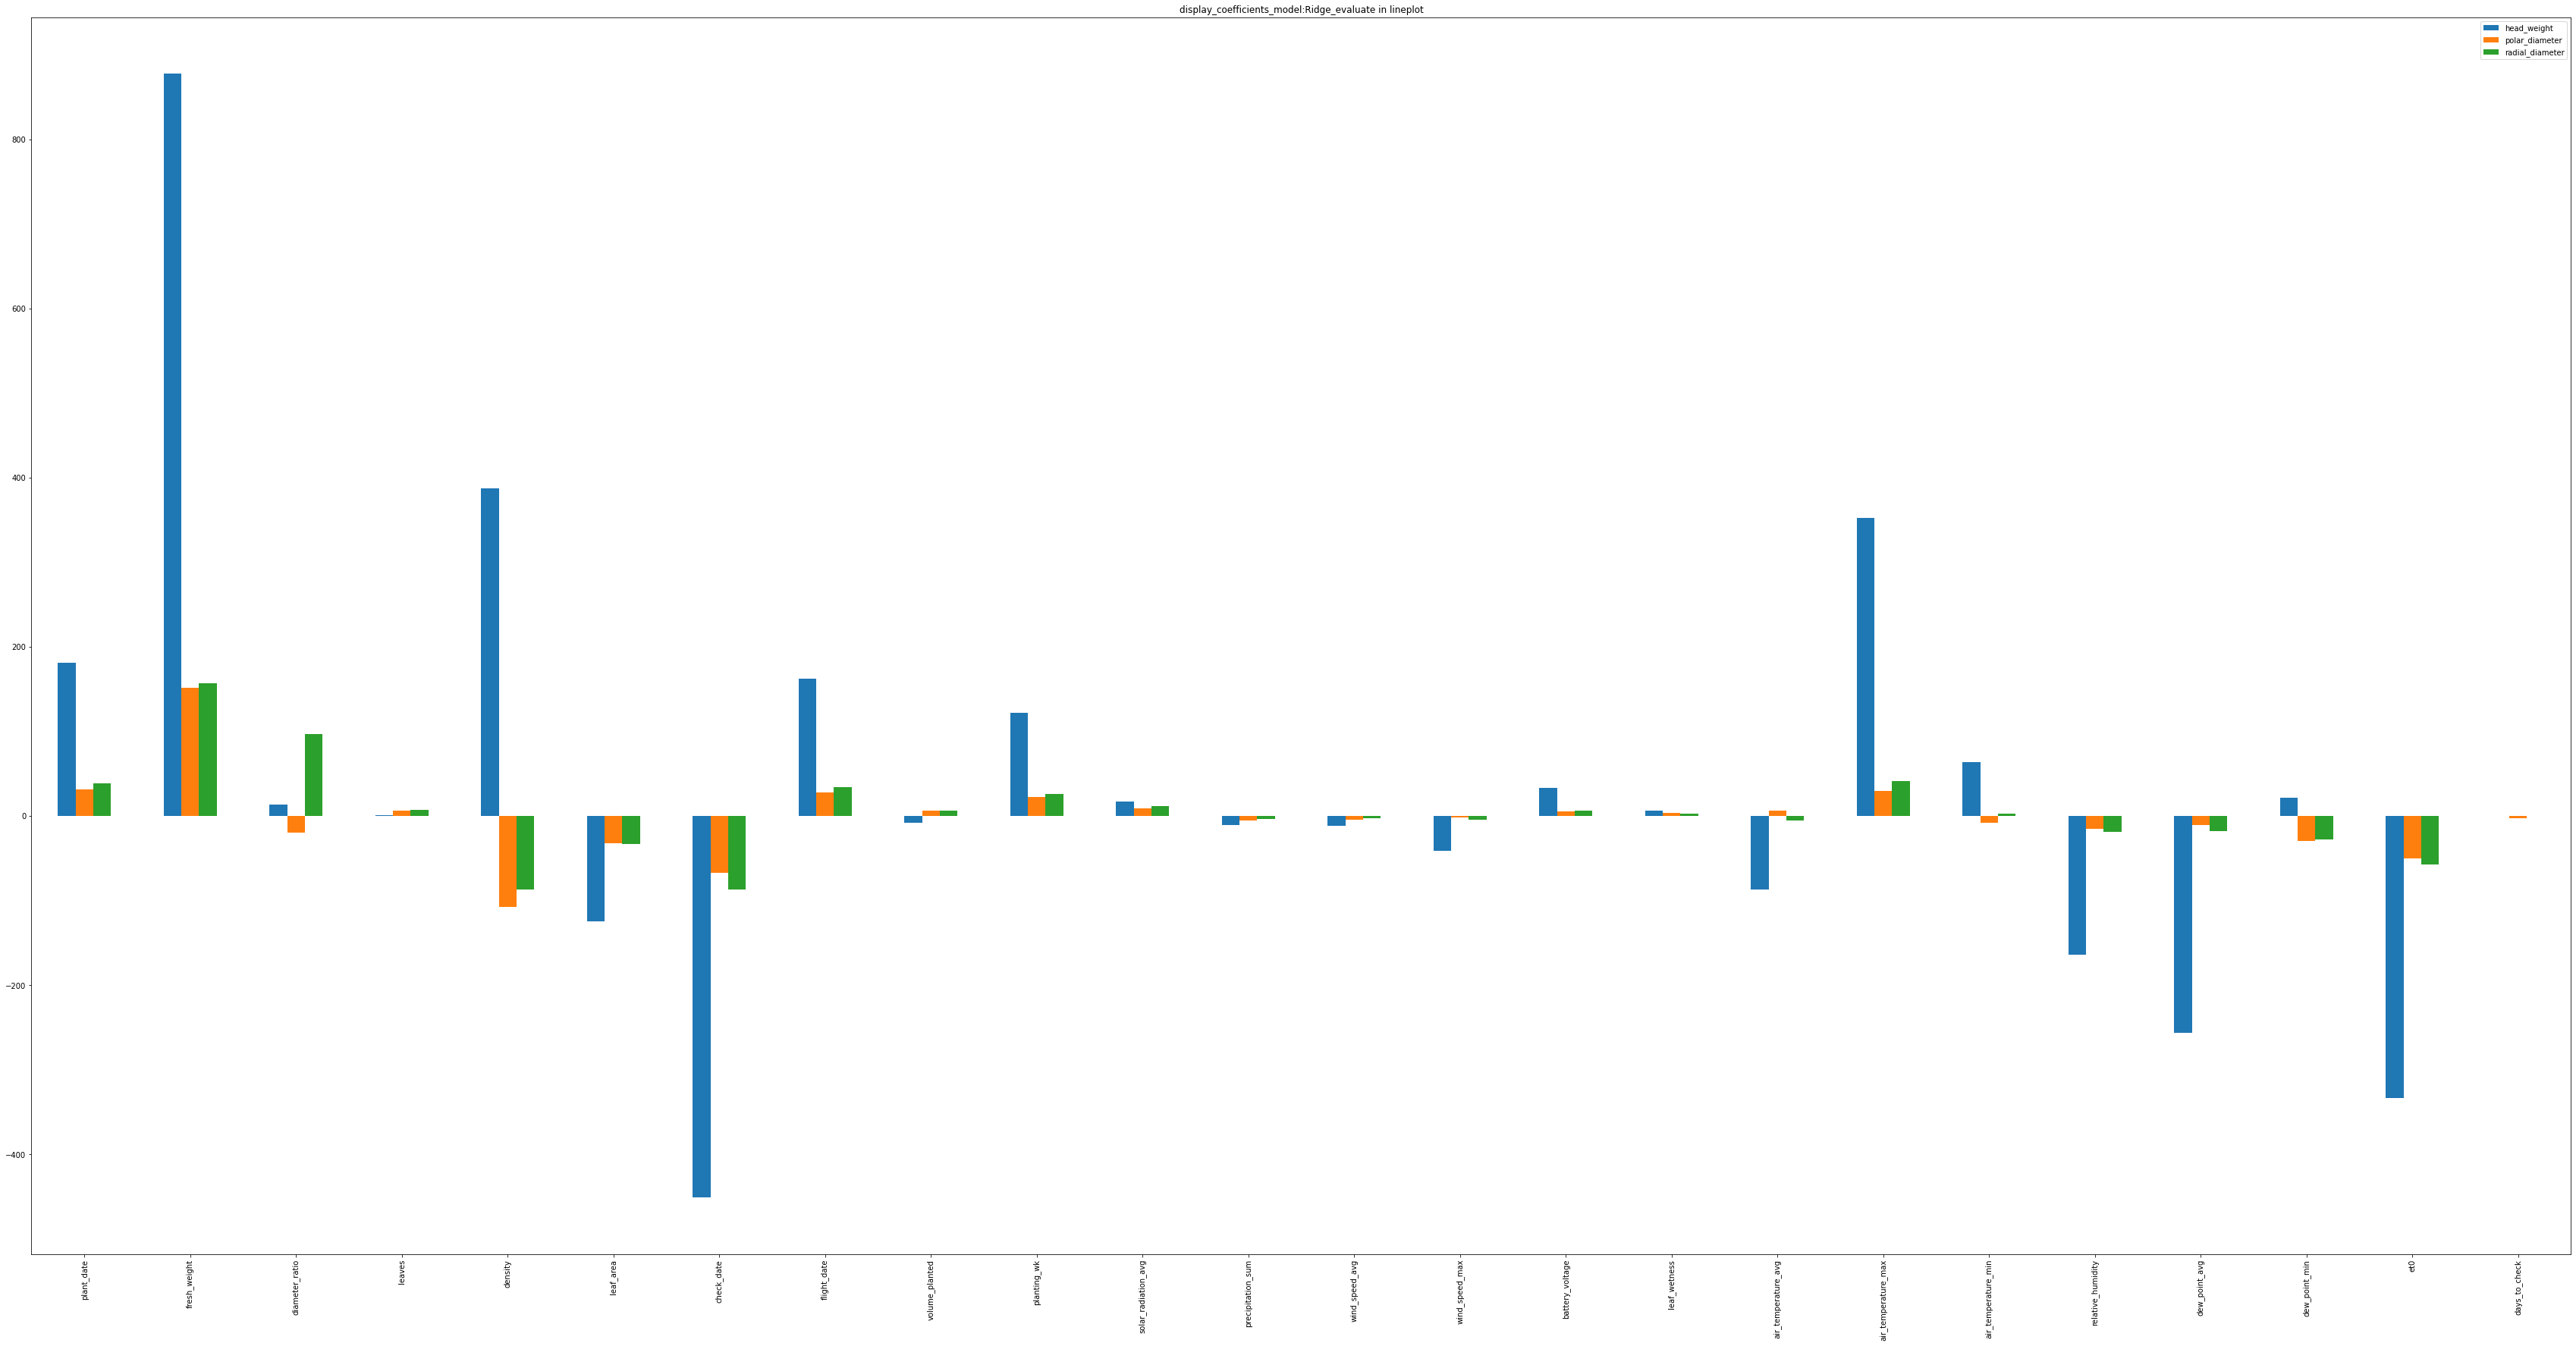

Forward selection in Ridge_evaluate


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619992],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441024192],0.719125,"(1, 18)"
3,"(1, 7, 18)",[0.7404766738654249],0.740477,"(1, 7, 18)"
4,"(1, 5, 7, 18)",[0.749542126312628],0.749542,"(1, 5, 7, 18)"
5,"(1, 5, 6, 7, 18)",[0.7538454788291448],0.753845,"(1, 5, 6, 7, 18)"
6,"(1, 5, 6, 7, 18, 23)",[0.7576918687758508],0.757692,"(1, 5, 6, 7, 18, 23)"
7,"(1, 5, 6, 7, 18, 19, 23)",[0.7598810066868708],0.759881,"(1, 5, 6, 7, 18, 19, 23)"
8,"(1, 5, 6, 7, 13, 18, 19, 23)",[0.7610975187077859],0.761098,"(1, 5, 6, 7, 13, 18, 19, 23)"
9,"(1, 5, 6, 7, 10, 13, 18, 19, 23)",[0.7641354611627195],0.764135,"(1, 5, 6, 7, 10, 13, 18, 19, 23)"
10,"(1, 5, 6, 7, 10, 13, 18, 19, 21, 23)",[0.7691535224887783],0.769154,"(1, 5, 6, 7, 10, 13, 18, 19, 21, 23)"


Mean Absolute Error Ridge_evaluate: 28.299199692883548
Mean Squared Error Ridge_evaluate: 2238.253816938343
Root Mean Squared Error Ridge_evaluate: 47.31018724268953
R-squared Ridge_evaluate: 0.8108598756941516
model_score Ridge_evaluate: 1.0
accuracy Lasso_evaluate: 0.764145 +/- (0.016613)


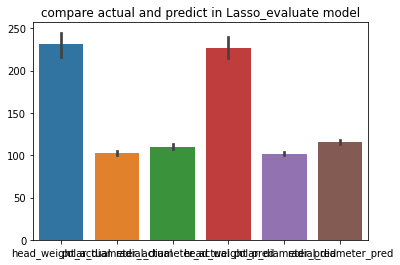

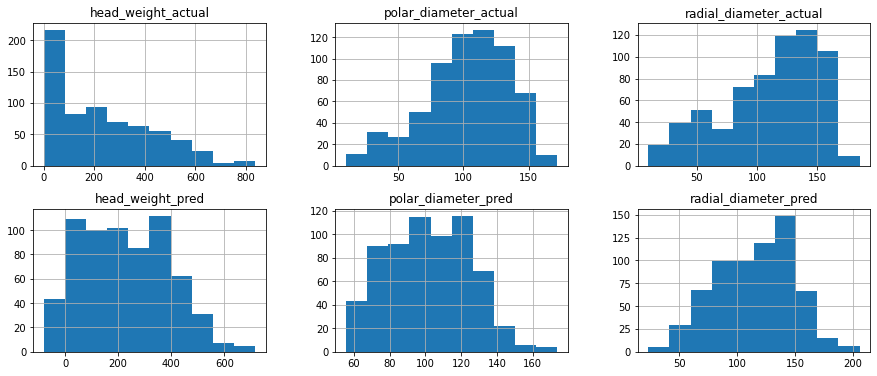

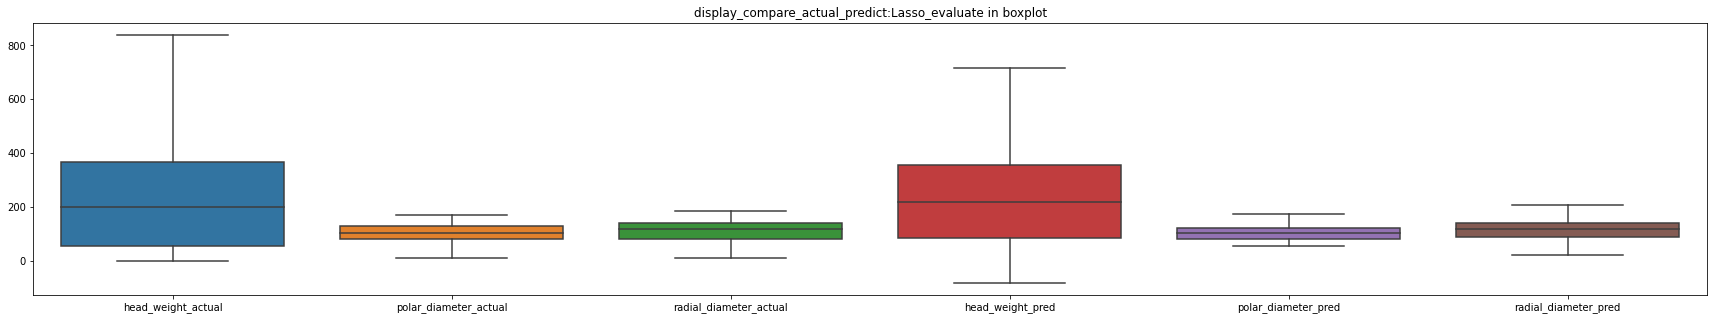

display_compare_actual_predict:Lasso_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,201.165400,101.996929,122.086464
1,54.0,82.0,90.0,13.194854,70.110808,83.160596
2,348.0,132.0,130.0,334.468723,118.316309,128.885927
3,101.0,120.0,105.0,152.963987,96.544398,97.515926
4,183.0,105.0,125.0,231.378122,100.688244,122.076052
...,...,...,...,...,...,...
651,192.0,135.0,135.0,196.565623,102.718662,110.725530
652,38.0,60.0,60.0,49.673859,80.070059,85.051343
653,6.0,58.0,32.0,75.478948,81.137007,58.761391
654,41.0,100.0,75.0,79.253209,90.793132,79.064444


Intercept_Lasso_evaluate: [80.38698532 74.36390902 40.1968581 ]
Coefficients_Lasso_evaluate: [[ 0.00000000e+00  7.81624109e+02  0.00000000e+00 -0.00000000e+00
   3.16208503e+02 -6.66589209e+01  0.00000000e+00  3.07853807e+01
  -9.37130673e+00  0.00000000e+00 -7.32424186e+01 -3.20909104e+01
  -0.00000000e+00 -8.02480668e+01 -0.00000000e+00 -8.50479301e+00
  -0.00000000e+00  1.83835543e+00 -9.59513758e+01 -7.52420593e+01
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.06611340e+02 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.09221879e+01
   6.84418385e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -1.59137397e+00  0.00000000e+00  0.00000000e+00
  -6.30908140e+00 -3.36485484e+00 -2.11128798e+01 -0.00000000e+00
  -0.00000000e+00 -1.93452800e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25036998e+02  6.74488082e+01 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+

,head_weight,polar_diameter,radial_diameter
plant_date,0.000000,0.000000,0.000000
fresh_weight,781.624109,106.611340,125.036998
diameter_ratio,0.000000,-0.000000,67.448808
leaves,-0.000000,-0.000000,-0.000000
density,316.208503,-0.000000,-0.000000
leaf_area,-66.658921,-0.000000,-0.000000
check_date,0.000000,0.000000,0.000000
flight_date,30.785381,10.922188,10.138990
volume_planted,-9.371307,0.684418,0.000000
planting_wk,0.000000,0.000000,0.000000


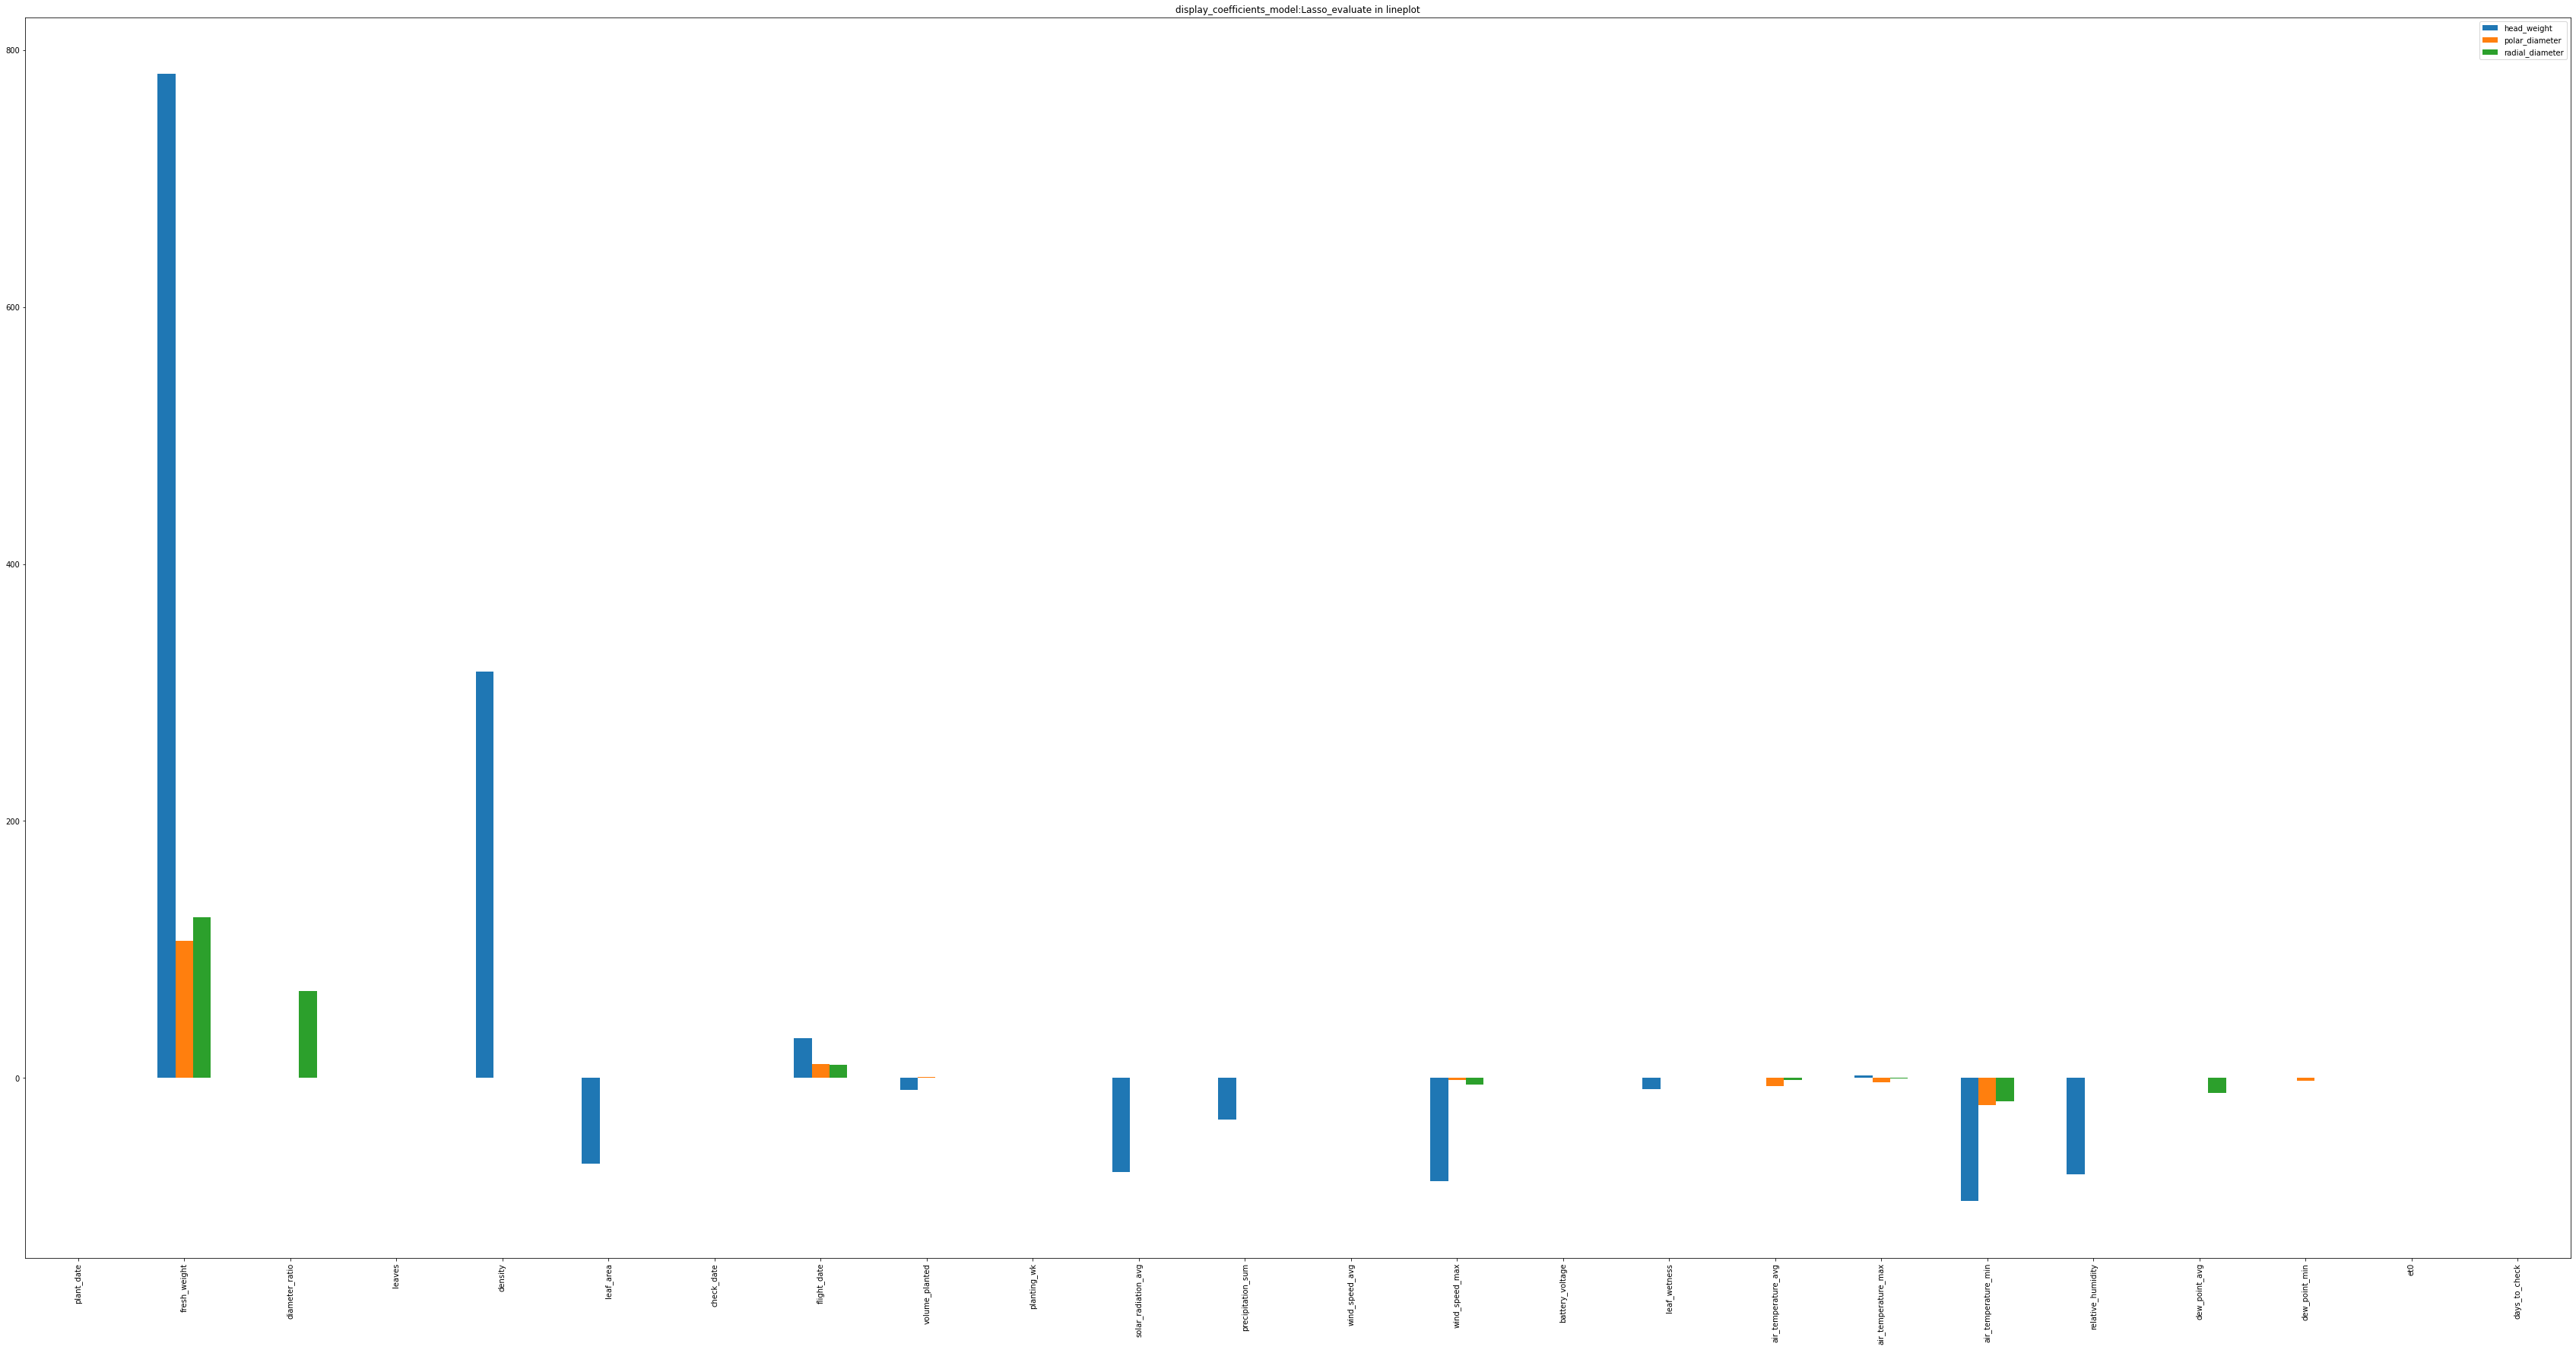

Forward selection in Lasso_evaluate


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260757274513],0.681726,"(1,)"
2,"(1, 18)",[0.7191168206343069],0.719117,"(1, 18)"
3,"(1, 4, 18)",[0.7466823744962982],0.746682,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7673598577414066],0.76736,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.7864007643432956],0.786401,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.7961331503016523],0.796133,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 11, 18)",[0.7982201024548498],0.79822,"(1, 2, 4, 5, 7, 11, 18)"
8,"(1, 2, 4, 5, 7, 11, 18, 22)",[0.8000364592212587],0.800036,"(1, 2, 4, 5, 7, 11, 18, 22)"
9,"(1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8025785949496121],0.802579,"(1, 2, 4, 5, 6, 7, 11, 18, 22)"
10,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)",[0.8060987500832733],0.806099,"(0, 1, 2, 4, 5, 6, 7, 11, 18, 22)"


Mean Absolute Error Lasso_evaluate: 30.37241748530516
Mean Squared Error Lasso_evaluate: 2555.565594782381
Root Mean Squared Error Lasso_evaluate: 50.552602255298204
R-squared Lasso_evaluate: 0.7582403745297421
model_score Lasso_evaluate: 1.0
accuracy ElasticNet_evaluate: 0.764156 +/- (0.016618)


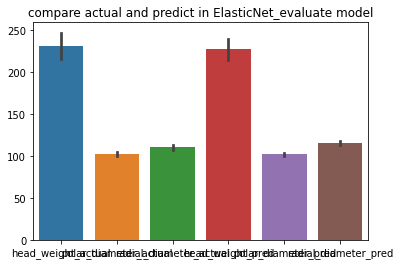

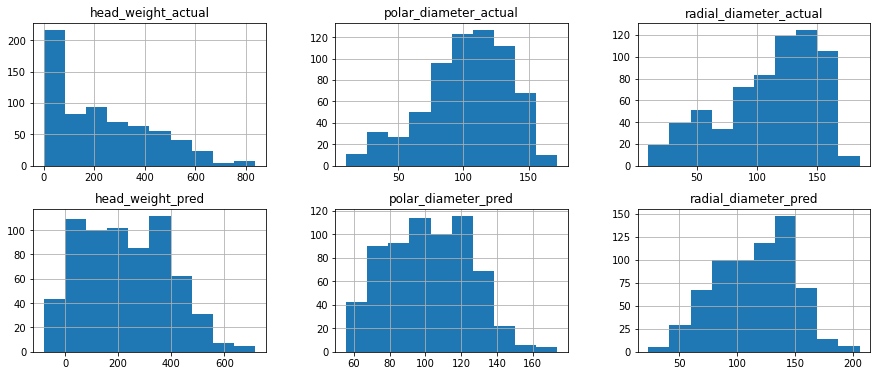

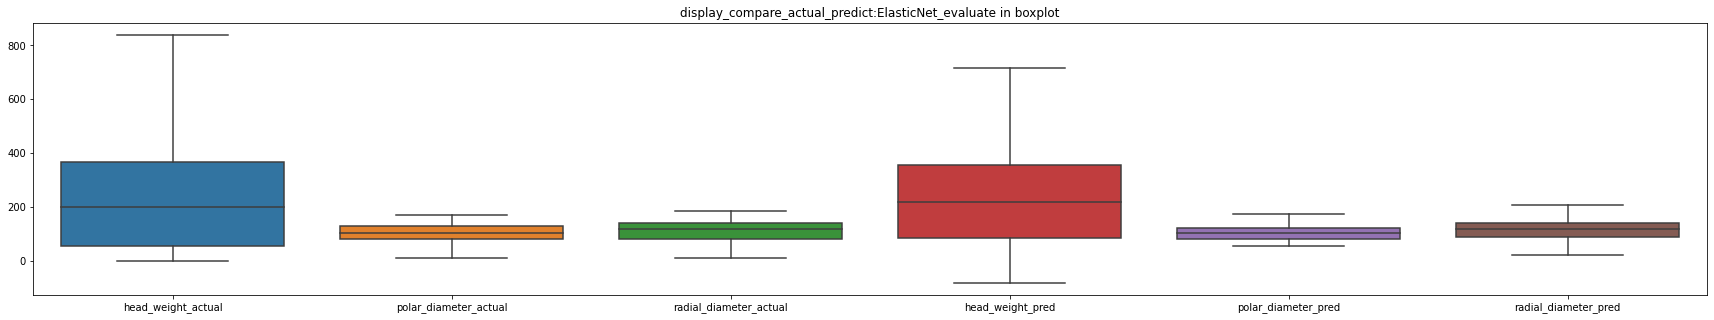

display_compare_actual_predict:ElasticNet_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,201.153207,101.990745,122.163010
1,54.0,82.0,90.0,13.175300,70.109238,83.202430
2,348.0,132.0,130.0,334.479279,118.322519,128.877949
3,101.0,120.0,105.0,152.951680,96.539000,97.566215
4,183.0,105.0,125.0,231.391336,100.681846,122.058400
...,...,...,...,...,...,...
651,192.0,135.0,135.0,196.539569,102.718188,111.011444
652,38.0,60.0,60.0,49.669544,80.075955,84.874158
653,6.0,58.0,32.0,75.470396,81.119413,58.772033
654,41.0,100.0,75.0,79.243802,90.805256,79.061149


Intercept_ElasticNet_evaluate: [80.40769564 74.43777431 40.23156636]
Coefficients_ElasticNet_evaluate: [[ 0.00000000e+00  7.81629467e+02  0.00000000e+00 -0.00000000e+00
   3.16165897e+02 -6.66595152e+01  0.00000000e+00  3.08315929e+01
  -9.36654931e+00  0.00000000e+00 -7.33019621e+01 -3.21072843e+01
  -0.00000000e+00 -8.02010468e+01 -0.00000000e+00 -8.49695047e+00
  -0.00000000e+00  1.93070002e+00 -9.60844985e+01 -7.52367855e+01
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.06595956e+02 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.08965002e+01
   6.67279924e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -1.59891365e+00  0.00000000e+00  0.00000000e+00
  -5.85805498e+00 -3.70606629e+00 -2.13215437e+01 -0.00000000e+00
  -0.00000000e+00 -1.91668264e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25020250e+02  6.75494234e+01 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.

,head_weight,polar_diameter,radial_diameter
plant_date,0.000000,0.000000,0.000000
fresh_weight,781.629467,106.595956,125.020250
diameter_ratio,0.000000,-0.000000,67.549423
leaves,-0.000000,-0.000000,-0.000000
density,316.165897,-0.000000,-0.000000
leaf_area,-66.659515,-0.000000,-0.000000
check_date,0.000000,0.000000,0.000000
flight_date,30.831593,10.896500,9.934609
volume_planted,-9.366549,0.667280,0.000000
planting_wk,0.000000,0.000000,0.000000


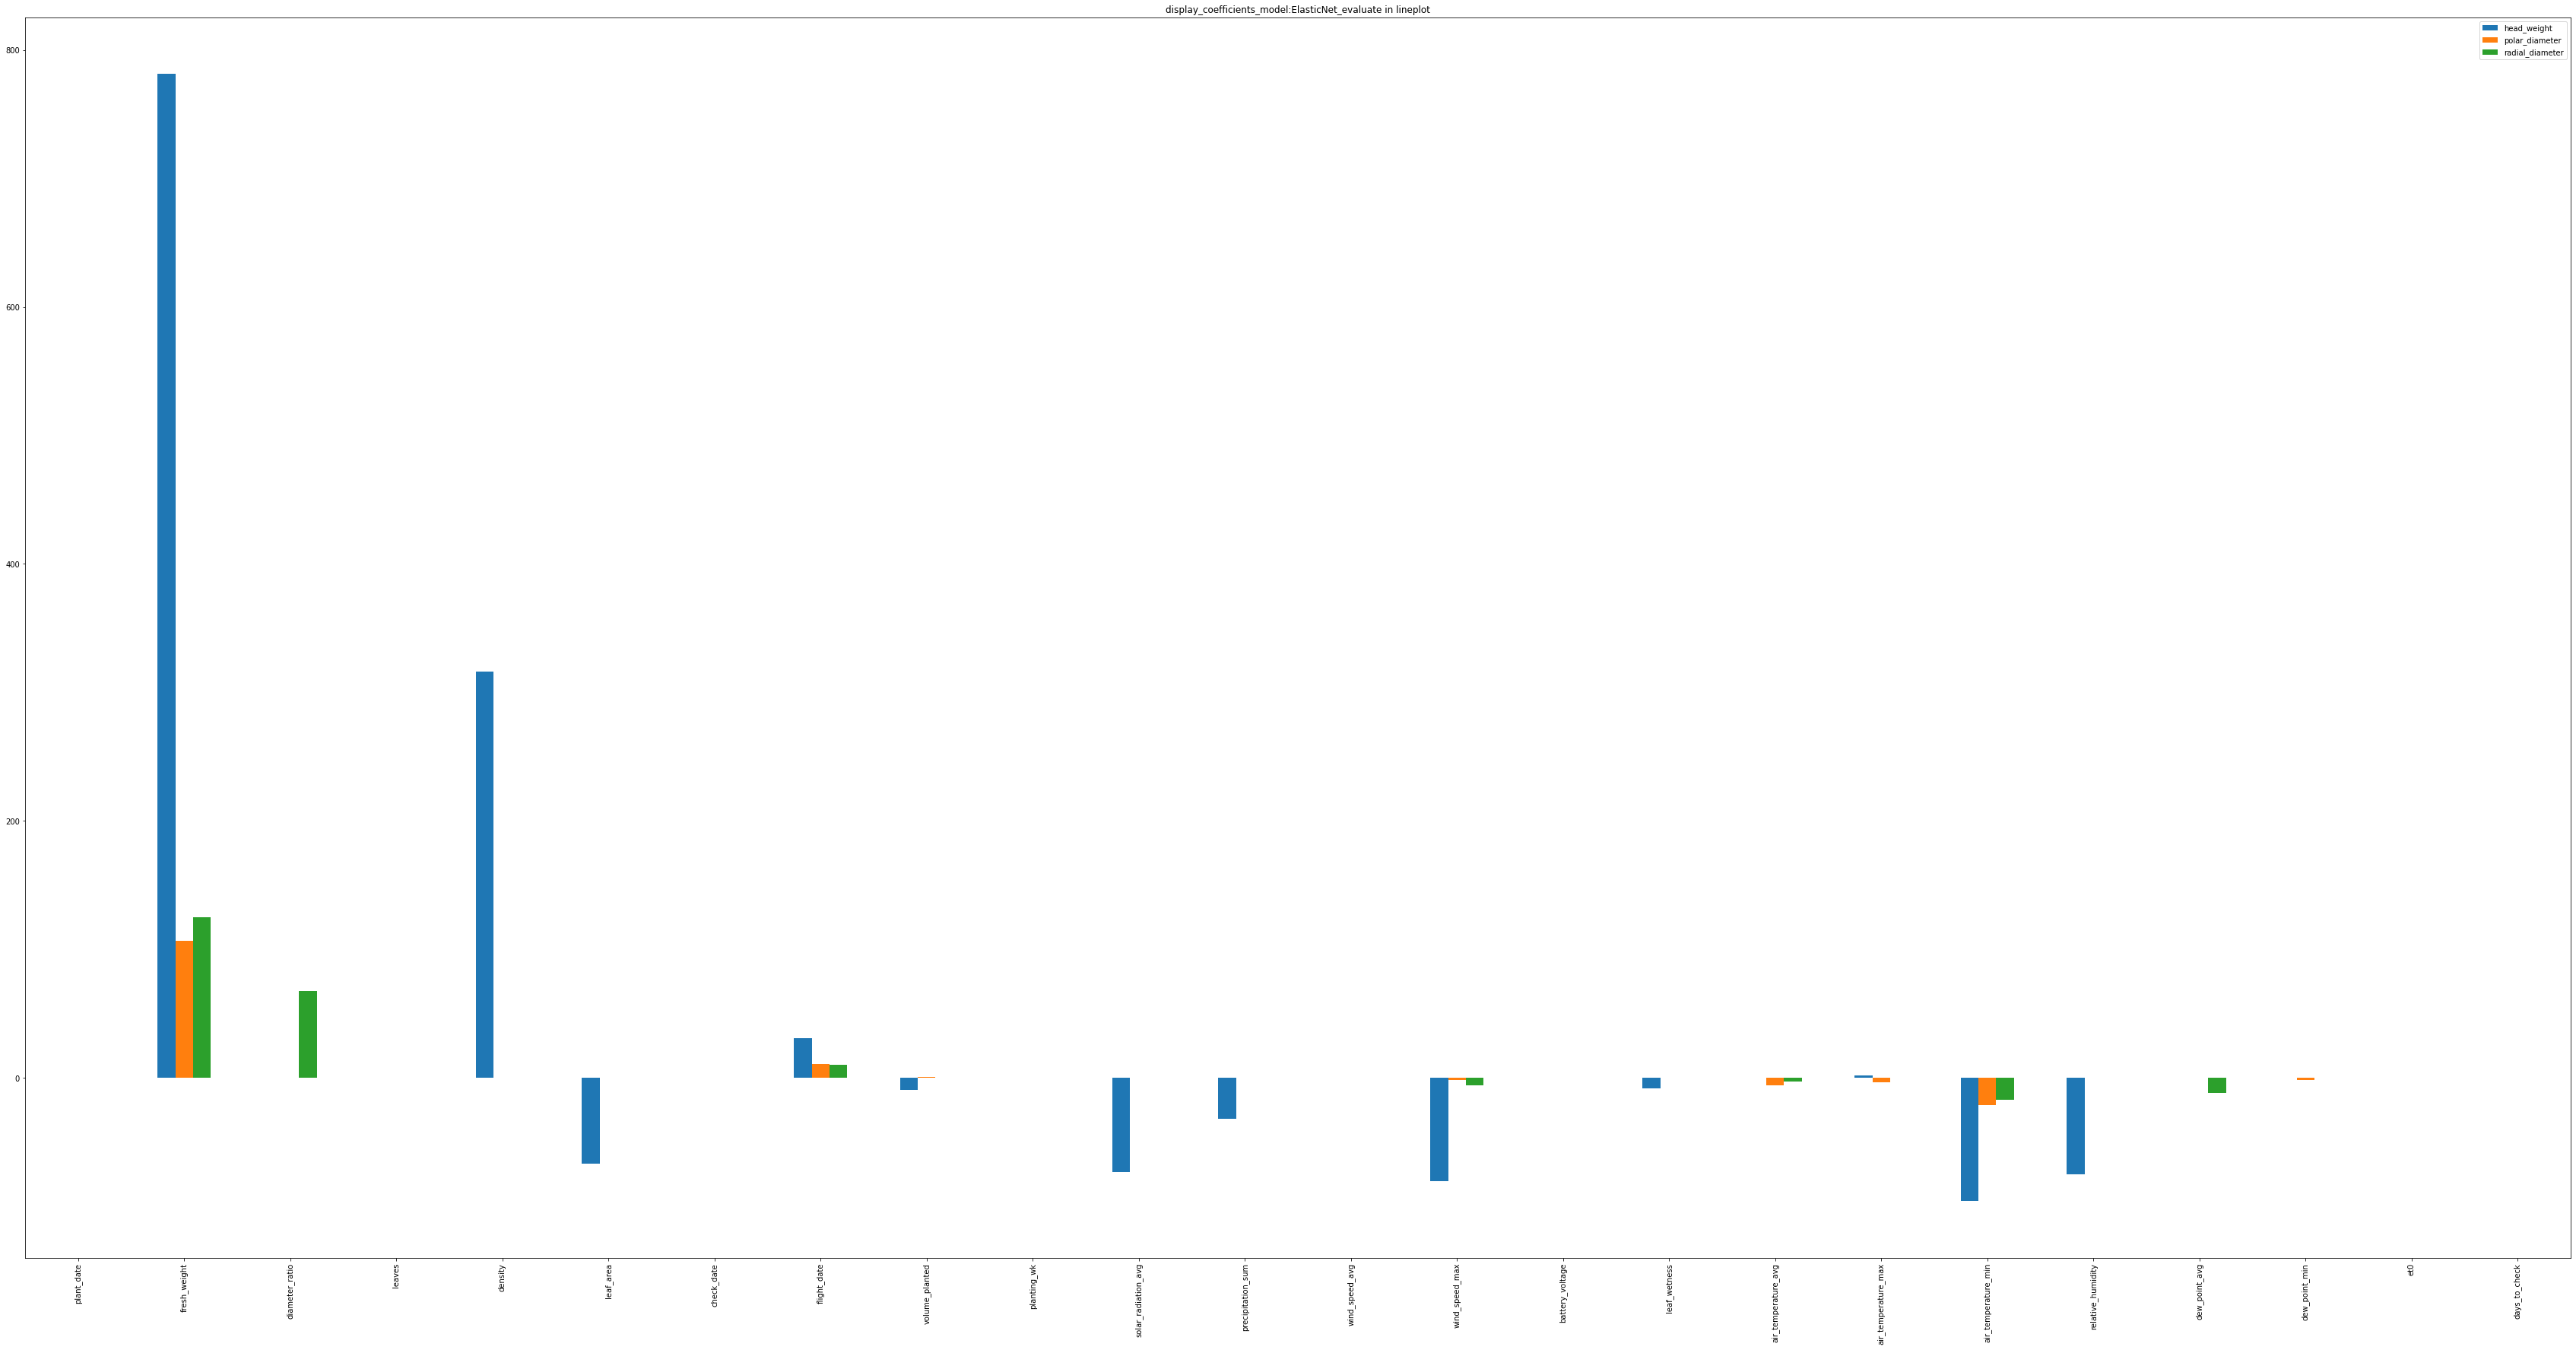

Forward selection in ElasticNet_evaluate
Mean Absolute Error ElasticNet_evaluate: 30.369868648662983
Mean Squared Error ElasticNet_evaluate: 2555.4448861013257
Root Mean Squared Error ElasticNet_evaluate: 50.55140834933608
R-squared ElasticNet_evaluate: 0.7582883658474554
model_score ElasticNet_evaluate: 1.0
accuracy PLSRegression_evaluate: 0.743568 +/- (0.014593)


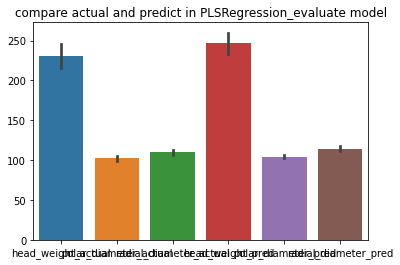

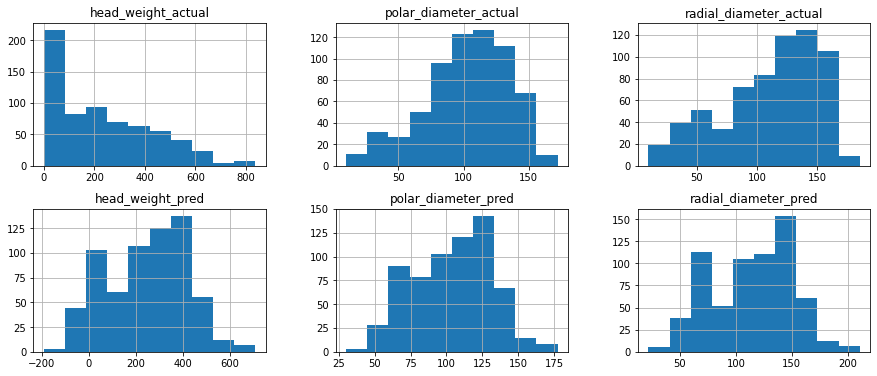

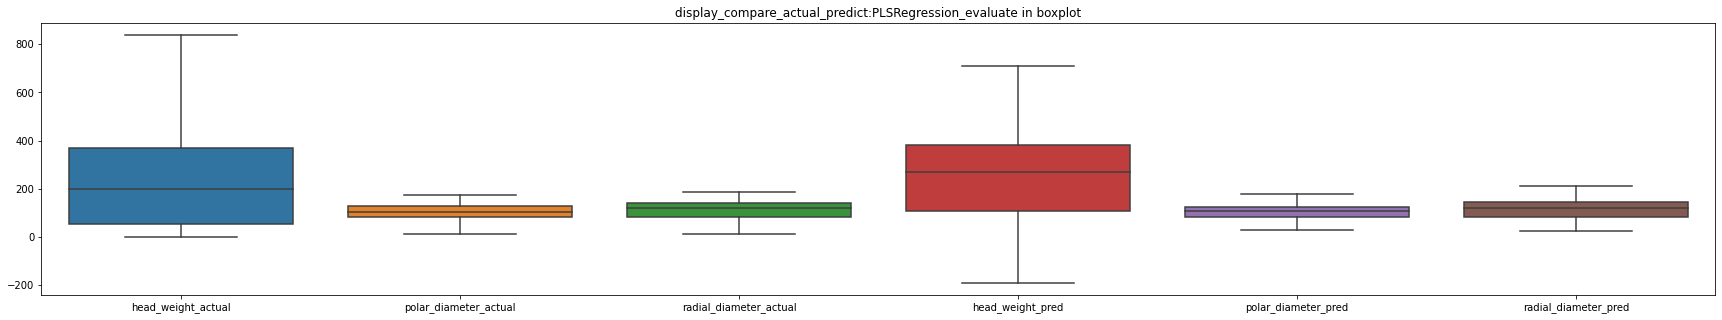

display_compare_actual_predict:PLSRegression_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,278.692524,108.377809,125.352226
1,54.0,82.0,90.0,109.352998,84.253612,88.362485
2,348.0,132.0,130.0,319.313714,115.518868,130.897686
3,101.0,120.0,105.0,169.159756,91.893278,100.974774
4,183.0,105.0,125.0,269.917502,106.804571,120.134919
...,...,...,...,...,...,...
651,192.0,135.0,135.0,259.984445,105.905877,119.707140
652,38.0,60.0,60.0,94.007135,80.342372,86.394843
653,6.0,58.0,32.0,37.628984,75.493528,61.274769
654,41.0,100.0,75.0,102.303883,84.453115,79.633950


Coefficients_PLSRegression_evaluate: [[ 2.67792663e-01 -2.94355530e-01  1.87561769e-01]
 [ 1.48069163e+02  2.45168969e+01  2.86088193e+01]
 [ 2.53065959e+01  3.31055888e+00  6.58322767e+00]
 [-3.45238431e+00 -8.69135867e-01 -3.39306951e-01]
 [-4.80174418e+00 -1.24529411e+00 -2.63492464e-01]
 [-2.04922749e+01 -4.24478554e+00 -2.61886837e+00]
 [ 1.35019128e+01  1.75949889e+00  2.94936826e+00]
 [ 3.50693278e+00  8.44922314e-02  1.16260560e+00]
 [-1.15270172e+00 -1.04746587e-01  5.00496739e-02]
 [ 1.67056816e+00 -5.33093397e-02  4.80406037e-01]
 [ 2.66242692e+00  7.01568296e-01  6.89885612e-01]
 [ 2.85130242e+00  4.59422789e-01  6.90329031e-02]
 [-7.46264029e+00 -1.49995556e+00 -1.47423547e+00]
 [-7.84721139e+00 -1.40669565e+00 -1.80720449e+00]
 [ 7.02100188e+00  1.05134869e+00  1.50439011e+00]
 [-2.76712153e+00 -6.15227229e-01 -6.02287993e-01]
 [-5.98197211e+00 -8.76292520e-01 -1.96759235e+00]
 [-5.19723517e+00 -5.42000800e-01 -1.84499564e+00]
 [-1.26205498e+01 -2.28127367e+00 -3.11957346

,head_weight,polar_diameter,radial_diameter
plant_date,0.267793,-1.152702,-5.981972
fresh_weight,-0.294356,-0.104747,-0.876293
diameter_ratio,0.187562,0.050050,-1.967592
leaves,148.069163,1.670568,-5.197235
density,24.516897,-0.053309,-0.542001
leaf_area,28.608819,0.480406,-1.844996
check_date,25.306596,2.662427,-12.620550
flight_date,3.310559,0.701568,-2.281274
volume_planted,6.583228,0.689886,-3.119573
planting_wk,-3.452384,2.851302,0.669246


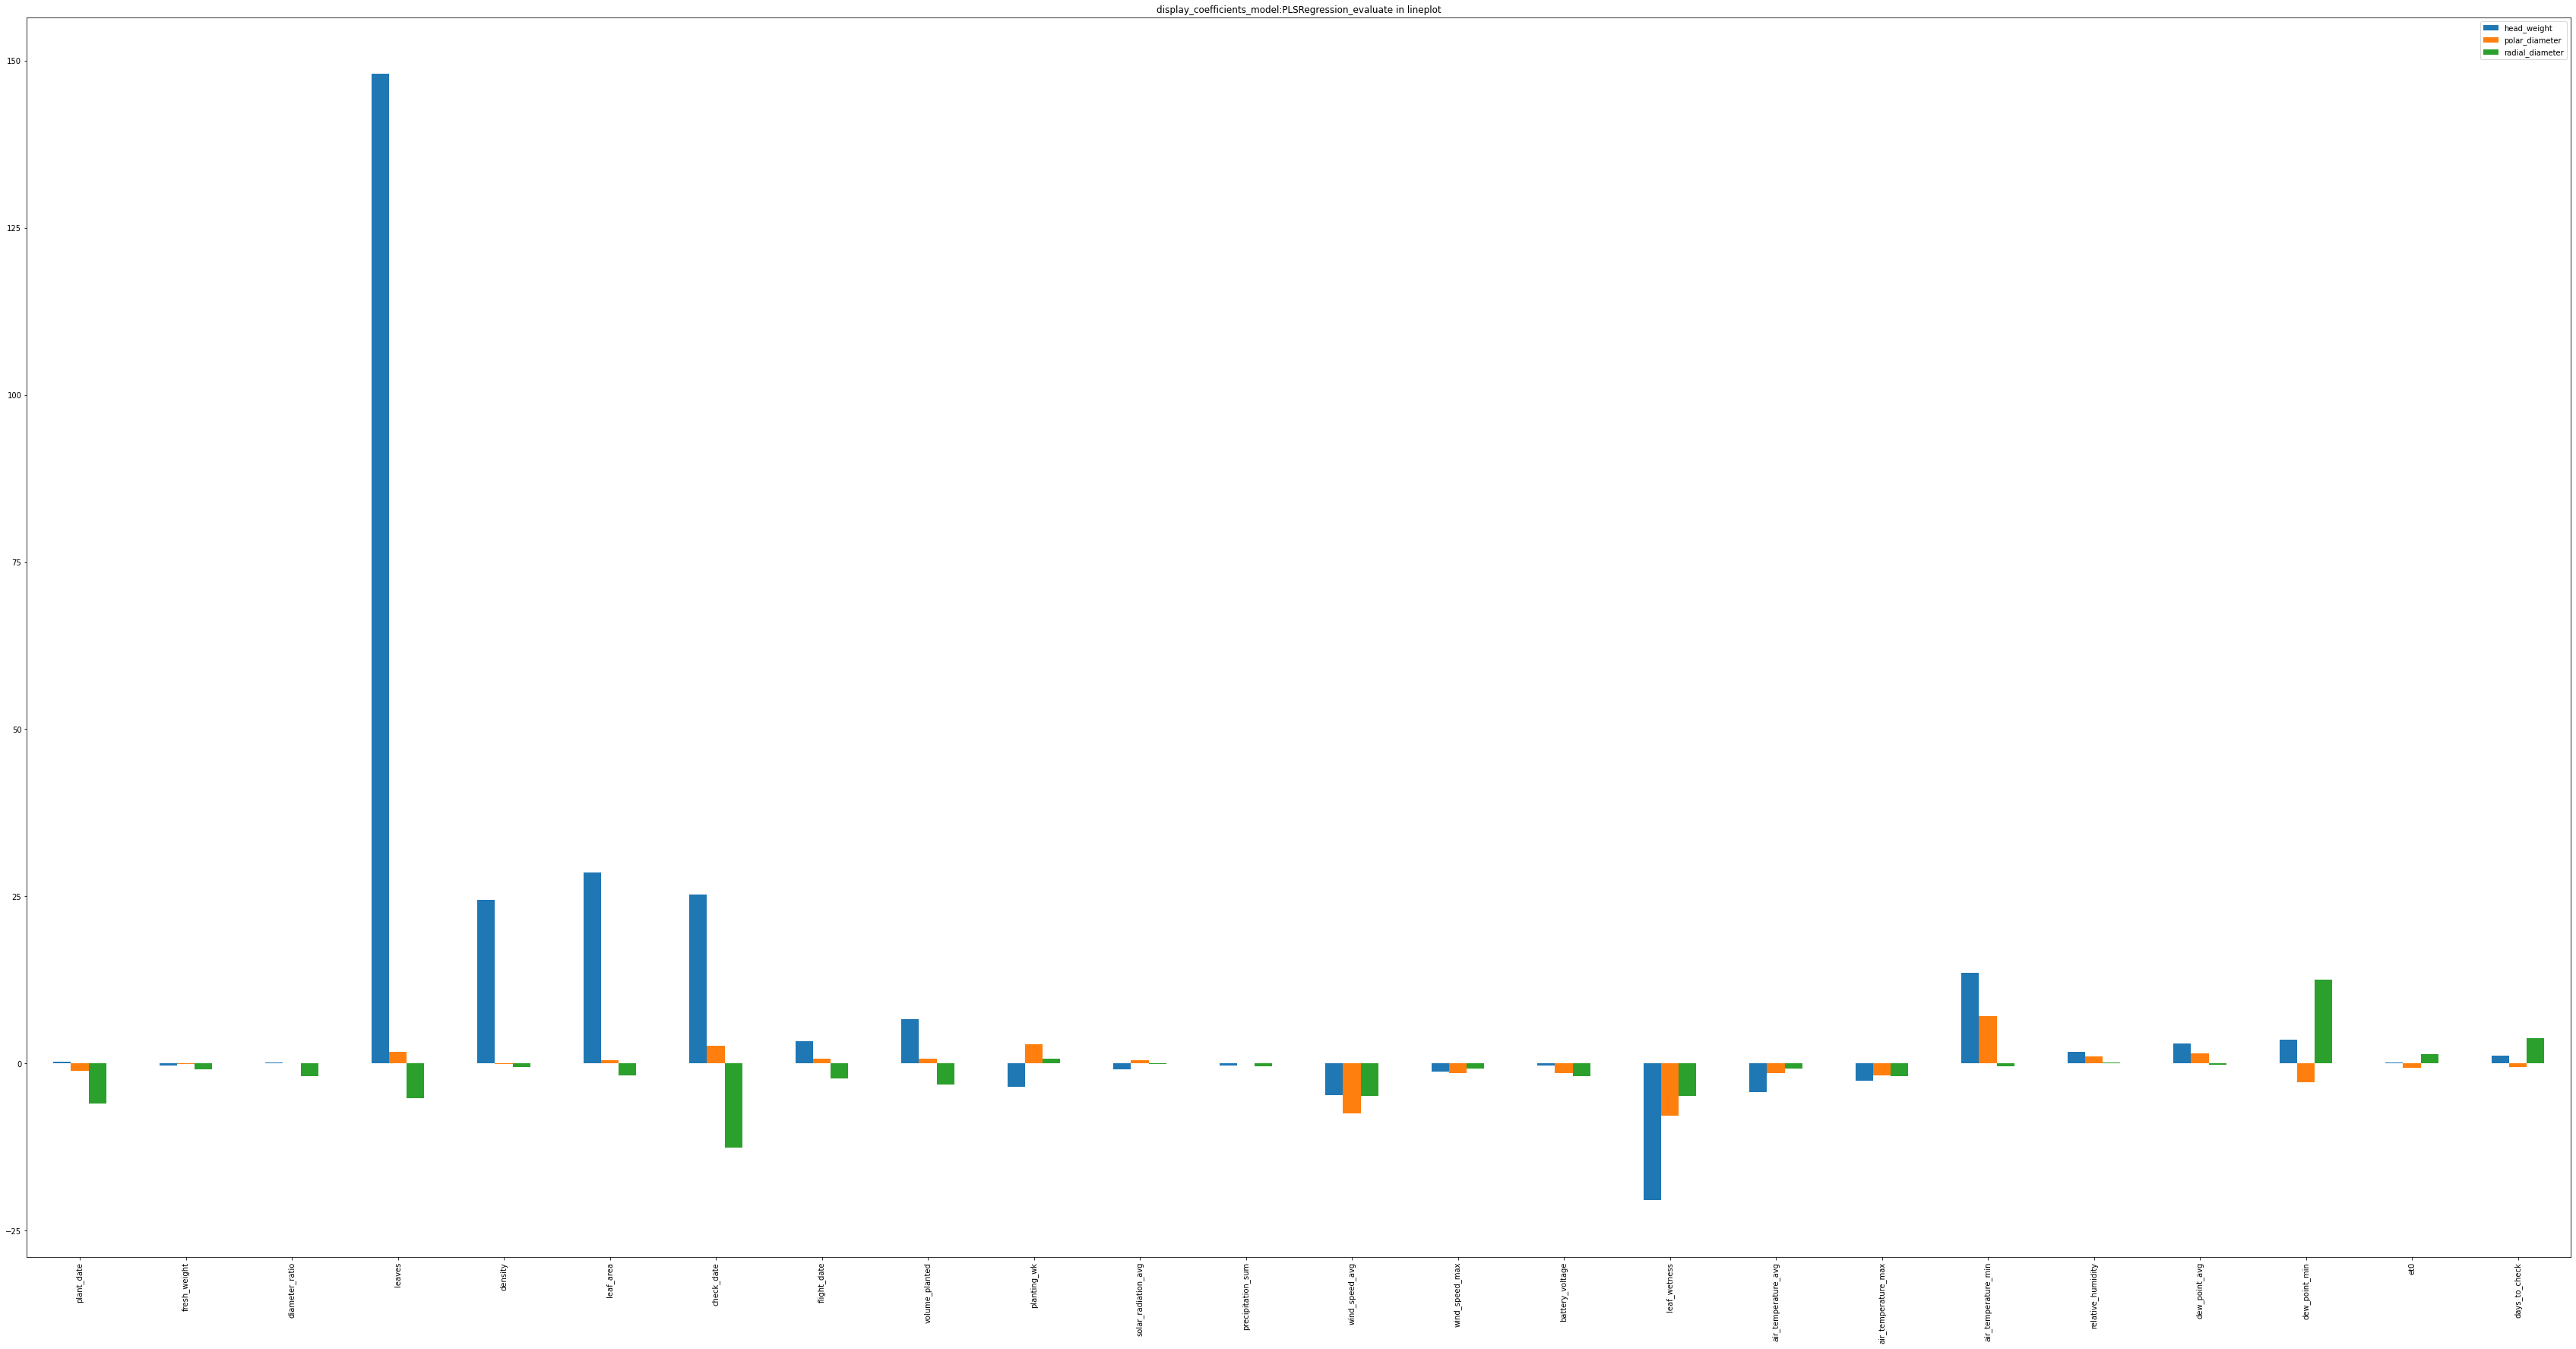

Forward selection in PLSRegression_evaluate


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6817260771619994],0.681726,"(1,)"
2,"(1, 18)",[0.7191251441058718],0.719125,"(1, 18)"
3,"(1, 4, 18)",[0.7543283212038651],0.754328,"(1, 4, 18)"
4,"(1, 2, 4, 18)",[0.7785655197084517],0.778566,"(1, 2, 4, 18)"
5,"(1, 2, 4, 7, 18)",[0.797015466512942],0.797015,"(1, 2, 4, 7, 18)"
6,"(1, 2, 4, 5, 7, 18)",[0.8061964484977634],0.806196,"(1, 2, 4, 5, 7, 18)"
7,"(1, 2, 4, 5, 7, 8, 18)",[0.8073019771999951],0.807302,"(1, 2, 4, 5, 7, 8, 18)"
8,"(1, 2, 4, 5, 7, 8, 15, 18)",[0.8071608467455226],0.807161,"(1, 2, 4, 5, 7, 8, 15, 18)"
9,"(1, 2, 4, 5, 7, 8, 13, 15, 18)",[0.8070007757512802],0.807001,"(1, 2, 4, 5, 7, 8, 13, 15, 18)"
10,"(1, 2, 4, 5, 7, 8, 13, 15, 18, 22)",[0.8072160171678213],0.807216,"(1, 2, 4, 5, 7, 8, 13, 15, 18, 22)"


Mean Absolute Error PLSRegression_evaluate: 34.999881740639765
Mean Squared Error PLSRegression_evaluate: 3317.975019340209
Root Mean Squared Error PLSRegression_evaluate: 57.601866457088086
R-squared PLSRegression_evaluate: 0.7451633732182891
model_score PLSRegression_evaluate: 1.0
accuracy DecisionTreeRegressor_evaluate: 0.882364 +/- (0.008976)


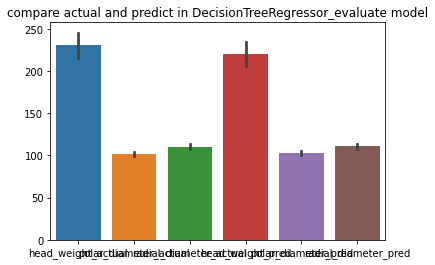

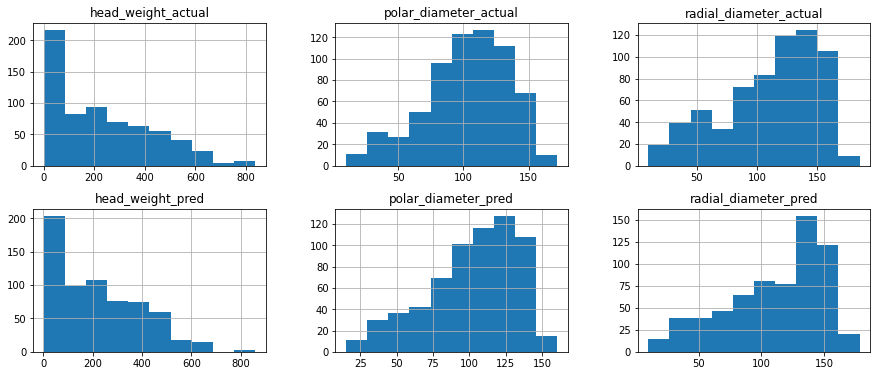

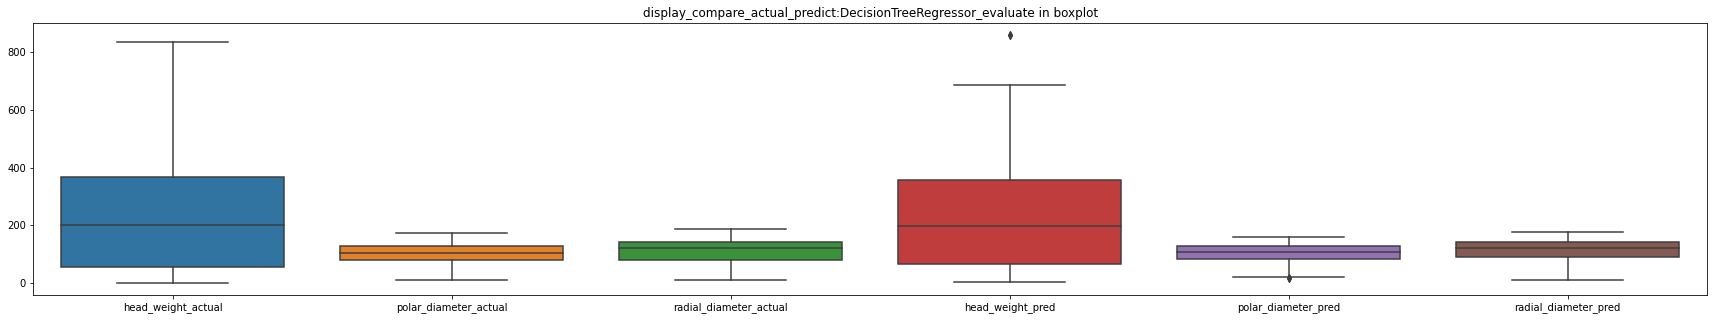

display_compare_actual_predict:DecisionTreeRegressor_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,218.142857,121.857143,150.000000
1,54.0,82.0,90.0,92.132923,62.906217,65.511529
2,348.0,132.0,130.0,300.777778,121.000000,130.444444
3,101.0,120.0,105.0,77.888889,100.000000,105.555556
4,183.0,105.0,125.0,188.200000,107.400000,120.200000
...,...,...,...,...,...,...
651,192.0,135.0,135.0,122.714286,110.000000,122.285714
652,38.0,60.0,60.0,68.142857,84.857143,82.142857
653,6.0,58.0,32.0,22.444444,87.444444,56.111111
654,41.0,100.0,75.0,31.166667,101.000000,67.000000


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.8155262301543157],0.815526,"(1,)"
2,"(0, 1)",[0.9050455026975376],0.905046,"(0, 1)"
3,"(0, 1, 6)",[0.9222800564116248],0.92228,"(0, 1, 6)"
4,"(0, 1, 4, 6)",[0.9371027550477059],0.937103,"(0, 1, 4, 6)"
5,"(0, 1, 4, 5, 6)",[0.9374598108447945],0.93746,"(0, 1, 4, 5, 6)"
6,"(0, 1, 4, 5, 6, 18)",[0.9416874960205774],0.941687,"(0, 1, 4, 5, 6, 18)"
7,"(0, 1, 2, 4, 5, 6, 18)",[0.9395782136981562],0.939578,"(0, 1, 2, 4, 5, 6, 18)"
8,"(0, 1, 2, 4, 5, 6, 10, 18)",[0.9439897541811203],0.94399,"(0, 1, 2, 4, 5, 6, 10, 18)"
9,"(0, 1, 2, 4, 5, 6, 10, 18, 23)",[0.9433415167968446],0.943342,"(0, 1, 2, 4, 5, 6, 10, 18, 23)"
10,"(0, 1, 2, 4, 5, 6, 10, 17, 18, 23)",[0.9438597941042458],0.94386,"(0, 1, 2, 4, 5, 6, 10, 17, 18, 23)"


Mean Absolute Error DecisionTreeRegressor_evaluate: 18.055322539035032
Mean Squared Error DecisionTreeRegressor_evaluate: 1076.3862598128042
Root Mean Squared Error DecisionTreeRegressor_evaluate: 32.80832607453181
R-squared DecisionTreeRegressor_evaluate: 0.9016599989736855
model_score DecisionTreeRegressor_evaluate: 1.0
accuracy RandomForestRegressor_evaluate: 0.931985 +/- (0.007105)


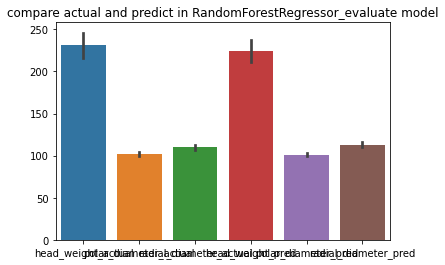

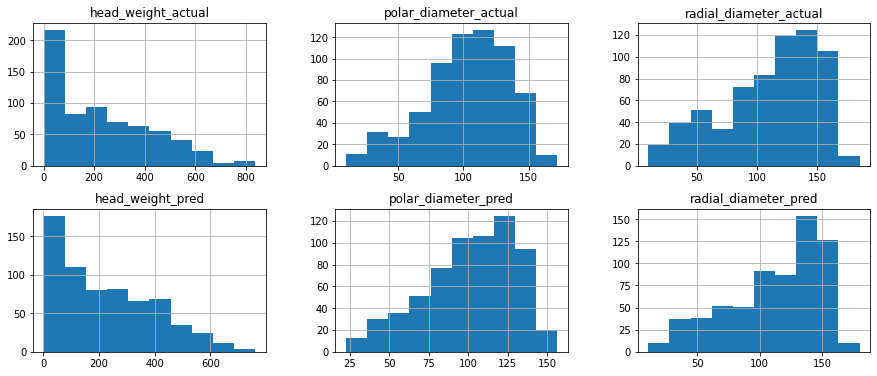

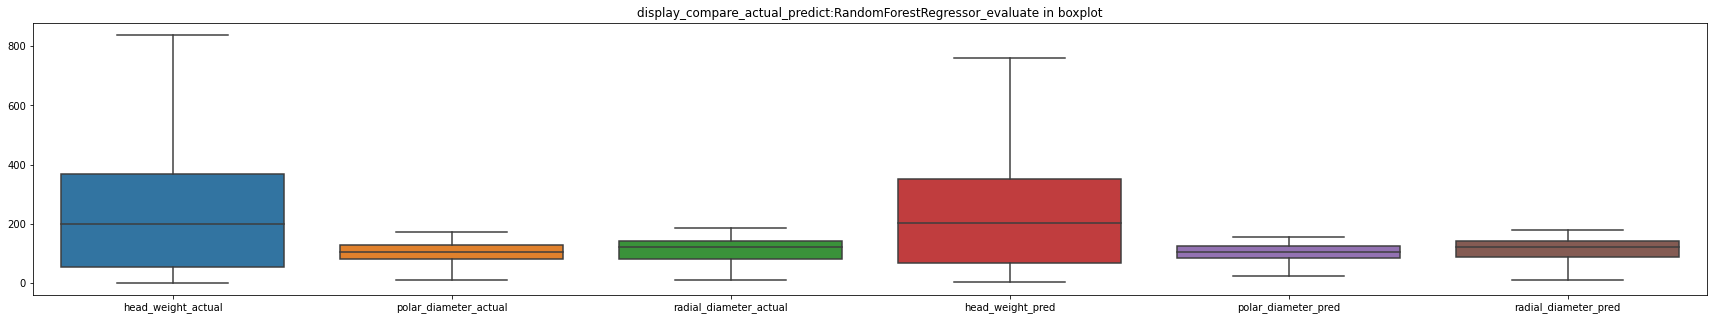

display_compare_actual_predict:RandomForestRegressor_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,224.841000,121.378000,147.826000
1,54.0,82.0,90.0,54.667739,64.119543,68.896371
2,348.0,132.0,130.0,300.185000,120.914000,130.467000
3,101.0,120.0,105.0,87.786000,105.096000,102.328000
4,183.0,105.0,125.0,164.596000,105.038000,121.593000
...,...,...,...,...,...,...
651,192.0,135.0,135.0,194.016431,117.071720,128.428852
652,38.0,60.0,60.0,66.844505,71.997571,76.411917
653,6.0,58.0,32.0,25.335000,80.599000,52.453000
654,41.0,100.0,75.0,25.990000,80.071000,62.351000


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.8599868464427914],0.859987,"(1,)"
2,"(1, 6)",[0.9817403516644898],0.98174,"(1, 6)"
3,"(1, 4, 6)",[0.98960451355593],0.989605,"(1, 4, 6)"
4,"(1, 2, 4, 6)",[0.9911446803746923],0.991145,"(1, 2, 4, 6)"
5,"(1, 2, 4, 6, 21)",[0.9917248388981807],0.991725,"(1, 2, 4, 6, 21)"
6,"(1, 2, 4, 6, 21, 23)",[0.9919093859652891],0.991909,"(1, 2, 4, 6, 21, 23)"
7,"(1, 2, 4, 6, 17, 21, 23)",[0.9919641399391436],0.991964,"(1, 2, 4, 6, 17, 21, 23)"
8,"(1, 2, 4, 6, 8, 17, 21, 23)",[0.992052360210001],0.992052,"(1, 2, 4, 6, 8, 17, 21, 23)"
9,"(1, 2, 4, 6, 8, 15, 17, 21, 23)",[0.9920953844832484],0.992095,"(1, 2, 4, 6, 8, 15, 17, 21, 23)"
10,"(1, 2, 4, 6, 8, 12, 15, 17, 21, 23)",[0.9920956986282944],0.992096,"(1, 2, 4, 6, 8, 12, 15, 17, 21, 23)"


Mean Absolute Error RandomForestRegressor_evaluate: 15.041876292479857
Mean Squared Error RandomForestRegressor_evaluate: 708.951360587249
Root Mean Squared Error RandomForestRegressor_evaluate: 26.626140549979244
R-squared RandomForestRegressor_evaluate: 0.9321191903330757
model_score RandomForestRegressor_evaluate: 1.0
accuracy MLPRegressor_evaluate: 0.896147 +/- (0.009597)


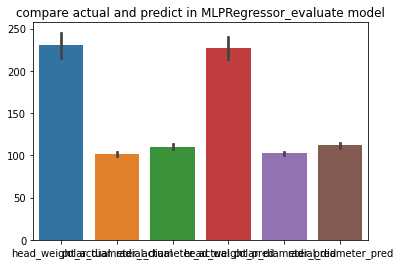

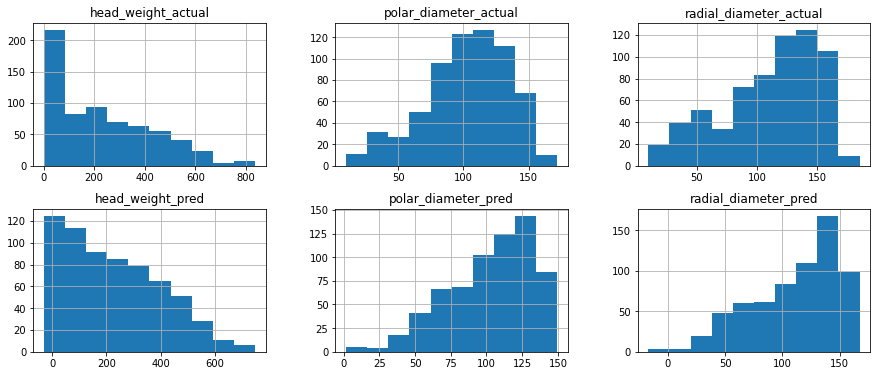

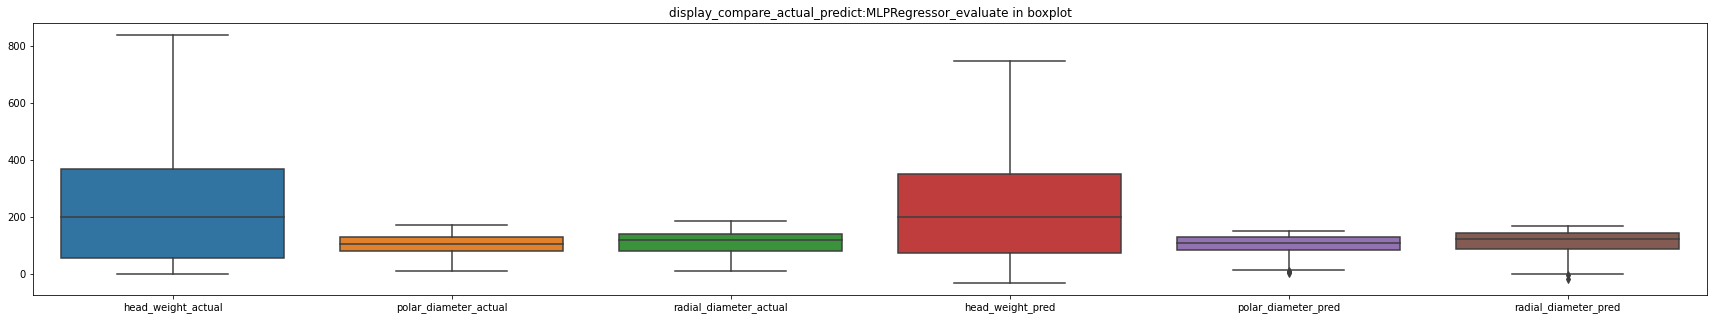

display_compare_actual_predict:MLPRegressor_evaluate in dataframe


,head_weight_actual,polar_diameter_actual,radial_diameter_actual,head_weight_pred,polar_diameter_pred,radial_diameter_pred
0,242.0,130.0,150.0,199.473352,120.606622,133.440599
1,54.0,82.0,90.0,57.472715,79.145318,79.535604
2,348.0,132.0,130.0,330.600334,129.111795,144.360575
3,101.0,120.0,105.0,112.749509,99.000057,104.020535
4,183.0,105.0,125.0,215.560365,114.494875,127.101697
...,...,...,...,...,...,...
651,192.0,135.0,135.0,221.460160,122.810349,126.829068
652,38.0,60.0,60.0,66.605192,74.136509,72.061058
653,6.0,58.0,32.0,26.174884,74.595780,67.455596
654,41.0,100.0,75.0,24.570914,82.448703,69.252357


,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.5267094952558296],0.526709,"(1,)"
2,"(1, 23)",[0.7300060629151398],0.730006,"(1, 23)"
3,"(1, 13, 23)",[0.7397232966061779],0.739723,"(1, 13, 23)"
4,"(1, 10, 13, 23)",[0.7633104199506859],0.76331,"(1, 10, 13, 23)"
5,"(1, 10, 13, 20, 23)",[0.8067913415452962],0.806791,"(1, 10, 13, 20, 23)"
6,"(1, 10, 13, 20, 22, 23)",[0.8265974153806414],0.826597,"(1, 10, 13, 20, 22, 23)"
7,"(1, 3, 10, 13, 20, 22, 23)",[0.8265594630702963],0.826559,"(1, 3, 10, 13, 20, 22, 23)"
8,"(1, 3, 4, 10, 13, 20, 22, 23)",[0.8428713403767728],0.842871,"(1, 3, 4, 10, 13, 20, 22, 23)"
9,"(1, 3, 4, 9, 10, 13, 20, 22, 23)",[0.8528402841030136],0.85284,"(1, 3, 4, 9, 10, 13, 20, 22, 23)"
10,"(1, 3, 4, 9, 10, 12, 13, 20, 22, 23)",[0.8624073875742777],0.862407,"(1, 3, 4, 9, 10, 12, 13, 20, 22, 23)"


Mean Absolute Error MLPRegressor_evaluate: 18.046974745510795
Mean Squared Error MLPRegressor_evaluate: 918.8030635489243
Root Mean Squared Error MLPRegressor_evaluate: 30.311764441367057
R-squared MLPRegressor_evaluate: 0.9074922465154239
model_score MLPRegressor_evaluate: 1.0


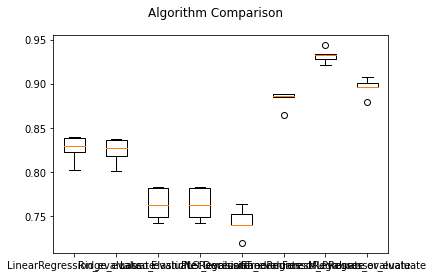

,name_model,mean_model,std_model
0,LinearRegression_evaluate,0.826485,0.013707
1,Ridge_evaluate,0.824303,0.013263
2,Lasso_evaluate,0.764145,0.016613
3,ElasticNet_evaluate,0.764156,0.016618
4,PLSRegression_evaluate,0.743568,0.014593
5,DecisionTreeRegressor_evaluate,0.882364,0.008976
6,RandomForestRegressor_evaluate,0.931985,0.007105
7,MLPRegressor_evaluate,0.896147,0.009597


In [ ]:

# LinearRegression ==> copy_X= True, fit_intercept= True, n_jobs= -1, positive= False
# Ridge ==> alpha = 0.5, copy_X= True, fit_intercept = True, max_iter = False, positive = False, solver = sparse_cg
# Lasso ==> alpha = 0.5, copy_X= True, fit_intercept = True, max_iter = 1000, positive = False, precompute = False, selection = random, warm_start= False
# ElasticNet ==> alpha = 0.5, copy_X = True, fit_intercept= True, l1_ratio= 1, max_iter= 500, positive= False, precompute= False, selection = random, warm_start = True
# PLSRegression ==> copy = True, max_iter = 500, n_components = 4, scale = True
# DecisionTreeRegressor ==> criterion = squared_error, max_depth = None, max_features = auto, min_samples_leaf= 4, min_samples_split= 10, splitter = random
# RandomForestRegressor ==> n_estimators = 1000
# MLPRegressor ==> activation = tanh, max_iter = 1600




# prepare models
models = []
models.append(('LinearRegression_evaluate', LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, positive= False)))
models.append(('Ridge_evaluate', Ridge(alpha = 0.5, copy_X= True, fit_intercept = True, max_iter = False, positive = False, solver = 'sparse_cg')))
models.append(('Lasso_evaluate', Lasso(alpha = 0.5, copy_X= True, fit_intercept = True, max_iter = 1000, positive = False, precompute = False, selection = 'random', warm_start= False)))
models.append(('ElasticNet_evaluate', ElasticNet(0.5, copy_X = True, fit_intercept= True, l1_ratio= 1, max_iter= 500, positive= False, precompute= False, selection = 'random', warm_start = True)))
models.append(('PLSRegression_evaluate', PLSRegression(copy = True, max_iter = 500, n_components = 4, scale = True)))
models.append(('DecisionTreeRegressor_evaluate', DecisionTreeRegressor(criterion = 'squared_error', max_depth = None, max_features = 'auto', min_samples_leaf= 4, min_samples_split= 10, splitter = 'random')))
models.append(('RandomForestRegressor_evaluate', RandomForestRegressor(n_estimators = 1000)))
models.append(('MLPRegressor_evaluate', MLPRegressor(activation = 'tanh', max_iter = 1600)))

# evaluate each model in turn
results = []
names = []

all_name_model = []
all_mean_model = []
all_std_model = []

# scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train)
  results.append(cv_results)
  names.append(name)
  msg = "accuracy %s: %f +/- (%f)" % (name, cv_results.mean(), cv_results.std())
  all_name_model.append(name)
  all_mean_model.append(cv_results.mean())
  all_std_model.append(cv_results.std())

  #  test
  print("======================================================================================")
  print(msg)
  model.fit(X_train_scalar, y_train)
  y_pred_model =model.predict(X_test_scalar)

  head_weight_actual = []
  polar_diameter_actual = []
  radial_diameter_actual = []
  head_weight_pred = []
  polar_diameter_pred = []
  radial_diameter_pred = []

  for i in range(len(y_test)):
    head_weight_actual.append(y_test[i][0])
    polar_diameter_actual.append(y_test[i][1])
    radial_diameter_actual.append(y_test[i][2])
    head_weight_pred.append(y_pred_model[i][0])
    polar_diameter_pred.append(y_pred_model[i][1])
    radial_diameter_pred.append(y_pred_model[i][2])


  df_data_predict = pd.DataFrame({'head_weight_actual':head_weight_actual,
                              'polar_diameter_actual':polar_diameter_actual,
                              'radial_diameter_actual':radial_diameter_actual,
                              'head_weight_pred':head_weight_pred,
                              'polar_diameter_pred':polar_diameter_pred,
                              'radial_diameter_pred':radial_diameter_pred})
  sns.barplot(data=df_data_predict).set(title=f'compare actual and predict in {name} model')
  
  df_data_predict.hist(figsize=(15,30),layout=(9,3))

  plt.figure(figsize=(30,5))
  plt.xlim(0,1000)
  sns.boxplot(data=df_data_predict)

  plt.title(f'display_compare_actual_predict:{name} in boxplot')
  plt.show()
  print(f'display_compare_actual_predict:{name} in dataframe')
  display(df_data_predict)



  # model
  try:
    print(f"Intercept_{name}:", model.intercept_)
  except:
    pass
  try:
    print(f"Coefficients_{name}:",model.coef_)

    list_intercept = ["head_weight", "polar_diameter", "radial_diameter"]
    list_coefficients = df.drop(["head_weight", "polar_diameter", "radial_diameter"], axis=1,inplace=False).columns
    list_temp_coef = []
    for i in range(len(model.coef_)):
      # print(list_intercept[i])
      for j in range(len(model.coef_[i])):
        list_temp_coef.append(model.coef_[i][j])

    length_each_column = int(len(list_temp_coef)/3)
    df_coefficients_model = pd.DataFrame({"head_weight":list_temp_coef[0:length_each_column],
                            "polar_diameter":list_temp_coef[length_each_column:(length_each_column)*2],
                            "radial_diameter":list_temp_coef[(length_each_column)*2:(length_each_column)*3]
                            })
    df_coefficients_model.index = list_coefficients
    print(f"display_coefficients_model:{name}")
    display(df_coefficients_model)
    df_coefficients_model.plot(kind='bar',figsize = (60,30))
    plt.title(f'display_coefficients_model:{name} in lineplot')
    plt.show()

    print(f'Forward selection in {name}')
  except:
    pass
  #Define Sequential Forward Selection (sfs)
  try:
    sfs = SFS(model,
              k_features=24,
              forward=True,
              floating=False,
              scoring = 'r2',
              cv = 0)
  #Use SFS to select the top 5 features 

    sfs.fit(X, y)

    #Create a dataframe for the SFS results 
    df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
    display(df_SFS_results)
  except:
    pass
  print(f'Mean Absolute Error {name}:', metrics.mean_absolute_error(y_test, y_pred_model))
  print(f'Mean Squared Error {name}:', metrics.mean_squared_error(y_test, y_pred_model))
  print(f'Root Mean Squared Error {name}:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
  print(f'R-squared {name}:',r2_score(y_test, y_pred_model))
  print(f'model_score {name}:',model.score(X_test_scalar, y_pred_model))
  print("======================================================================================")

# test
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

df_evaluate_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_model' : all_mean_model,
    'std_model' : all_std_model
})
display(df_evaluate_predict)

#  Metric Performance

This is a compilation of the predictions that have run the code previously and analyzed the good parts of each model. with measurements from the previous cross validation and metrics

In [ ]:

# linear regression
# scores: .0.825481 +/- .0.020433
# Mean Absolute Error: 28.310442771299957
# Mean Squared Error: 2199.58890536102
# Root Mean Squared Error: 46.899775109919446
# R-squared: 0.8130521732290399

# polynomial regression
# scores: .0.947151 +/- .0.003604
# Mean Absolute Error: 16.88288662247845
# Mean Squared Error: 756.6857843390168
# Root Mean Squared Error: 27.507922210501775
# R-squared: 0.9158701156433836


# Ridge
# scores: 0.821893 +/-	0.013333
# Mean Absolute Error Ridge: 28.446690273347716
# Mean Squared Error Ridge: 2276.7385772293524
# Root Mean Squared Error Ridge: 47.71518183167022
# R-squared Ridge: 0.8090479113725185

# Lasso
# scores: 0.726722 +/-	0.014856
# Mean Absolute Error Lasso: 32.307167455305695
# Mean Squared Error Lasso: 2747.6936181671867
# Root Mean Squared Error Lasso: 52.41844730786278
# R-squared Lasso: 0.7203857531111787

# ElasticNet
# scores: 0.167695 +/-	0.010534
# Mean Absolute Error ElasticNet: 67.7907342471635
# Mean Squared Error ElasticNet: 11293.508650000336
# Root Mean Squared Error ElasticNet: 106.27092099911592
# R-squared ElasticNet: 0.16037659226693457

# PLSRegression
# scores: 0.655551 +/-	0.024405
# Mean Absolute Error PLSRegression: 41.794551104208814
# Mean Squared Error PLSRegression: 4748.8525268005815
# Root Mean Squared Error PLSRegression: 68.91191861209919
# R-squared PLSRegression: 0.6425150434292713

# DecisionTreeRegressor
# scores: 0.862159 +/-	0.010381
# Mean Absolute Error DecisionTreeRegressor: 19.59489476010669
# Mean Squared Error DecisionTreeRegressor: 1288.7745933736053
# Root Mean Squared Error DecisionTreeRegressor: 35.899506868111786
# R-squared DecisionTreeRegressor: 0.87065136163732

# RandomForestRegressor
# scores: 0.931733 +/-	0.006886
# Mean Absolute Error RandomForestRegressor: 15.061756344073487
# Mean Squared Error RandomForestRegressor: 717.4068080470823
# Root Mean Squared Error RandomForestRegressor: 26.784450863272937
# R-squared RandomForestRegressor: 0.9310877909900196

# MLPRegressor
# scores: 0.565917 +/- 0.024301
# Mean Absolute Error MLPRegressor: 44.73093361457773
# Mean Squared Error MLPRegressor: 5409.8734080000495
# Root Mean Squared Error MLPRegressor: 73.55184163567932
# R-squared MLPRegressor: 0.6161365396557028

df_default_parameter = pd.DataFrame({
    'Model':['LinearRegression','PolynomialRegression','RidgeRegression','LassoRegression','ElasticNetRegression','PLSRegression','DecisionTreeRegressor','RandomForestRegressor','MLPRegressor'],
    'scores':[0.825481,0.947151,0.821893,0.726722,0.167695,0.655551,0.862159,0.931733,0.565917],
    "std":[0.020433,0.003604,0.013333,0.014856,0.010534,0.024405,0.010381,0.006886,0.024301],
    "Mean Absolute Error":[28.310442771299957,16.88288662247845,28.446690273347716,32.307167455305695,67.7907342471635,41.794551104208814,19.59489476010669,15.061756344073487,44.73093361457773],
    "Mean Squared Error":[2199.58890536102,756.6857843390168,2276.7385772293524,2747.6936181671867,11293.508650000336,4748.8525268005815,1288.7745933736053,717.4068080470823,5409.8734080000495],
    "Root Mean Squared Error":[46.899775109919446,27.507922210501775,47.71518183167022,52.41844730786278,106.27092099911592,68.91191861209919,35.899506868111786,26.784450863272937,73.55184163567932],
    "R-squared":[0.8130521732290399,0.9158701156433836,0.8090479113725185,0.7203857531111787,0.16037659226693457,0.6425150434292713,0.87065136163732,0.9310877909900196,0.6161365396557028],


})
df_default_parameter
# default score priority
# PolynomialRegression = 0.947151
# RandomForestRegressor	= 0.931733
# DecisionTreeRegressor = 0.862159
# LinearRegression = 0.825481	
# RidgeRegression = 0.821893
# LassoRegression = 0.726722
# PLSRegression = 0.655551
# MLPRegressor = 0.565917
# ElasticNetRegression = 0.167695

# default std priority
# PolynomialRegression = 0.003604
# MLPRegressor = 0.024301
# PLSRegression = 0.024405
# LinearRegression = 0.020433
# LassoRegression = 0.014856
# RidgeRegression = 0.013333
# ElasticNetRegression = 0.010534
# DecisionTreeRegressor = 0.010381
# RandomForestRegressor = 0.006886





# Root Mean Squared Error		
# RandomForestRegressor = 26.784451
# PolynomialRegression = 27.507922
# DecisionTreeRegressor = 35.899507
# LinearRegression = 46.899775
# RidgeRegression = 47.715182
# LassoRegression = 52.418447
# PLSRegression = 68.911919
# MLPRegressor = 73.551842
# ElasticNetRegression = 106.270921




,Model,scores,std,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,LinearRegression,0.825481,0.020433,28.310443,2199.588905,46.899775,0.813052
1,PolynomialRegression,0.947151,0.003604,16.882887,756.685784,27.507922,0.915870
2,RidgeRegression,0.821893,0.013333,28.446690,2276.738577,47.715182,0.809048
3,LassoRegression,0.726722,0.014856,32.307167,2747.693618,52.418447,0.720386
4,ElasticNetRegression,0.167695,0.010534,67.790734,11293.508650,106.270921,0.160377
5,PLSRegression,0.655551,0.024405,41.794551,4748.852527,68.911919,0.642515
6,DecisionTreeRegressor,0.862159,0.010381,19.594895,1288.774593,35.899507,0.870651
7,RandomForestRegressor,0.931733,0.006886,15.061756,717.406808,26.784451,0.931088
8,MLPRegressor,0.565917,0.024301,44.730934,5409.873408,73.551842,0.616137


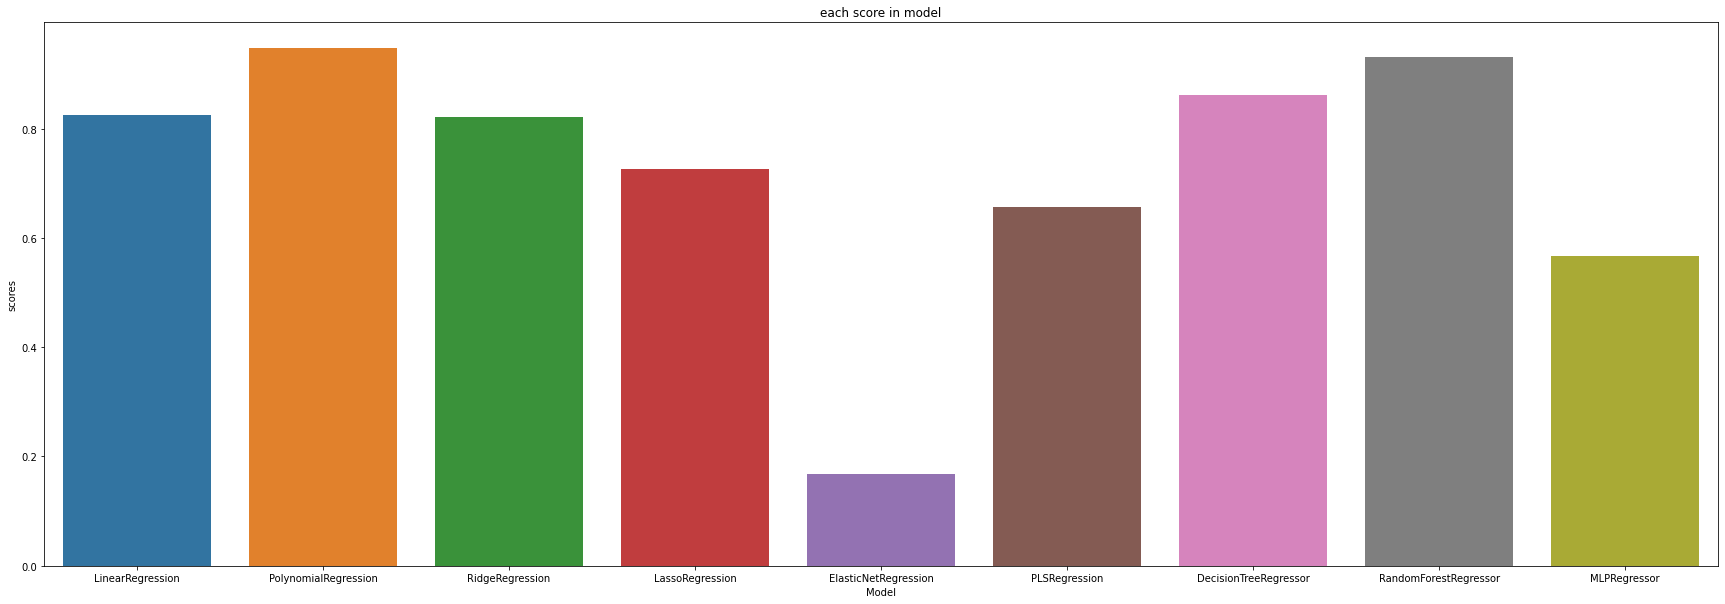

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each score in default_parameter_model')
sns.barplot(x="Model", y="scores", data=df_default_parameter)

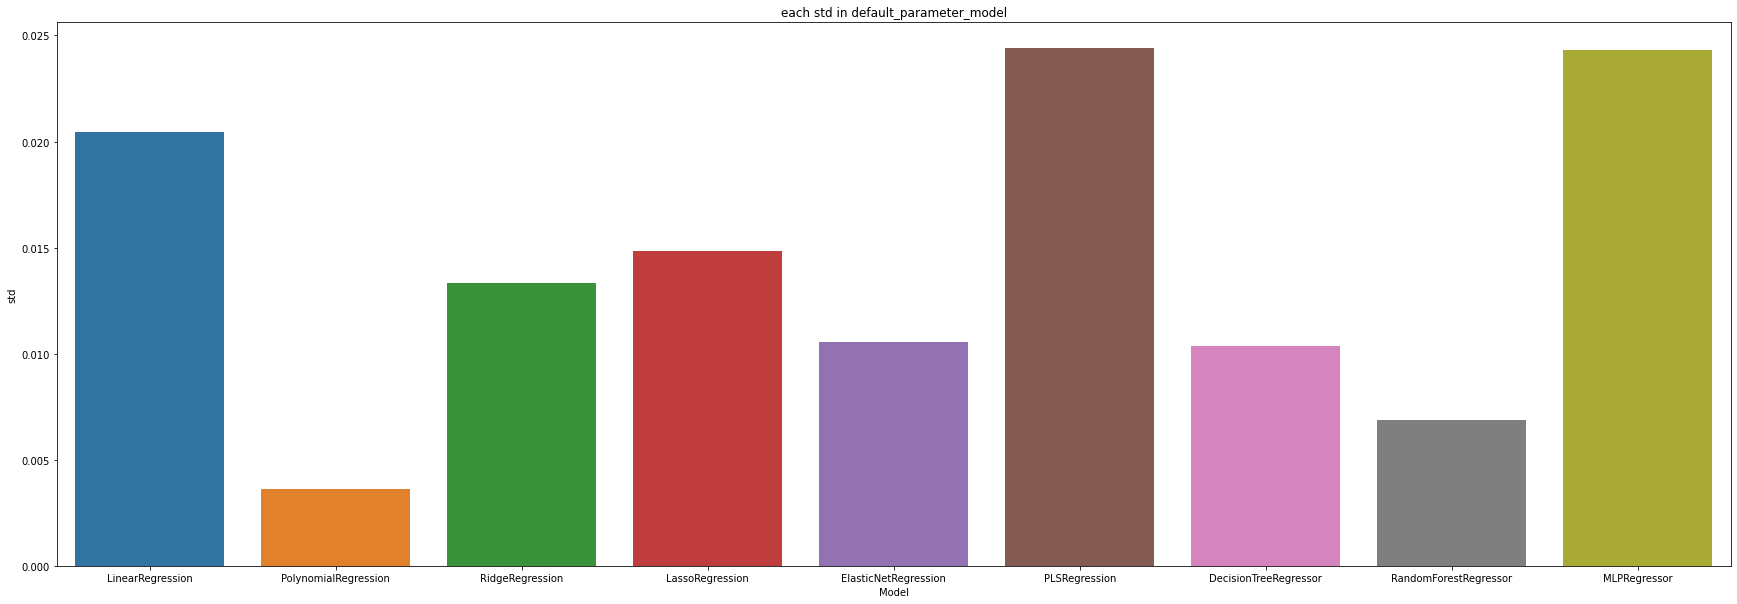

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each std in default_parameter_model')
sns.barplot(x="Model", y="std", data=df_default_parameter)

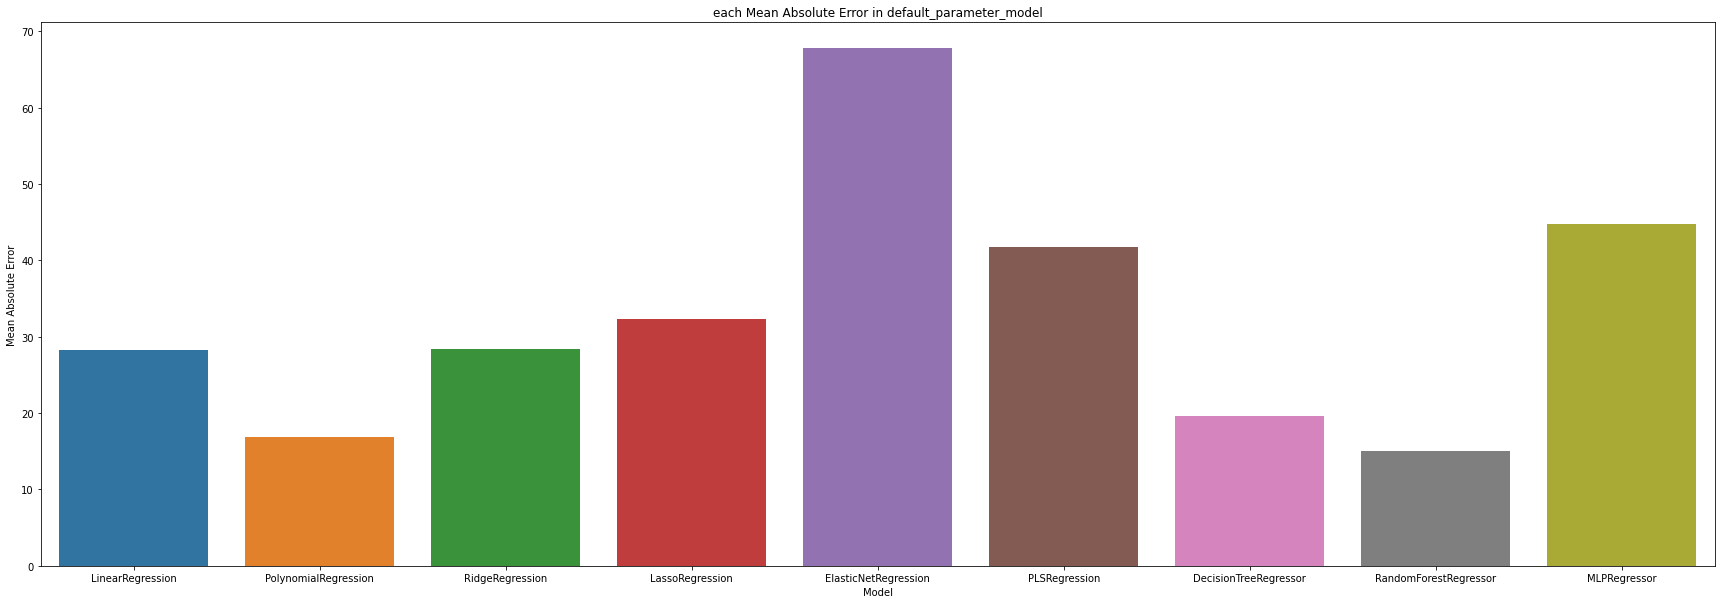

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Mean Absolute Error in default_parameter_model')
sns.barplot(x="Model", y="Mean Absolute Error", data=df_default_parameter)

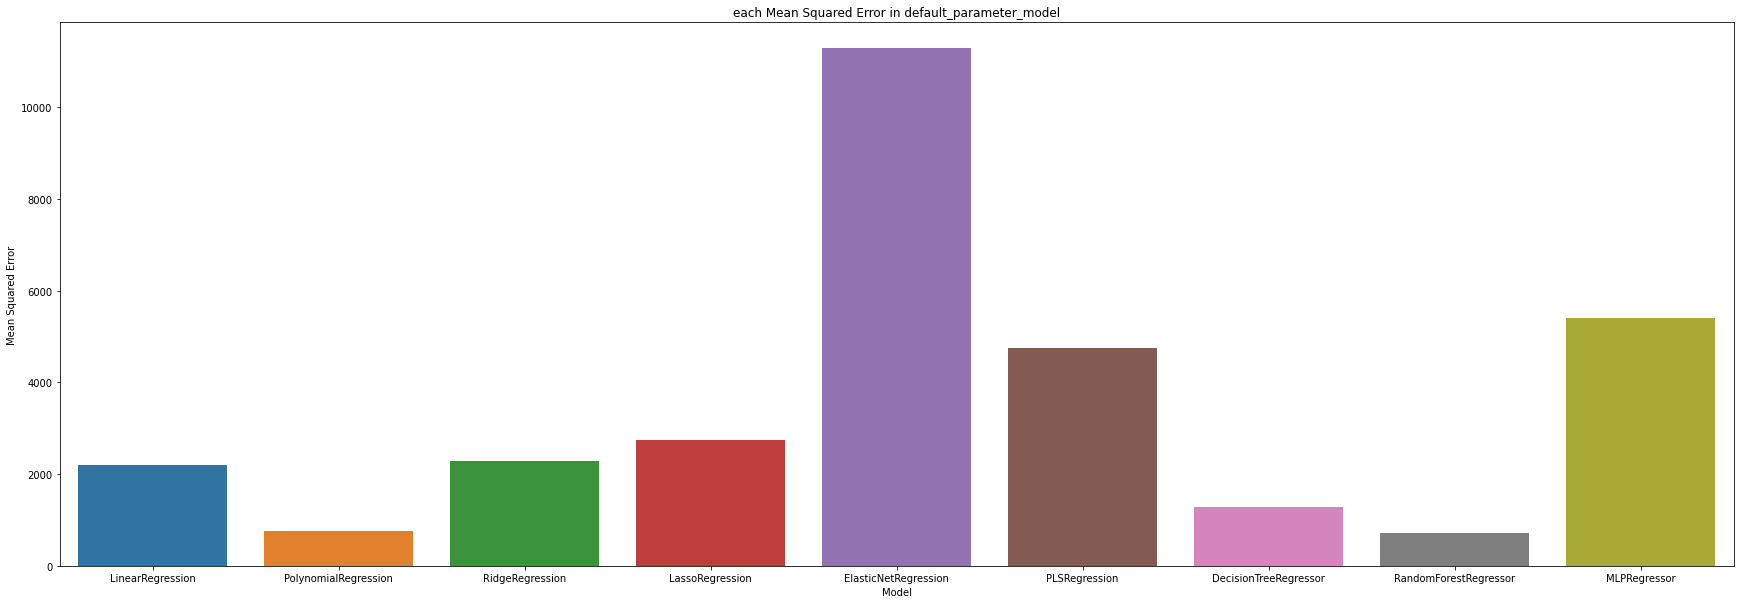

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Mean Squared Error in default_parameter_model')
sns.barplot(x="Model", y="Mean Squared Error", data=df_default_parameter)

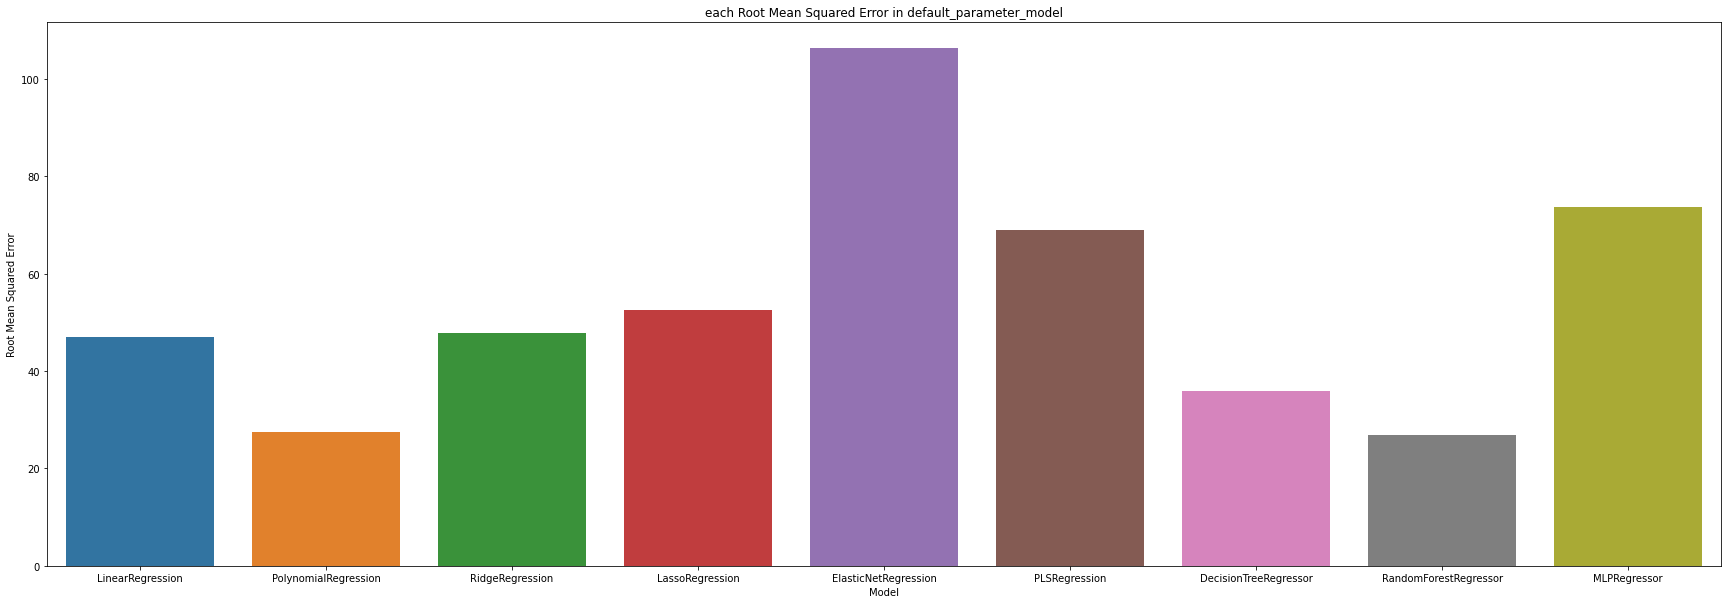

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Root Mean Squared Error in default_parameter_model')
sns.barplot(x="Model", y="Root Mean Squared Error", data=df_default_parameter)

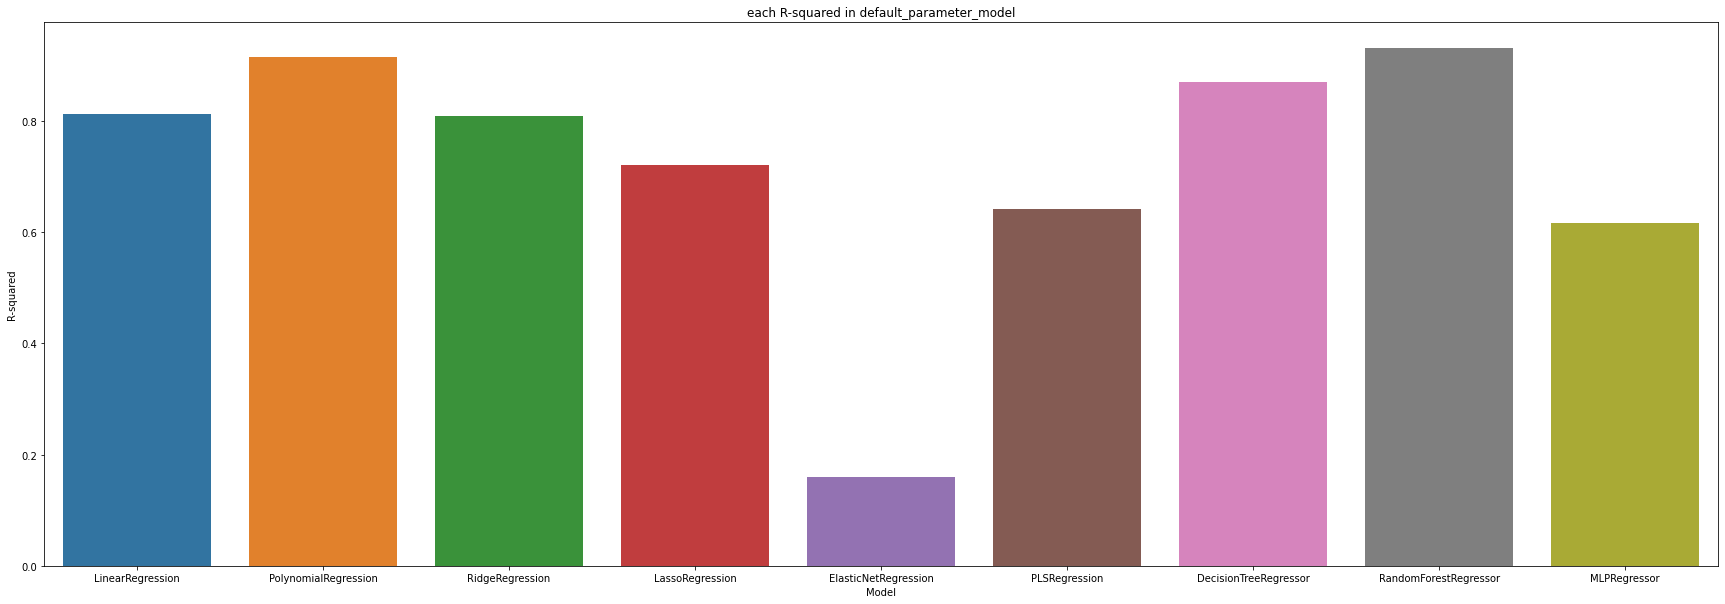

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each R-squared in default_parameter_model')
sns.barplot(x="Model", y="R-squared", data=df_default_parameter)

In [ ]:
# linear regression
# scores: .0.825481 +/- .0.020433
# Mean Absolute Error: 28.310442771299957
# Mean Squared Error: 2199.58890536102
# Root Mean Squared Error: 46.899775109919446
# R-squared: 0.8130521732290399

# polynomial regression
# scores: .0.946575 +/- .0.003912
# Mean Absolute Error: 17.12077548714775
# Mean Squared Error: 778.58722312705
# Root Mean Squared Error: 27.903175860949055
# R-squared: 0.9149856854893467

# Ridge
# scores:0.824303 +/- (0.013263)
# Mean Absolute Error Ridge_evaluate: 28.299199692883548
# Mean Squared Error Ridge_evaluate: 2238.253816938343
# Root Mean Squared Error Ridge_evaluate: 47.31018724268953
# R-squared Ridge_evaluate: 0.8108598756941516

# lasso
# scores:0.764145 +/- (0.016613)
# Mean Absolute Error Lasso_evaluate: 30.37241748530516
# Mean Squared Error Lasso_evaluate: 2555.565594782381
# Root Mean Squared Error Lasso_evaluate: 50.552602255298204
# R-squared Lasso_evaluate: 0.7582403745297421

# ElasticNet
# scores: 0.764156 +/- (0.016618)
# Mean Absolute Error ElasticNet_evaluate: 30.369868648662983
# Mean Squared Error ElasticNet_evaluate: 2555.4448861013257
# Root Mean Squared Error ElasticNet_evaluate: 50.55140834933608
# R-squared ElasticNet_evaluate: 0.7582883658474554

# PLSRegression
# scores: 0.743568 +/- (0.014593)
# Mean Absolute Error PLSRegression_evaluate: 34.999881740639765
# Mean Squared Error PLSRegression_evaluate: 3317.975019340209
# Root Mean Squared Error PLSRegression_evaluate: 57.601866457088086
# R-squared PLSRegression_evaluate: 0.7451633732182891

# DecisionTreeRegressor
# scores: 0.882364 +/- (0.008976)
# Mean Absolute Error DecisionTreeRegressor_evaluate: 18.055322539035032
# Mean Squared Error DecisionTreeRegressor_evaluate: 1076.3862598128042
# Root Mean Squared Error DecisionTreeRegressor_evaluate: 32.80832607453181
# R-squared DecisionTreeRegressor_evaluate: 0.9016599989736855

# RandomForestRegressor
# scores:0.931985 +/- (0.007105)
# Mean Absolute Error RandomForestRegressor_evaluate: 15.041876292479857
# Mean Squared Error RandomForestRegressor_evaluate: 708.951360587249
# Root Mean Squared Error RandomForestRegressor_evaluate: 26.626140549979244
# R-squared RandomForestRegressor_evaluate: 0.9321191903330757

# MLPRegressor
# scores: 0.896147 +/- (0.009597)
# Mean Absolute Error MLPRegressor_evaluate: 18.046974745510795
# Mean Squared Error MLPRegressor_evaluate: 918.8030635489243
# Root Mean Squared Error MLPRegressor_evaluate: 30.311764441367057
# R-squared MLPRegressor_evaluate: 0.9074922465154239

df_june_parameter = pd.DataFrame({
    'Model':['LinearRegression','PolynomialRegression','RidgeRegression','LassoRegression','ElasticNetRegression','PLSRegression','DecisionTreeRegressor','RandomForestRegressor','MLPRegressor'],
    'scores':[0.825481,0.946575,0.824303,0.764145,0.764156,0.743568,0.882364,0.931985,0.896147],
    'std':[0.020433,0.003912,0.013263,0.016613,0.016618,0.014593,0.008976,0.007105,0.009597],
    'Mean Absolute Error':[28.310442771299957,17.12077548714775,28.299199692883548,30.37241748530516,30.369868648662983,34.999881740639765,18.055322539035032,15.041876292479857,18.046974745510795],
    'Mean Squared Error':[2199.58890536102,778.58722312705,2238.253816938343,2555.565594782381,2555.4448861013257,3317.975019340209,1076.3862598128042,708.951360587249,918.8030635489243],
    'Root Mean Squared Error':[46.899775109919446,27.903175860949055,47.31018724268953,50.552602255298204,50.55140834933608,57.601866457088086,32.80832607453181,26.626140549979244,30.311764441367057],
    'R-squared':[0.8130521732290399,0.9149856854893467,0.8108598756941516,0.7582403745297421,0.7582883658474554,0.7451633732182891,0.9016599989736855,0.9321191903330757,0.9074922465154239]
})
df_june_parameter
# default score priority
PolynomialRegression = 0.946575
RandomForestRegressor = 0.931985
MLPRegressor = 0.896147
DecisionTreeRegressor = 0.882364
LinearRegression = 0.825481
RidgeRegression = 0.824303
LassoRegression = 0.764145
ElasticNetRegression = 0.764156
PLSRegression = 0.743568

# default std priority

PolynomialRegression = 0.003912
RandomForestRegressor = 0.007105
DecisionTreeRegressor = 0.008976
MLPRegressor = 0.009597
ElasticNetRegression = 0.016618
RidgeRegression = 0.013263
PLSRegression = 0.014593
LassoRegression = 0.016613
LinearRegression = 0.020433


# Root Mean Squared Error	
RandomForestRegressor = 26.626141
PolynomialRegression = 27.903176
MLPRegressor = 30.311764
DecisionTreeRegressor = 32.808326
LinearRegression = 46.899775
RidgeRegression = 47.310187
ElasticNetRegression = 50.551408
LassoRegression = 50.552602
PLSRegression	 = 57.601866


,Model,scores,std,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,LinearRegression,0.825481,0.020433,28.310443,2199.588905,46.899775,0.813052
1,PolynomialRegression,0.946575,0.003912,17.120775,778.587223,27.903176,0.914986
2,RidgeRegression,0.824303,0.013263,28.299200,2238.253817,47.310187,0.810860
3,LassoRegression,0.764145,0.016613,30.372417,2555.565595,50.552602,0.758240
4,ElasticNetRegression,0.764156,0.016618,30.369869,2555.444886,50.551408,0.758288
5,PLSRegression,0.743568,0.014593,34.999882,3317.975019,57.601866,0.745163
6,DecisionTreeRegressor,0.882364,0.008976,18.055323,1076.386260,32.808326,0.901660
7,RandomForestRegressor,0.931985,0.007105,15.041876,708.951361,26.626141,0.932119
8,MLPRegressor,0.896147,0.009597,18.046975,918.803064,30.311764,0.907492


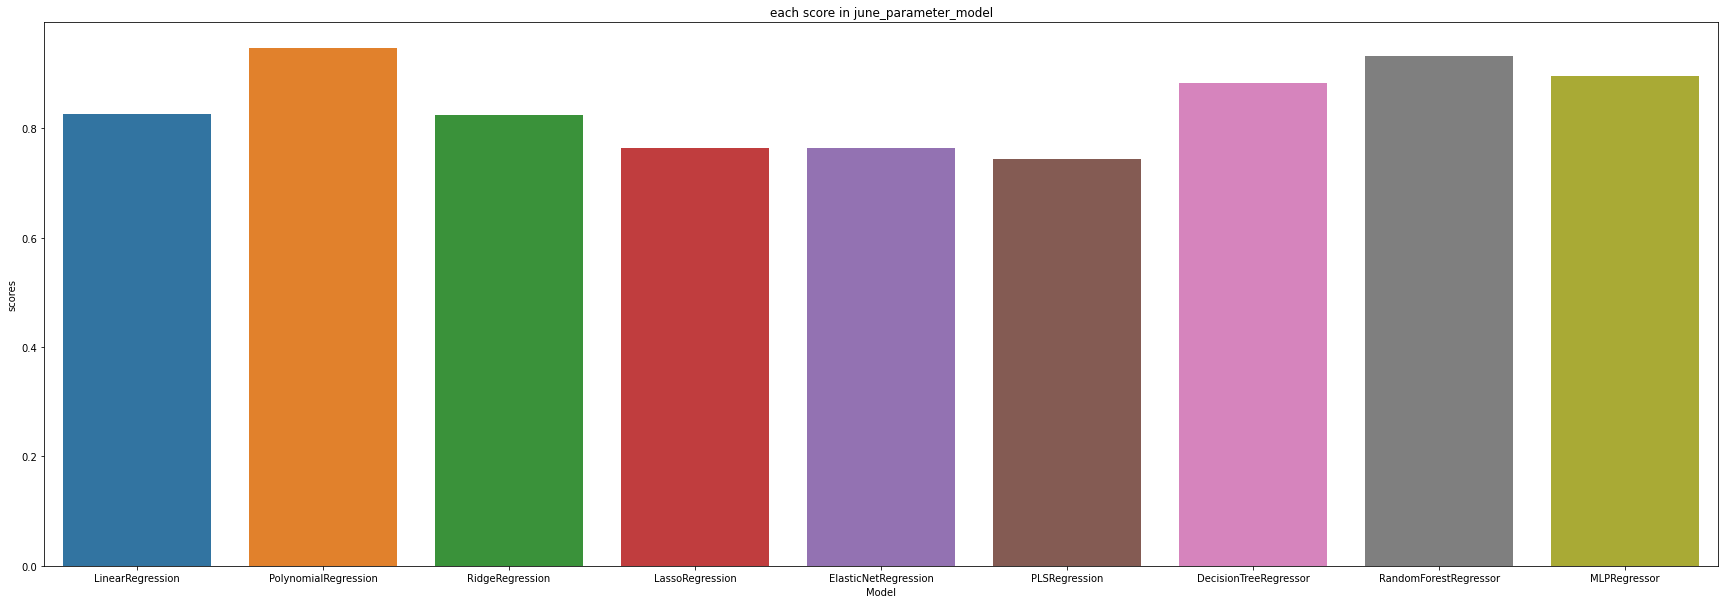

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each score in june_parameter_model')
sns.barplot(x="Model", y="scores", data=df_june_parameter)

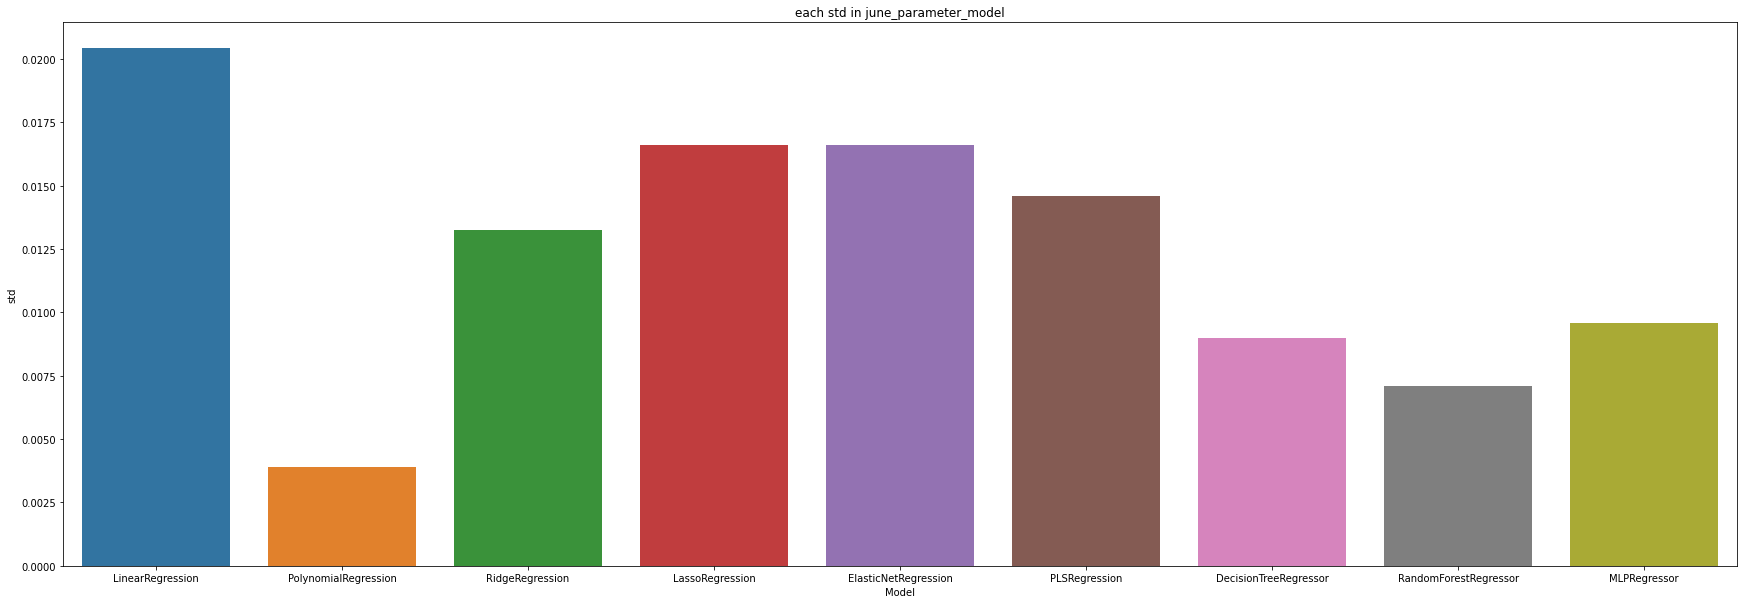

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each std in june_parameter_model')
sns.barplot(x="Model", y="std", data=df_june_parameter)

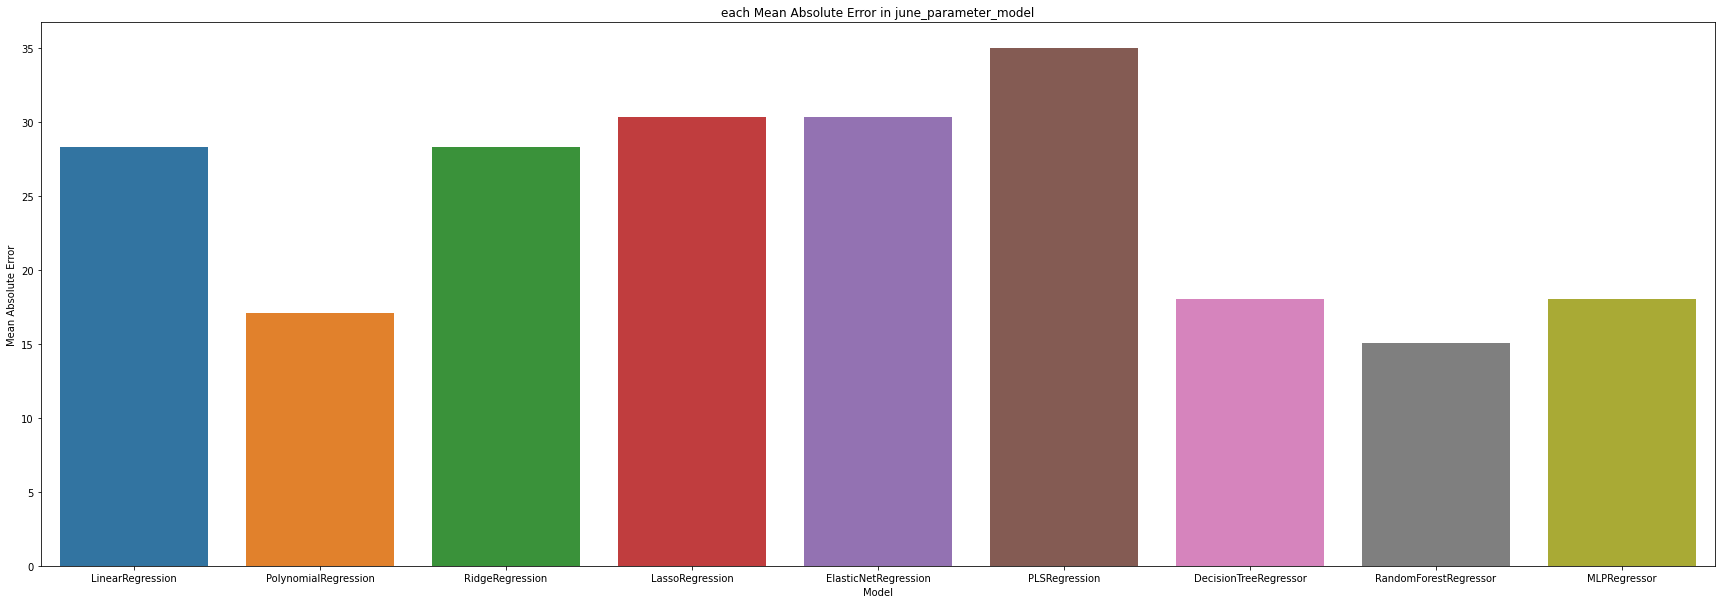

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Mean Absolute Error in june_parameter_model')
sns.barplot(x="Model", y="Mean Absolute Error", data=df_june_parameter)

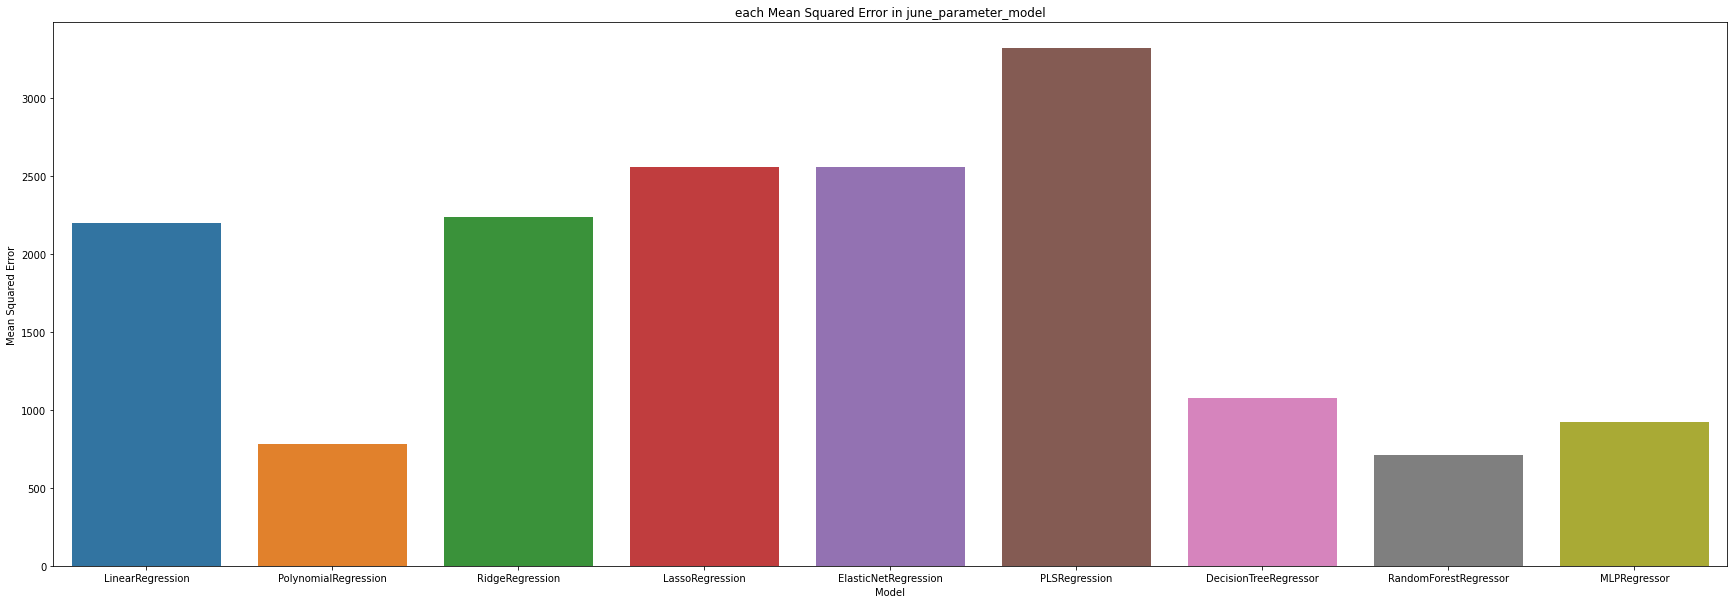

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Mean Squared Error in june_parameter_model')
sns.barplot(x="Model", y="Mean Squared Error", data=df_june_parameter)

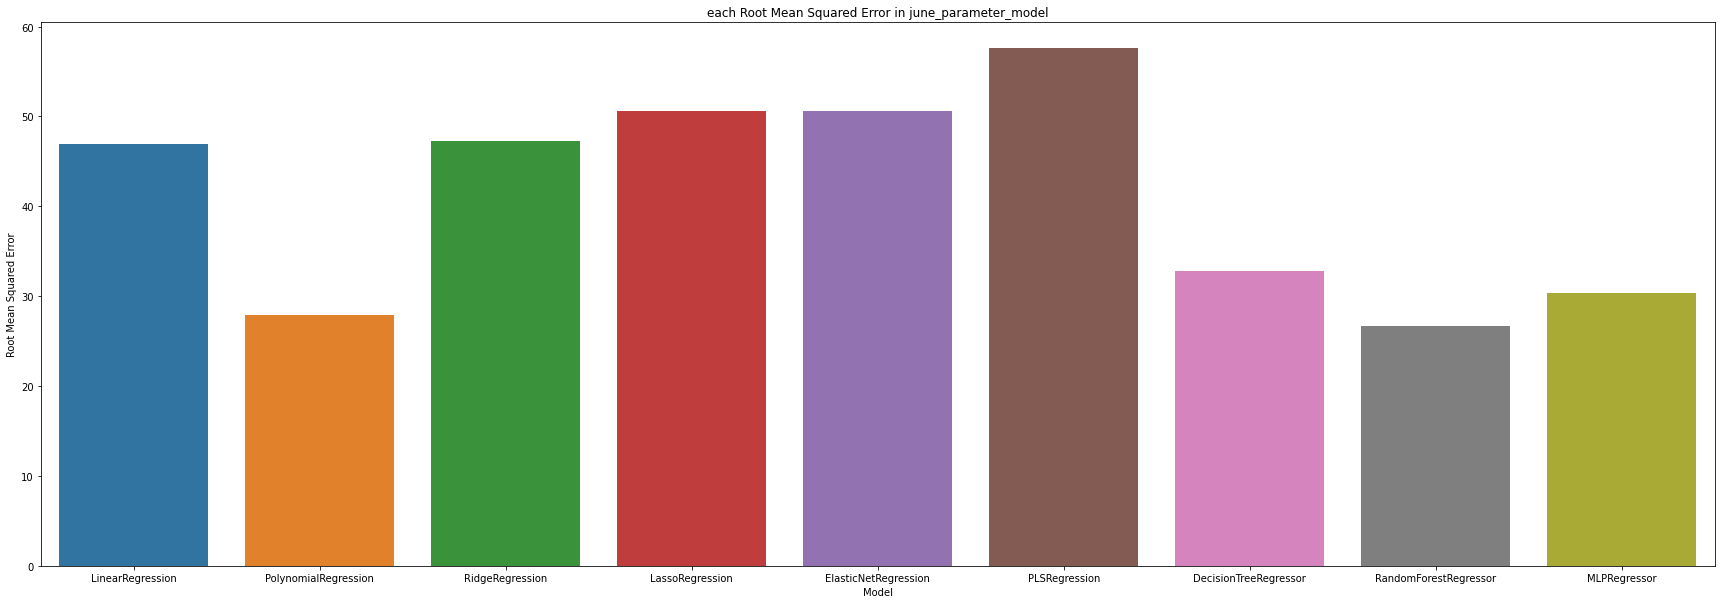

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each Root Mean Squared Error in june_parameter_model')
sns.barplot(x="Model", y="Root Mean Squared Error", data=df_june_parameter)

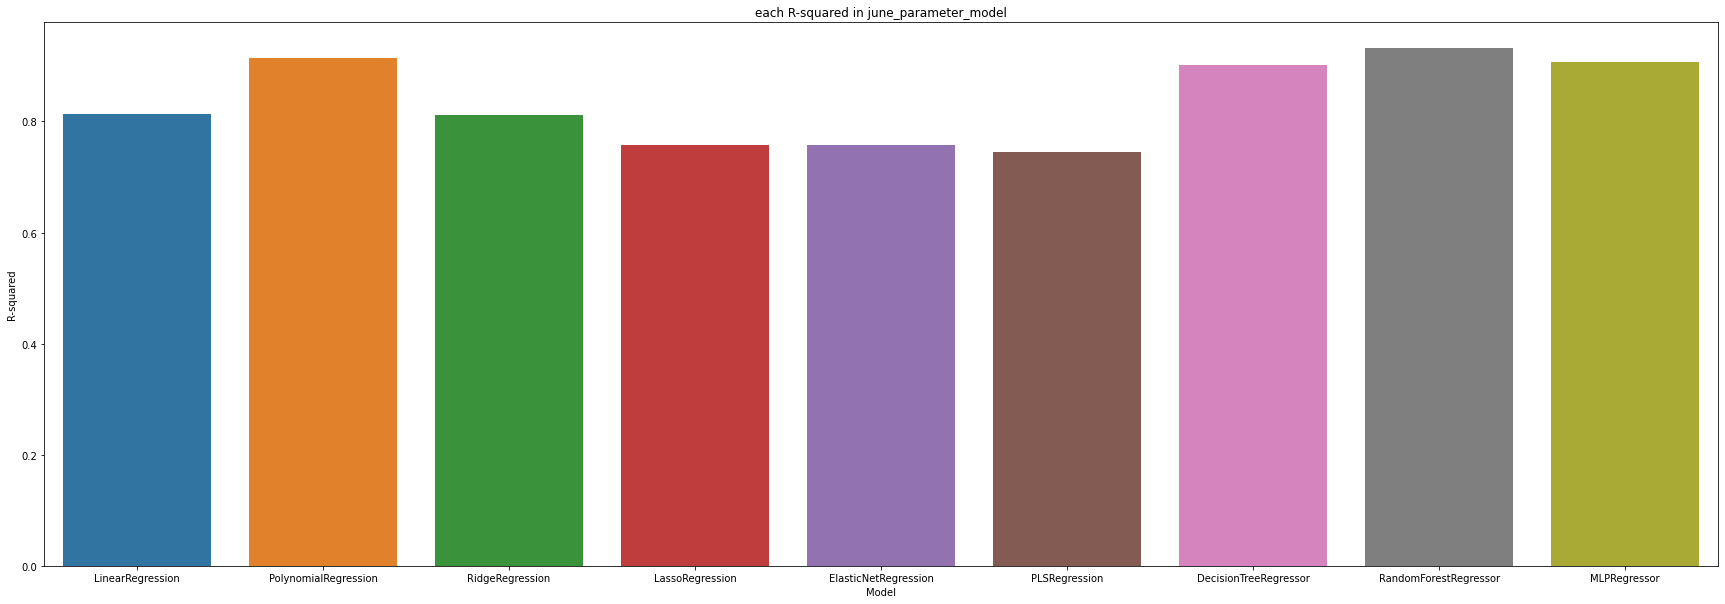

In [ ]:
plt.figure(figsize = (30,10))
plt.title('each R-squared in june_parameter_model')
sns.barplot(x="Model", y="R-squared", data=df_june_parameter)